#Exploratory Analysis -- Yelp

## I. Problem Statement & Background

Due to Yelp’s ability to reach tons of customers and attract crowds of foot traffic, restaurants are always trying to optimize their yelp ratings. However, what are the drivers behind yelp ratings? What separates a two star restaurant from a four star restaurant? Does ambiance contribute to the rating? What about distance from the geographic city center? There are a variety of features that could potentially contribute to businesses’ Yelp rating, and we want to discover what those are and to what degree they matter. At the end we will look at multiple factors and see what correlates most highly to a positive restaurant rating. 

What we do know is: Put Sources Here

## II. Sources Intend For Use

In [17]:
import json
import pandas as pd
import sys
import os
import numpy as np
%matplotlib inline

In [2]:
#Load Biz Dataset into DF
biz_data = []
biz_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
with open(biz_fn) as data_file:
    for line in data_file:
        biz_data.append(json.loads(line))
biz_df = pd.DataFrame(biz_data)

In [3]:
#Load Checkin Dataset into DF
checkin_data = []
checkin_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json'
with open(checkin_fn) as data_file:
    for line in data_file:
        checkin_data.append(json.loads(line))
checkin_df = pd.DataFrame(checkin_data)

In [4]:
#Load review dataset into df
review_data = []
review_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'
with open(review_fn) as data_file:
    for line in data_file:
        review_data.append(json.loads(line))
review_df = pd.DataFrame(review_data)

In [5]:
#Load tip dataset into df
tip_data = []
tip_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_tip.json'
with open(tip_fn) as data_file:
    for line in data_file:
        tip_data.append(json.loads(line))
tip_df = pd.DataFrame(tip_data)

In [6]:
#Load user dataset into df
user_data = []
user_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json'
with open(user_fn) as data_file:
    for line in data_file:
        user_data.append(json.loads(line))
user_df = pd.DataFrame(user_data)

In [8]:
#Perform Review stats
all_review_data_df = review_df.merge(biz_df,on='business_id')



##Review Summary Stats

So we are interested in the summary stats of yelp reviews. To start let us first get an idea of what the distribution of reviews looks like.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x395dc2850>]], dtype=object)

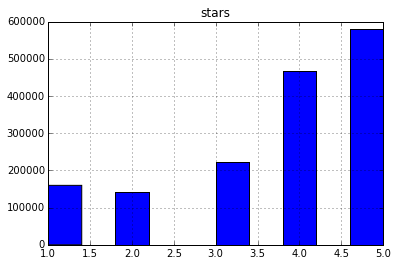

In [18]:
review_df.hist(column='stars')

So this distribution shows that amongst people who actually write reviews there is a pretty heavy skew towards 4-5 star ratings which is pretty intersting. Now let us see if this corresponds to the rating distribution of restaurants.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x394898310>]], dtype=object)

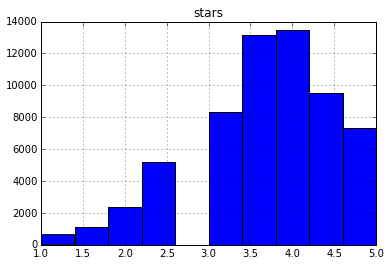

In [20]:
biz_df.hist(column='stars')

So this is a much nicer distribution. This distribution is skewed to the right which seems to give some evidence that people tend to give nicer reviews. 

However, let us first get some summary stats of this biz distribution and of the review distribution.

In [21]:
biz_df['stars'].describe()

count    61184.000000
mean         3.673305
std          0.891207
min          1.000000
25%          3.000000
50%          3.500000
75%          4.500000
max          5.000000
Name: stars, dtype: float64

In [22]:
review_df['stars'].describe()

count    1569264.000000
mean           3.742656
std            1.311468
min            1.000000
25%            3.000000
50%            4.000000
75%            5.000000
max            5.000000
Name: stars, dtype: float64

So looking at the summary stats, it is pretty clear that these are decent distributions where more of the mass is clustered around the mean for the average biz stars versus individual reviews. Now Let us break this down by category which will be pretty useful.

In [30]:
elements = set()
for element_list in biz_df['categories']:
    elements = elements.union(set(element_list))
    
category_dist = {key:[] for key in elements}
for i in range(len(biz_df)):
    row = biz_df.ix[i]
    star = row['stars']
    cats = row['categories']
    for cat in cats:
        category_dist[cat].append(star)

{u'Accessories': [4.0,
  4.0,
  3.0,
  3.0,
  4.0,
  3.0,
  3.5,
  3.5,
  4.0,
  4.5,
  4.5,
  3.0,
  3.0,
  3.0,
  4.5,
  4.5,
  2.5,
  3.5,
  3.0,
  2.0,
  2.5,
  2.5,
  4.0,
  3.5,
  2.0,
  3.0,
  3.5,
  3.5,
  3.0,
  2.5,
  3.5,
  3.0,
  4.5,
  4.0,
  3.0,
  4.5,
  3.0,
  2.5,
  4.0,
  2.5,
  4.0,
  3.5,
  3.5,
  4.0,
  3.0,
  4.0,
  3.0,
  3.5,
  2.5,
  2.5,
  4.0,
  4.0,
  4.5,
  3.0,
  4.0,
  4.0,
  4.0,
  4.5,
  4.5,
  3.5,
  4.0,
  2.5,
  4.0,
  4.0,
  3.0,
  5.0,
  4.5,
  4.5,
  4.0,
  4.5,
  4.0,
  1.5,
  2.5,
  4.5,
  3.5,
  4.0,
  4.5,
  3.5,
  3.5,
  2.5,
  3.5,
  4.0,
  3.5,
  3.5,
  4.0,
  5.0,
  5.0,
  4.0,
  5.0,
  5.0,
  3.5,
  4.5,
  3.0,
  3.5,
  2.5,
  3.5,
  3.5,
  4.0,
  2.5,
  3.5,
  4.0,
  4.0,
  3.0,
  4.5,
  4.5,
  4.5,
  4.0,
  4.5,
  5.0,
  4.5,
  4.5,
  4.5,
  4.0,
  3.5,
  4.5,
  2.5,
  4.5,
  4.5,
  4.5,
  4.5,
  3.0,
  3.0,
  4.0,
  2.5,
  3.5,
  4.5,
  3.5,
  2.0,
  3.0,
  3.5,
  4.5,
  4.5,
  4.5,
  5.0,
  4.5,
  3.5,
  3.5,
  4.0,
  4.5,
  3.0,
  3.

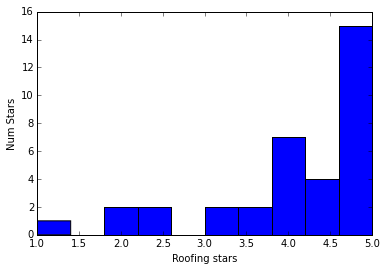

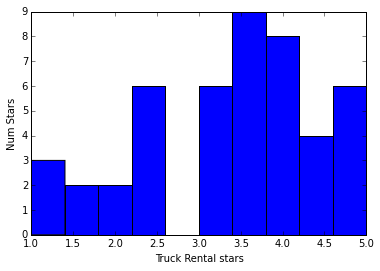

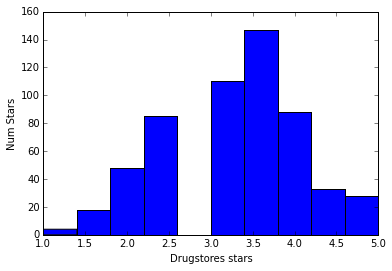

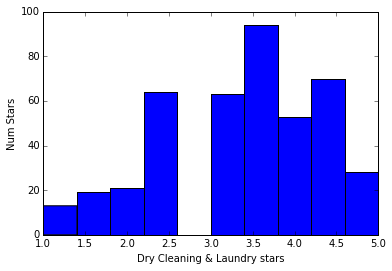

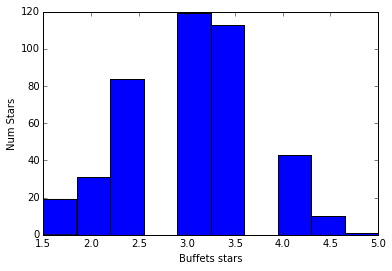

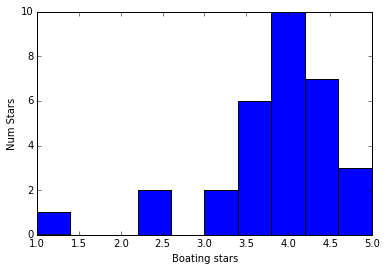

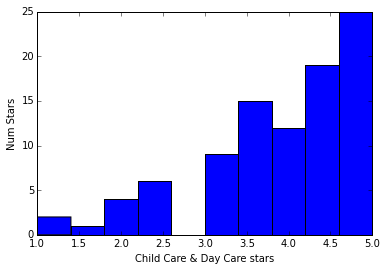

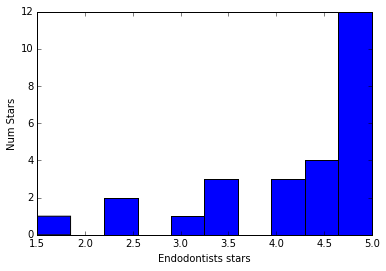

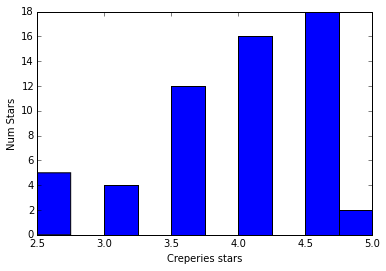

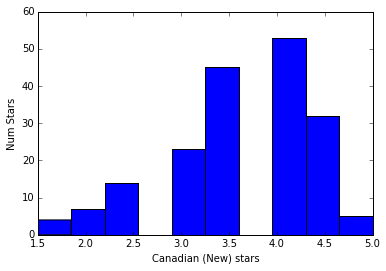

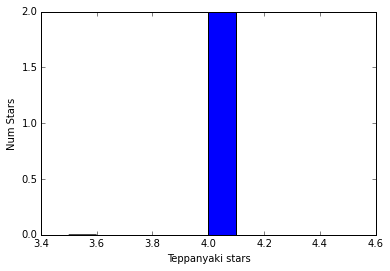

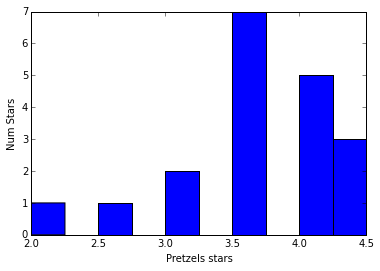

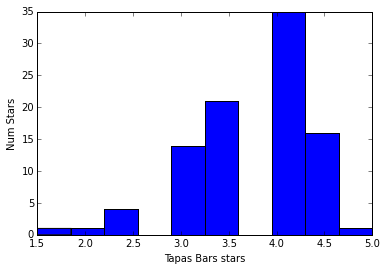

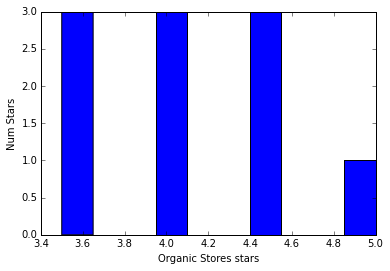

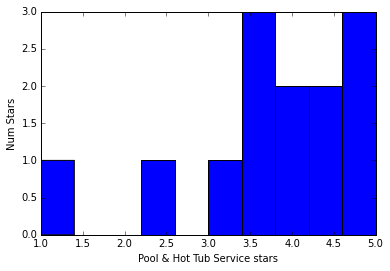

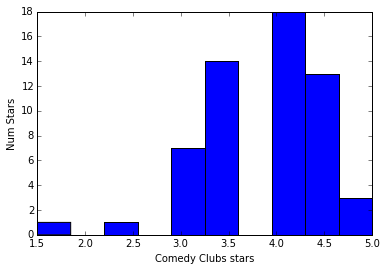

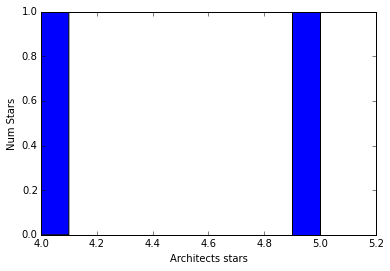

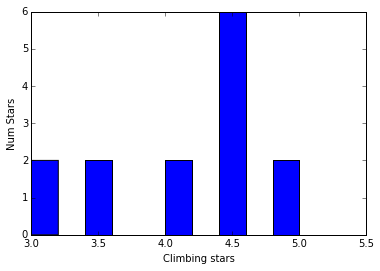

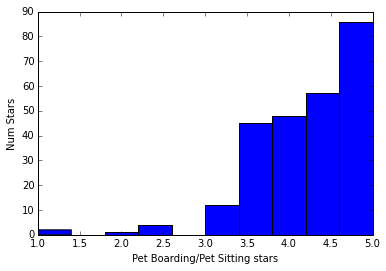

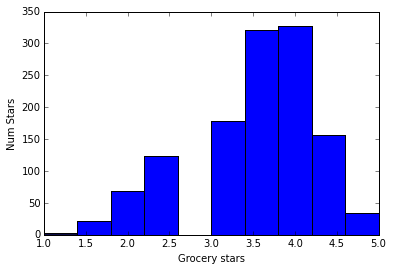

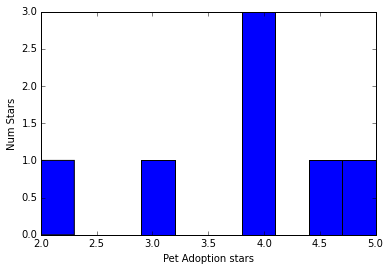

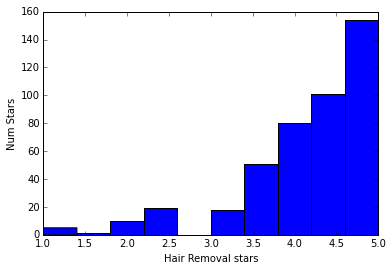

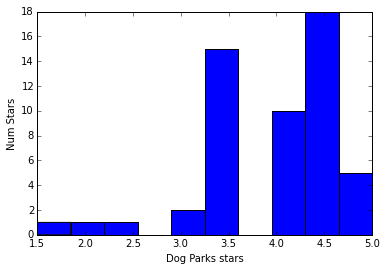

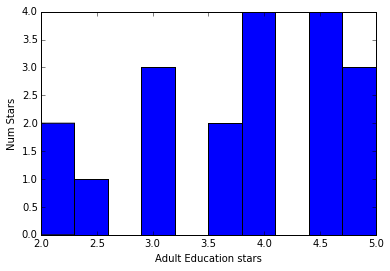

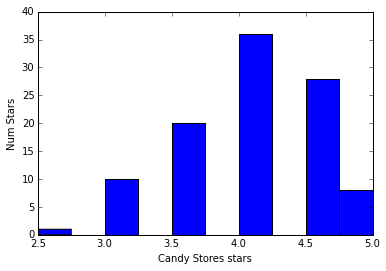

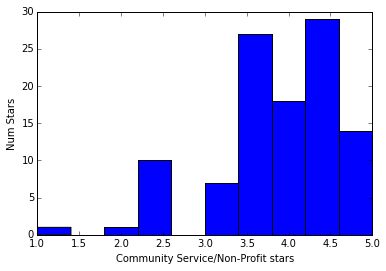

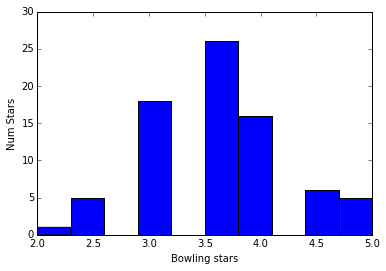

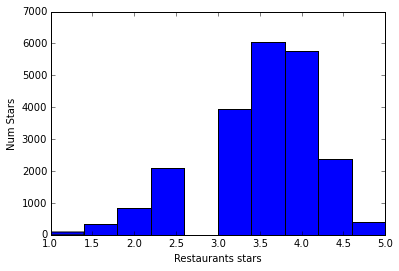

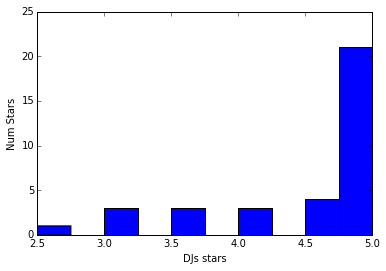

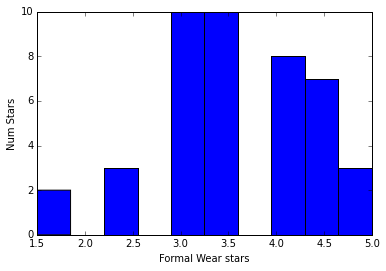

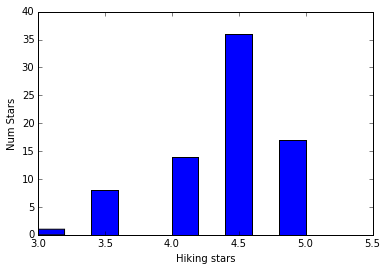

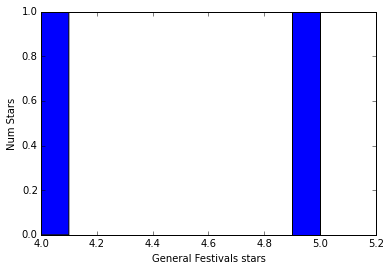

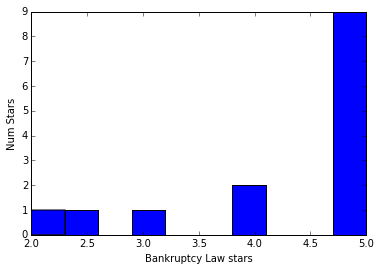

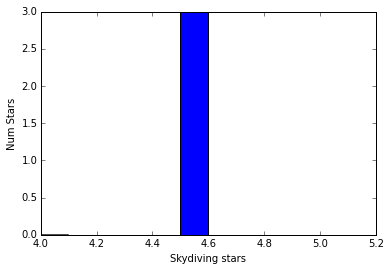

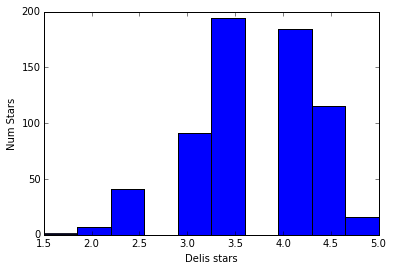

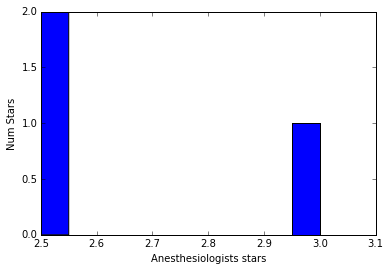

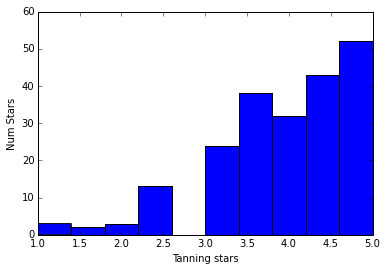

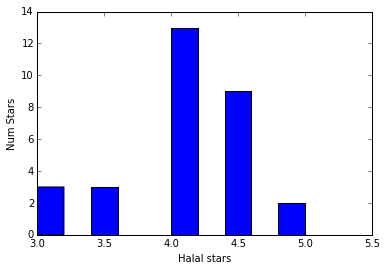

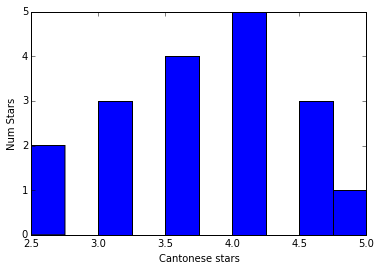

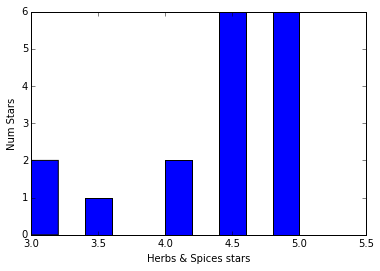

Category Customized Merchandise only has 1 data point. That point is: 5.0


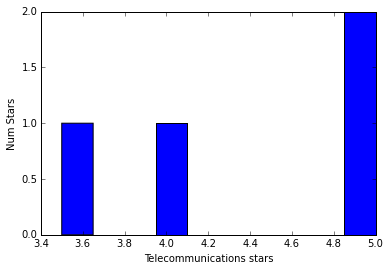

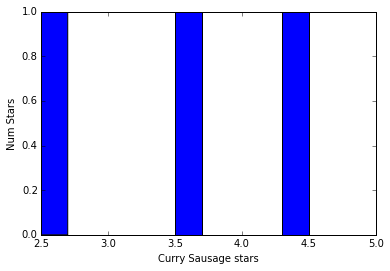

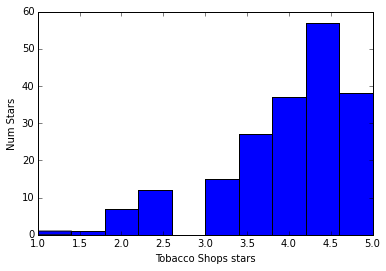

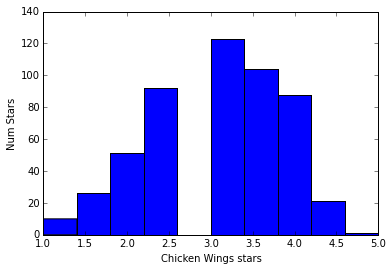

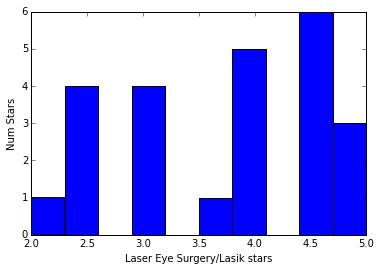

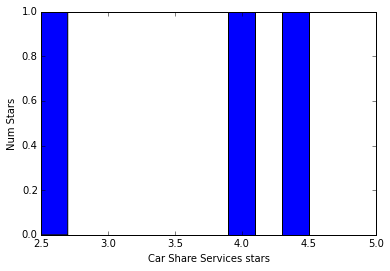

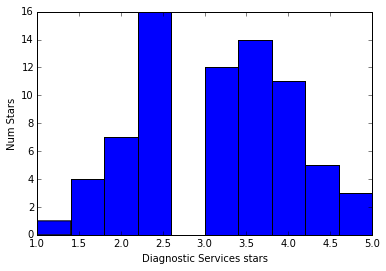

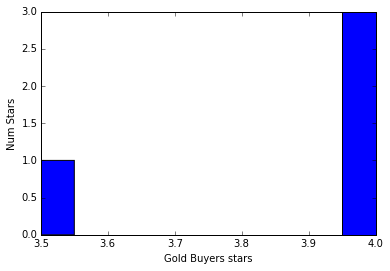

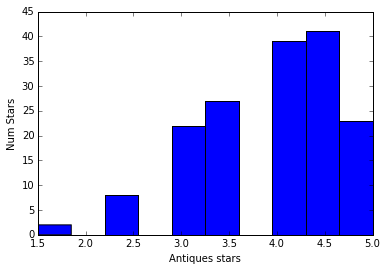

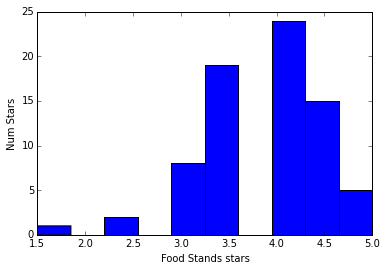

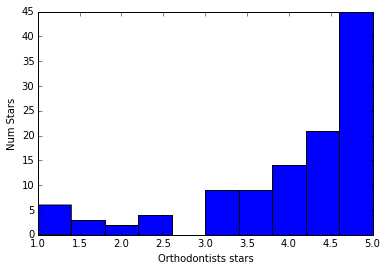

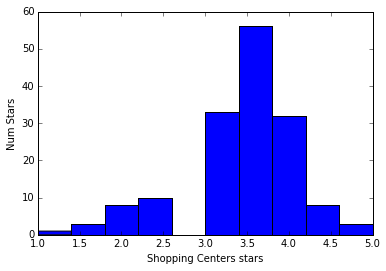

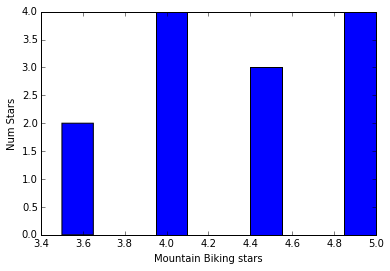

Category Firearm Training only has 1 data point. That point is: 5.0


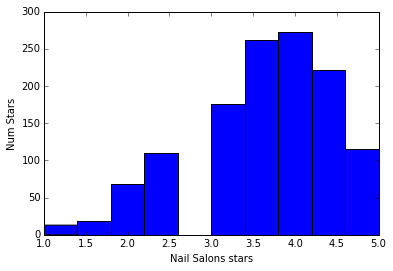

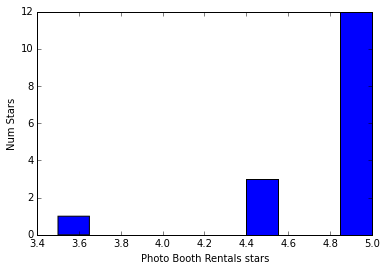

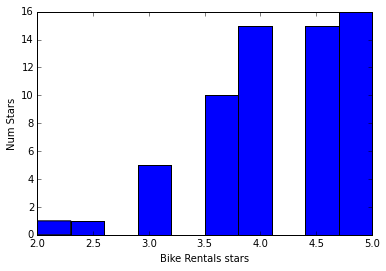

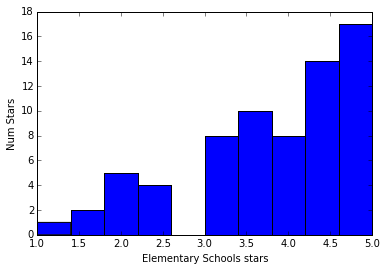

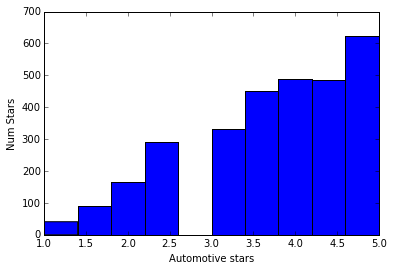

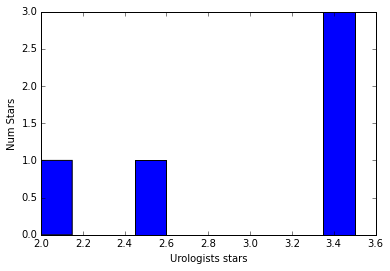

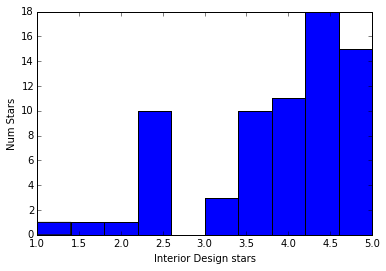

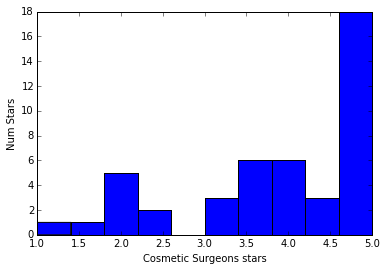

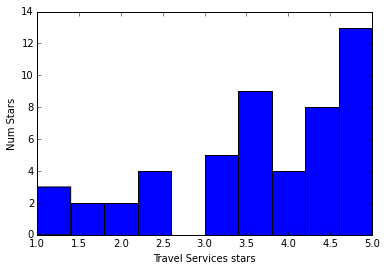

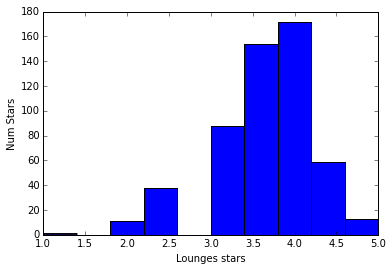

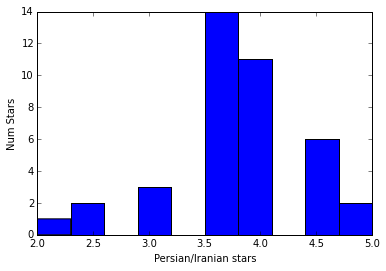

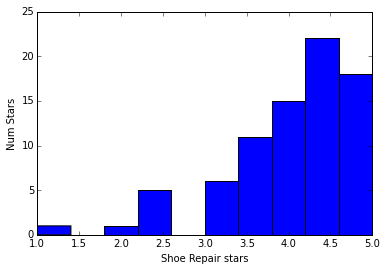

Category Walking Tours only has 1 data point. That point is: 4.5


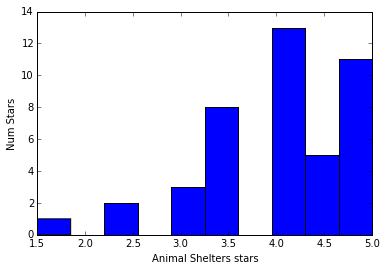

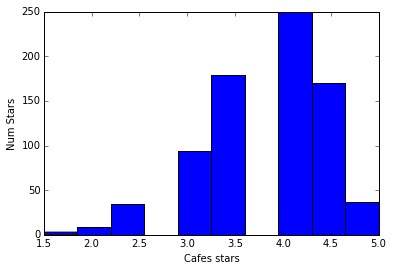

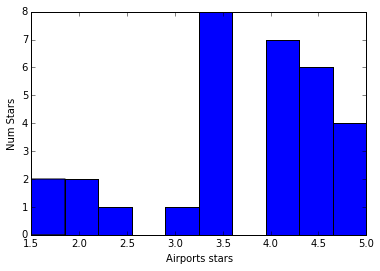

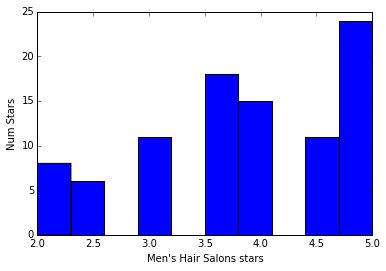

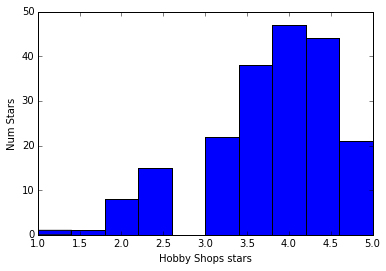

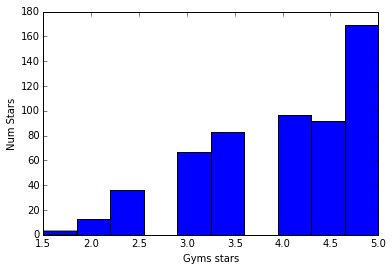

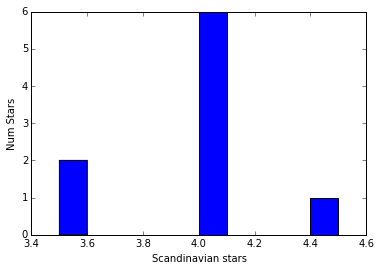

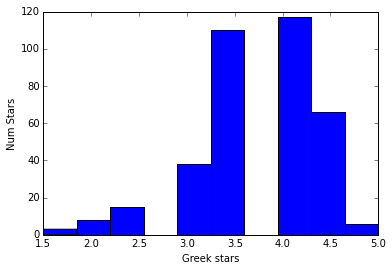

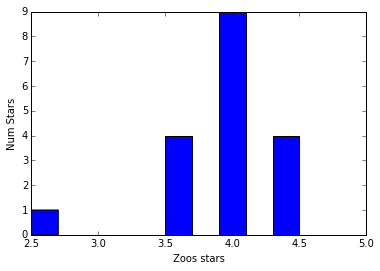

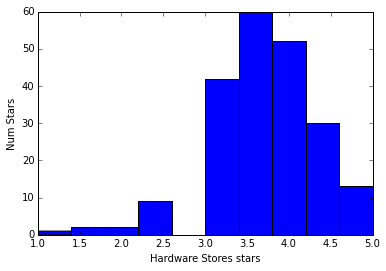

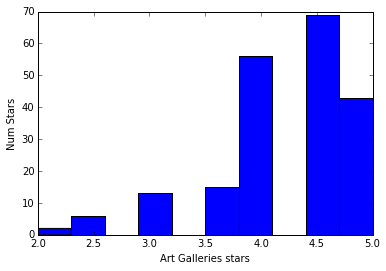

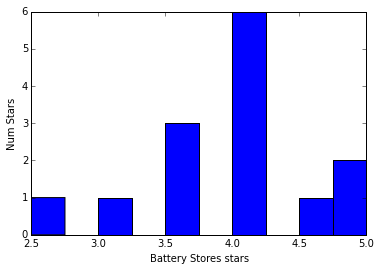

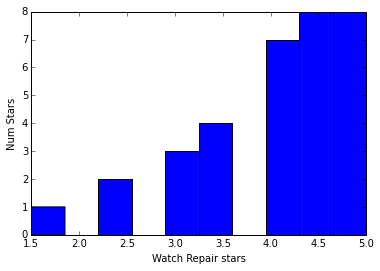

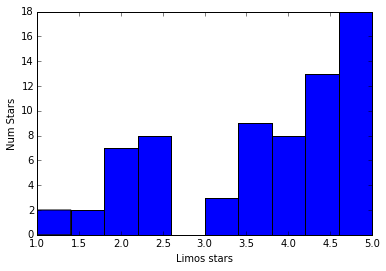

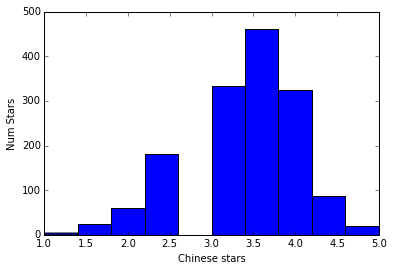

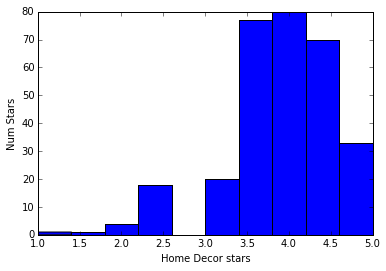

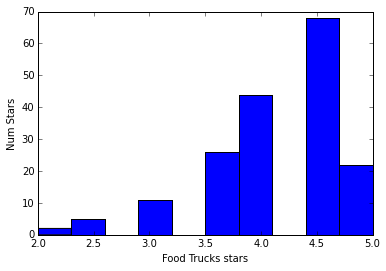

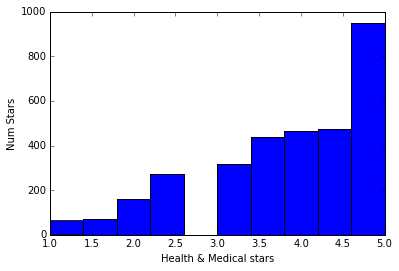

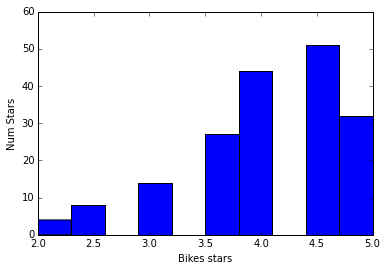

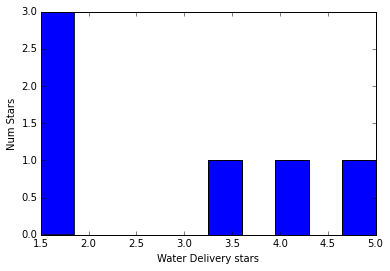

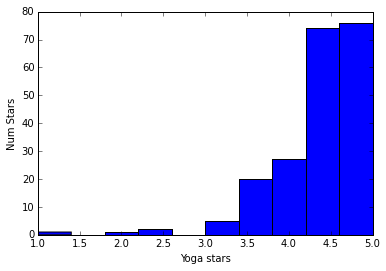

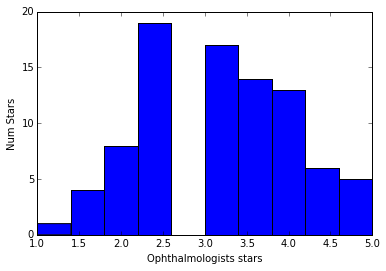

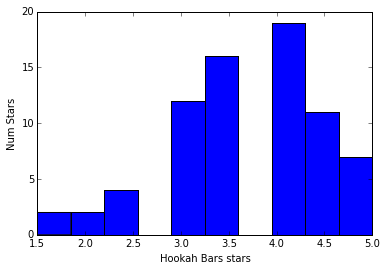

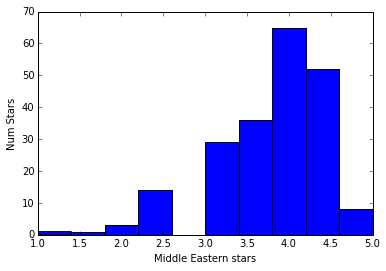

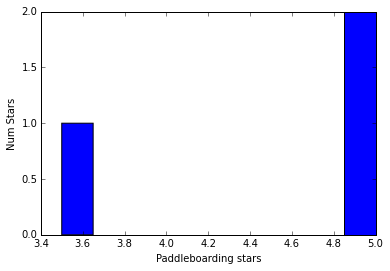

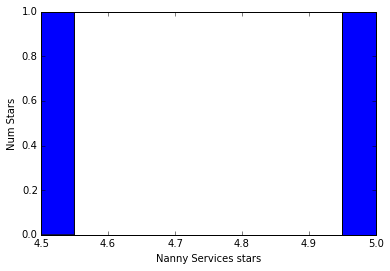

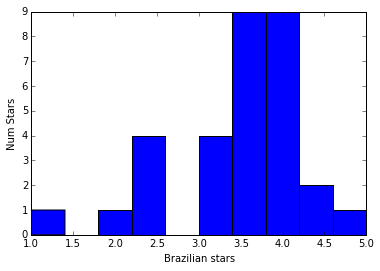

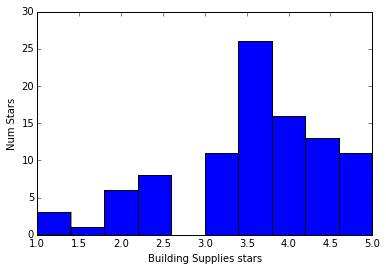

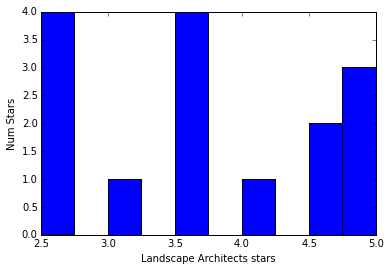

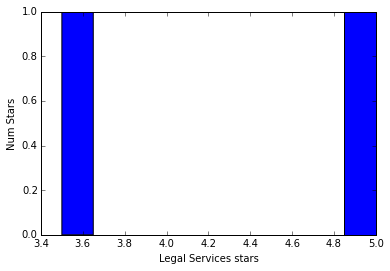

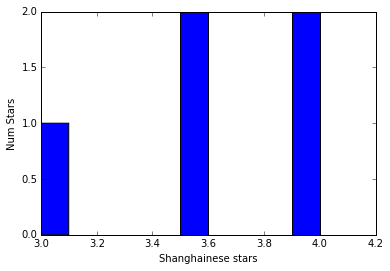

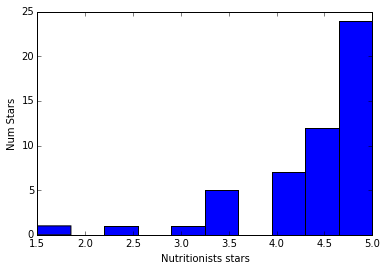

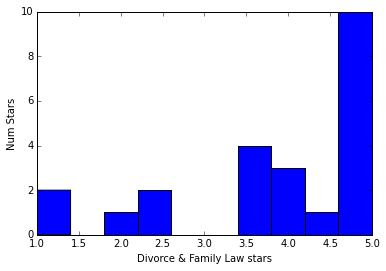

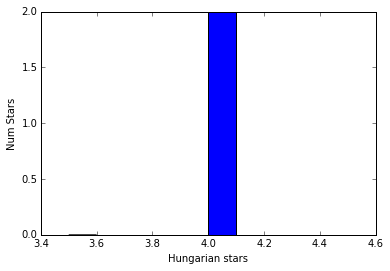

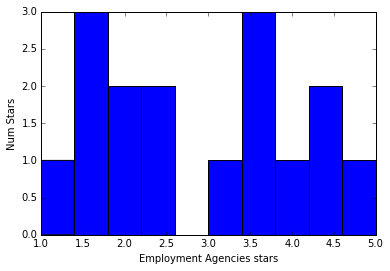

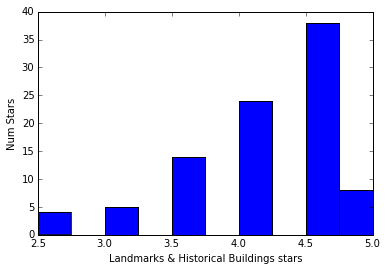

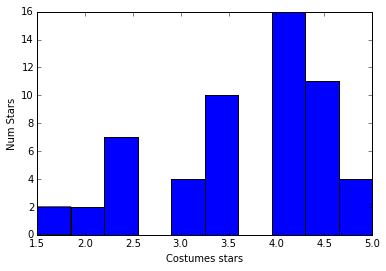

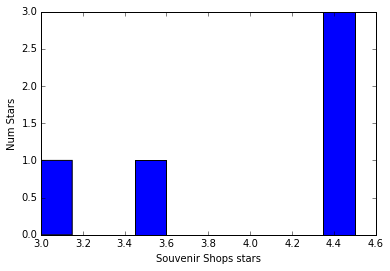

Category Donairs only has 1 data point. That point is: 4.5


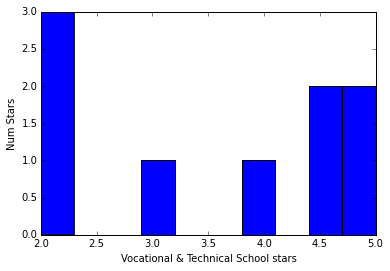

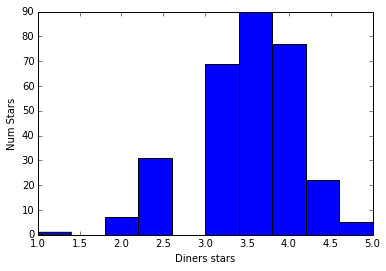

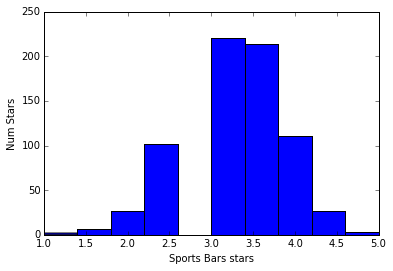

Category Used Bookstore only has 1 data point. That point is: 4.5


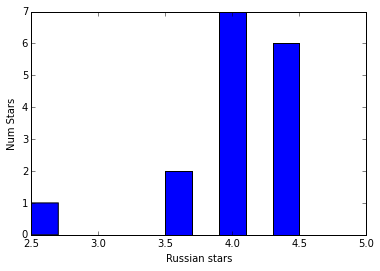

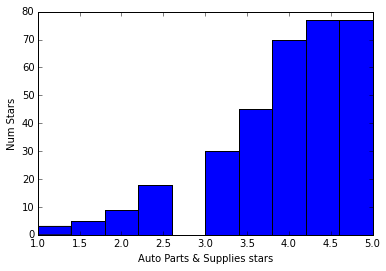

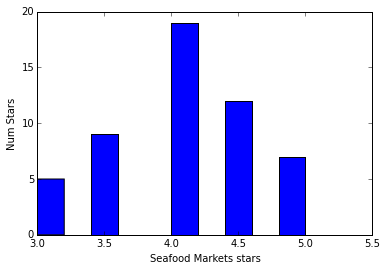

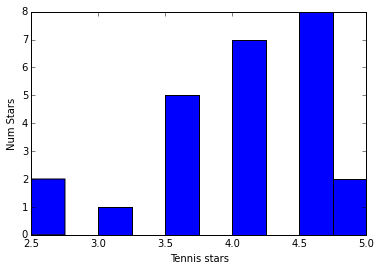

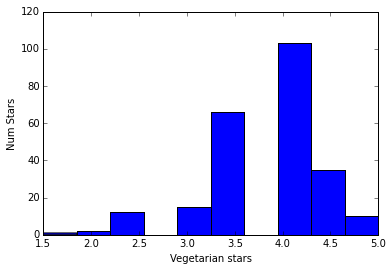

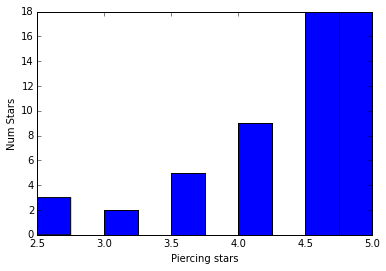

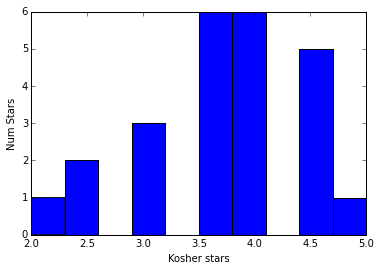

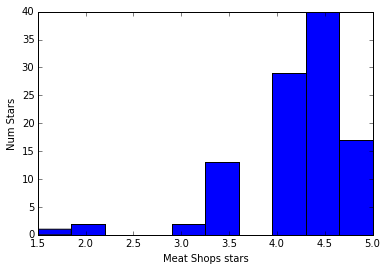

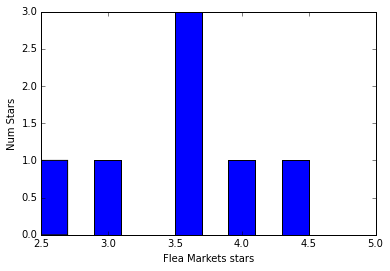

Category Pole Dancing Classes only has 1 data point. That point is: 4.5


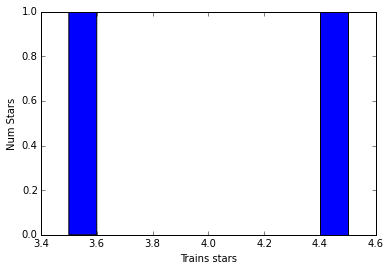

Category Pita only has 1 data point. That point is: 2.5


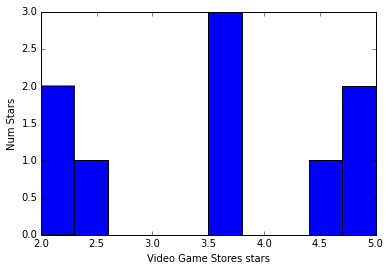

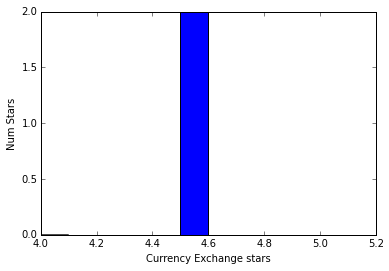

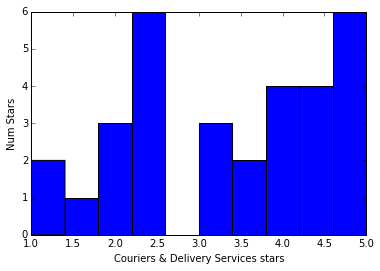

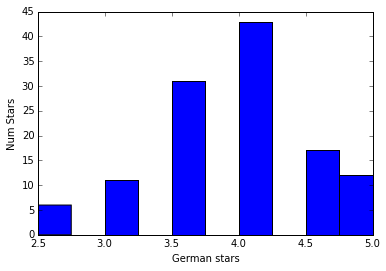

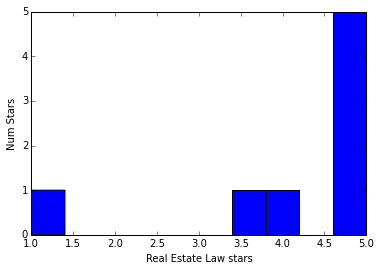

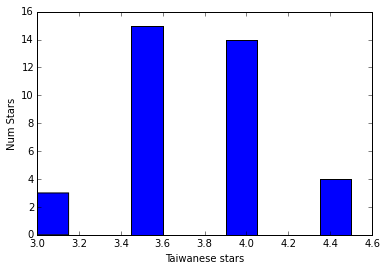

Category Bus Tours only has 1 data point. That point is: 2.5


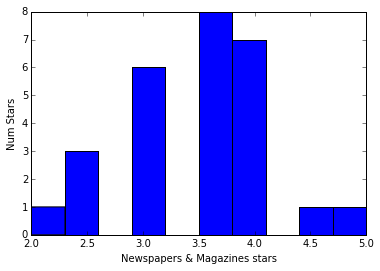

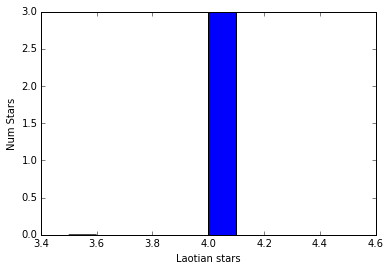

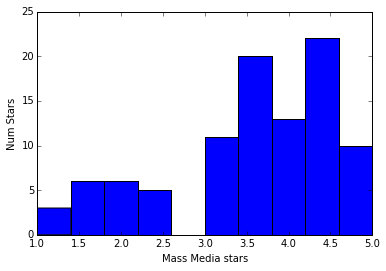

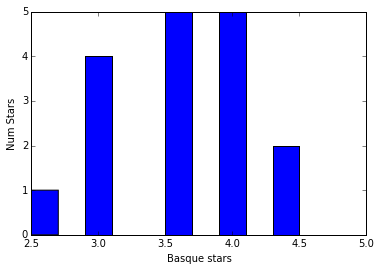

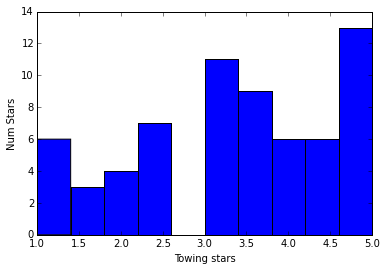

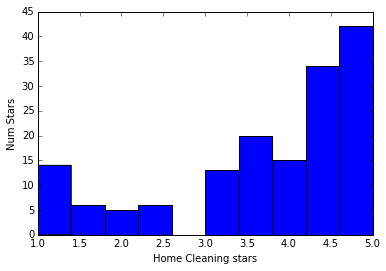

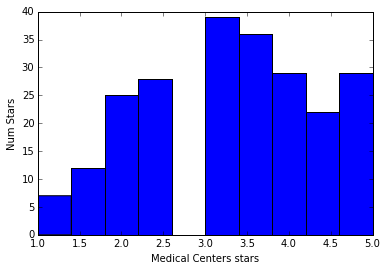

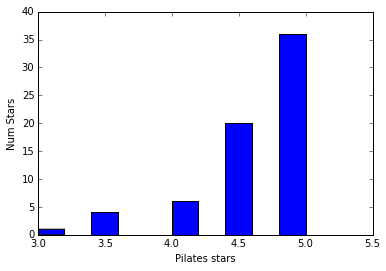

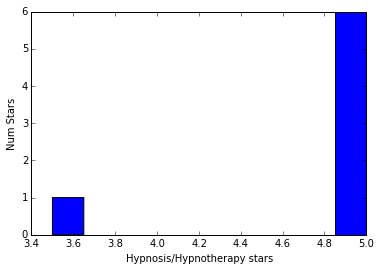

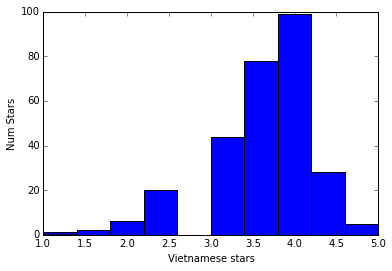

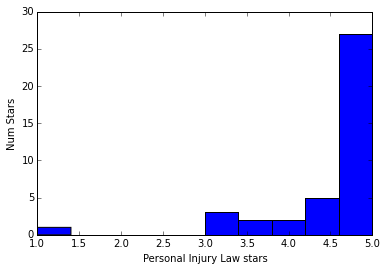

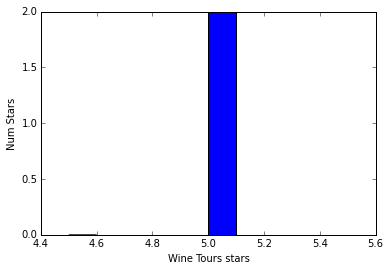

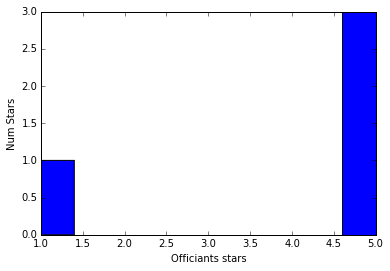

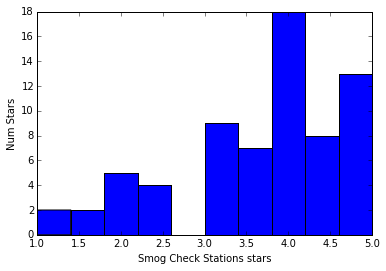

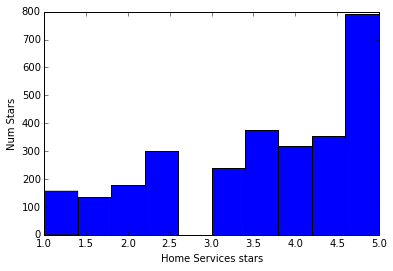

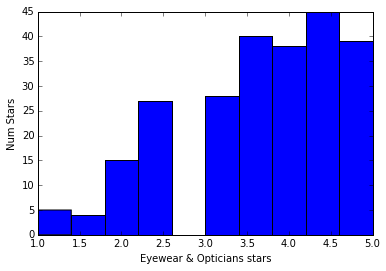

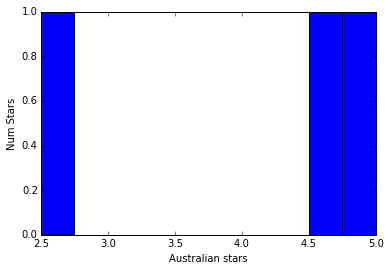

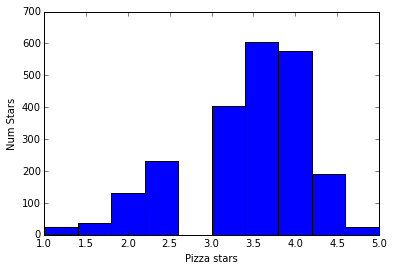

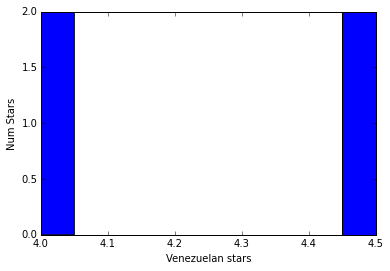

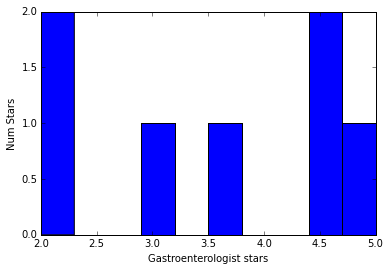

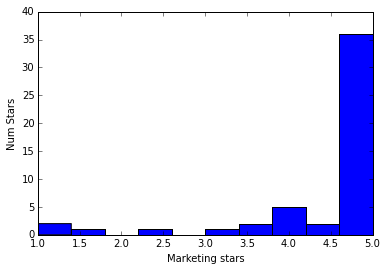

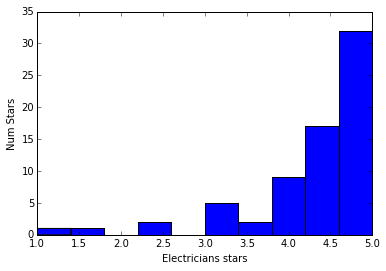

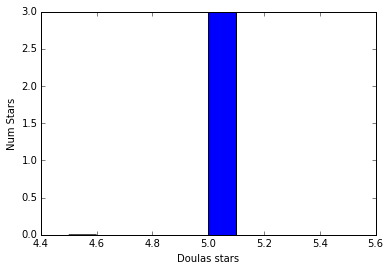

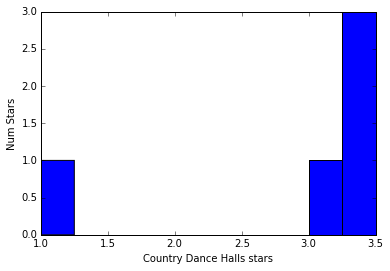

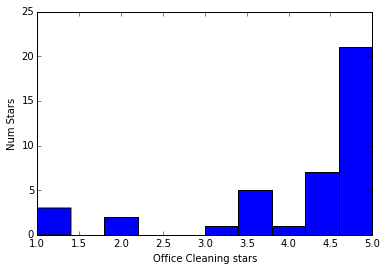

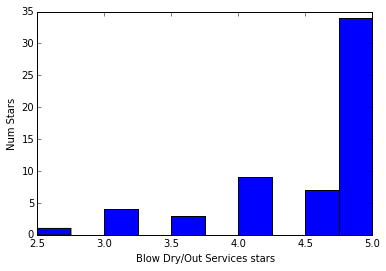

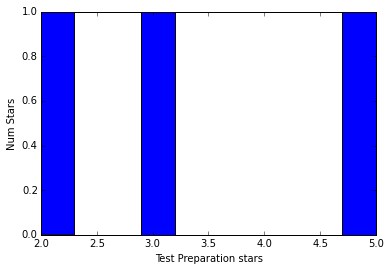

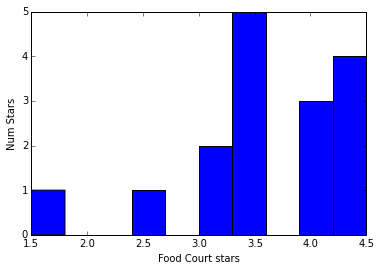

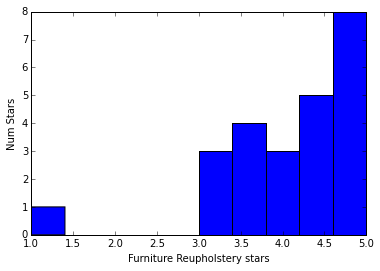

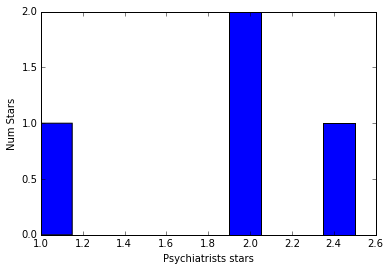

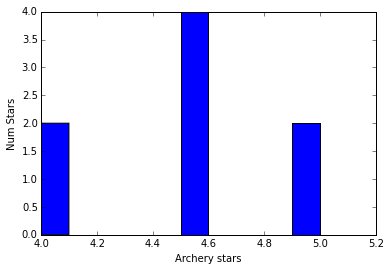

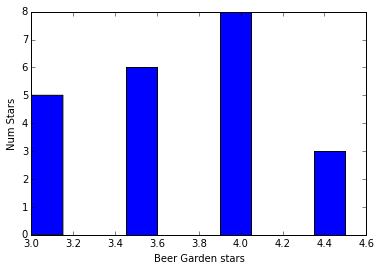

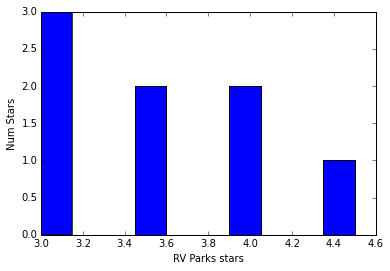

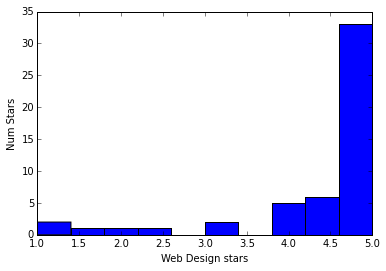

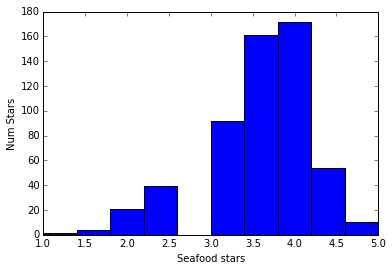

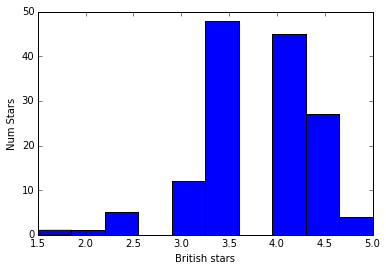

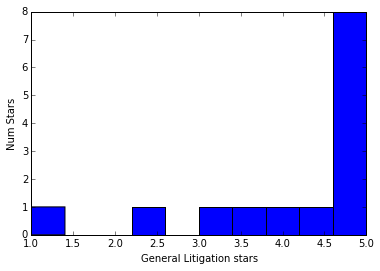

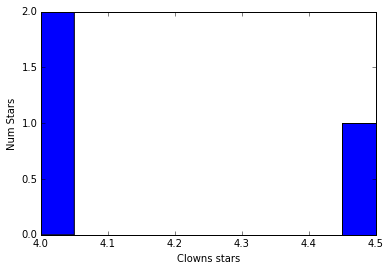

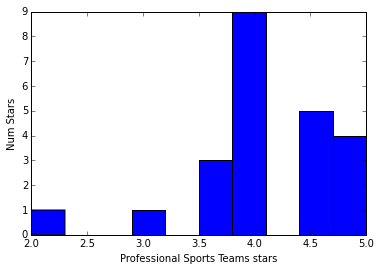

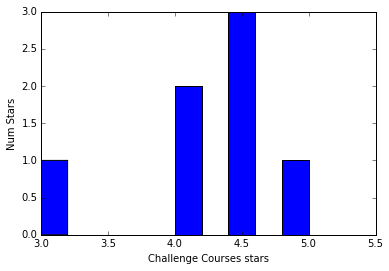

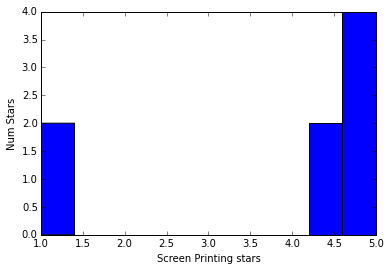

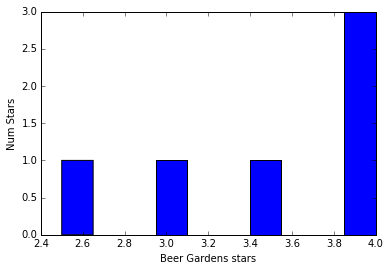

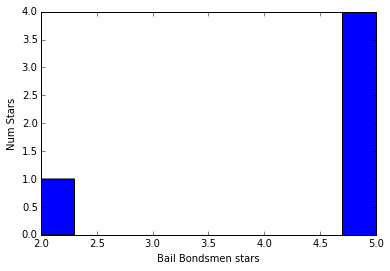

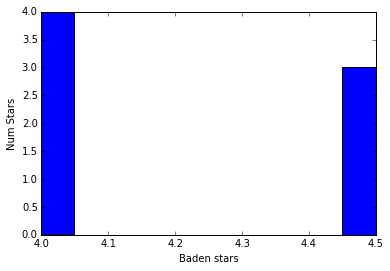

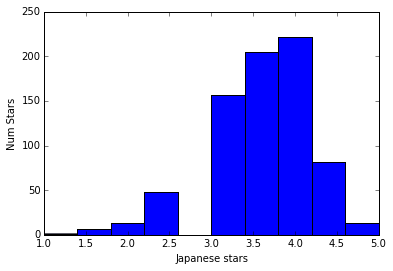

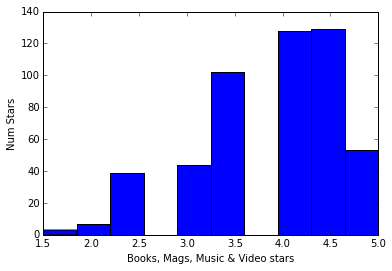

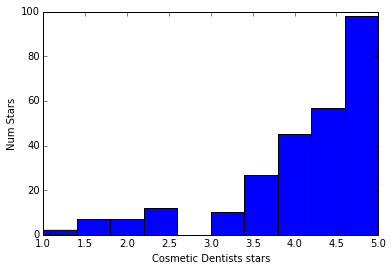

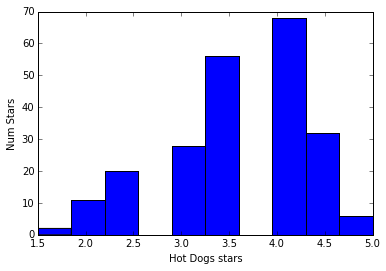

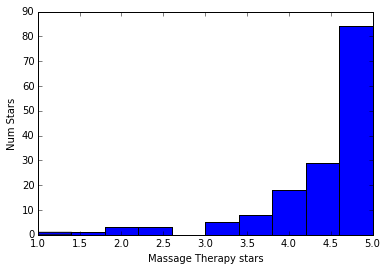

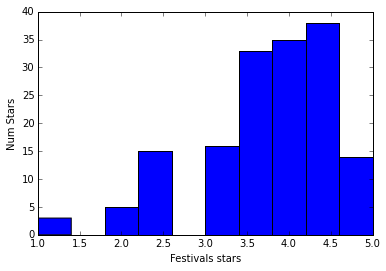

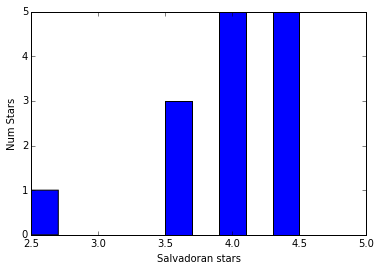

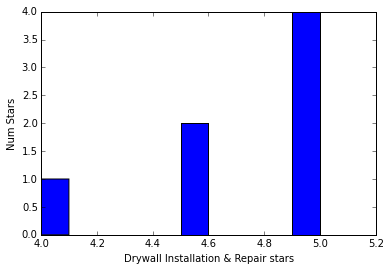

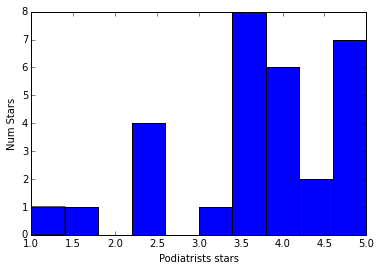

Category Oriental only has 1 data point. That point is: 3.0


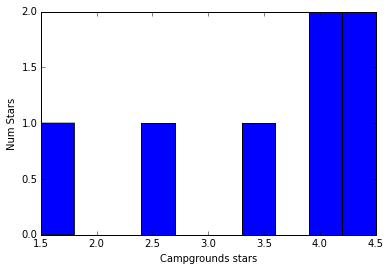

Category Swiss Food only has 1 data point. That point is: 4.5


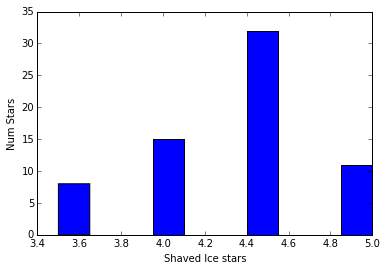

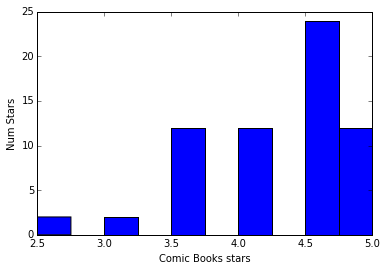

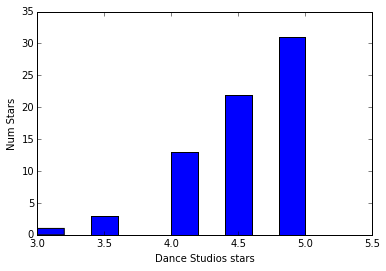

Category Eastern German only has 1 data point. That point is: 4.5


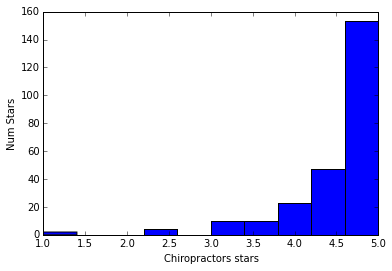

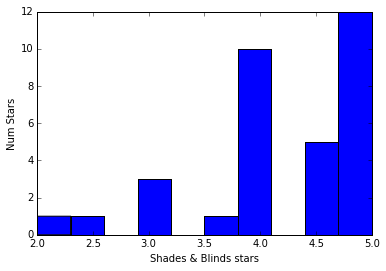

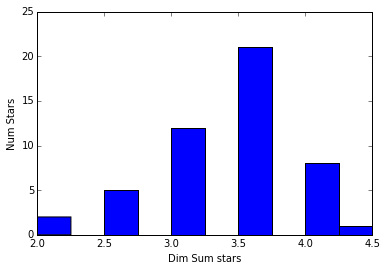

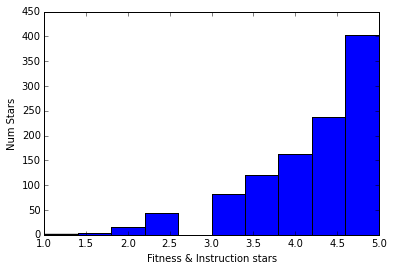

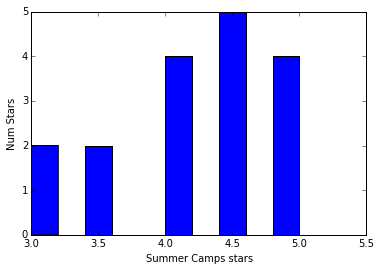

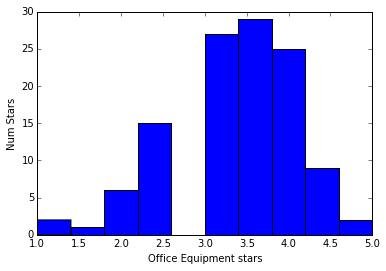

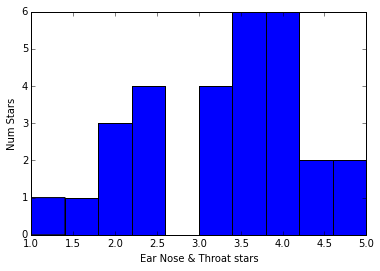

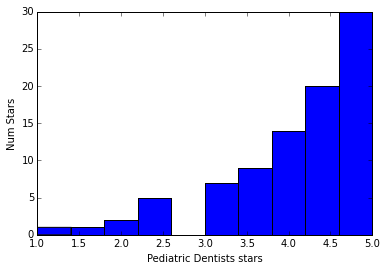

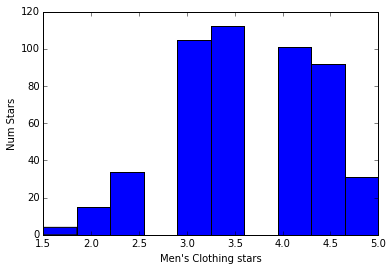

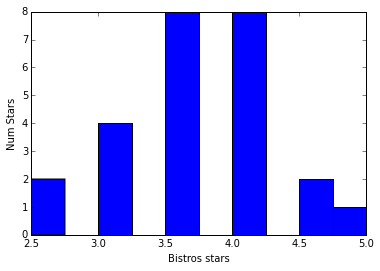

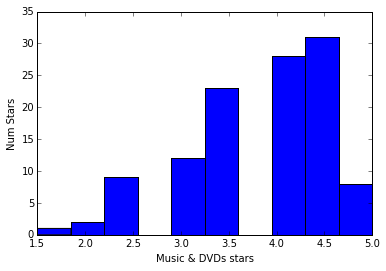

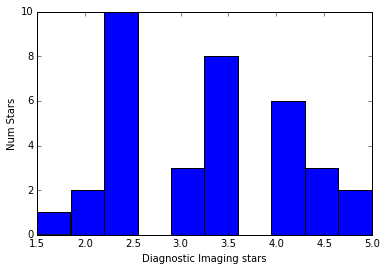

Category Basketball Courts only has 1 data point. That point is: 5.0
Category Bike Sharing only has 1 data point. That point is: 2.5


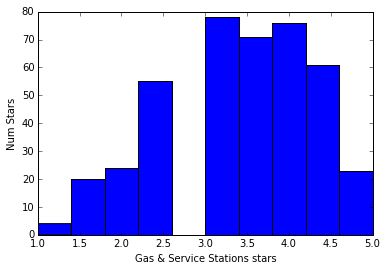

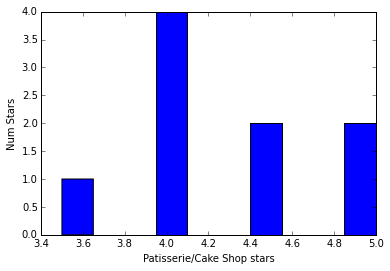

Category Bartending Schools only has 1 data point. That point is: 4.5


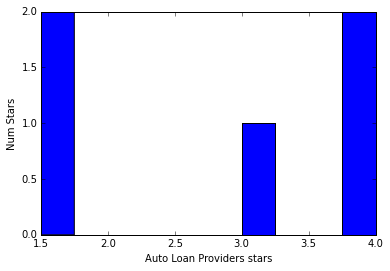

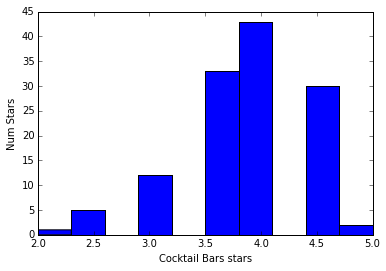

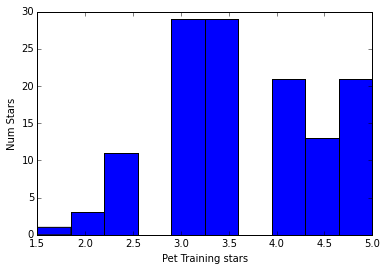

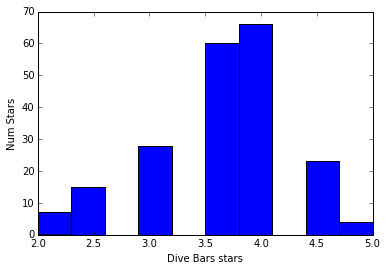

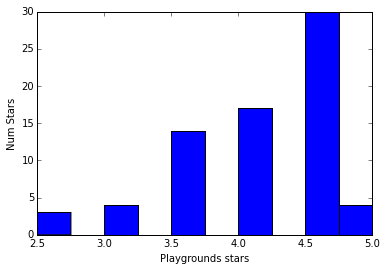

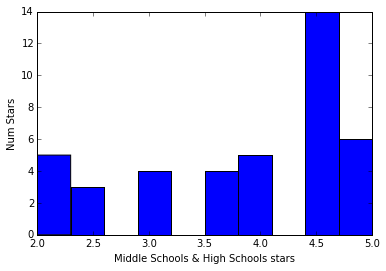

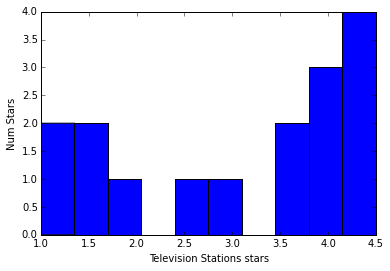

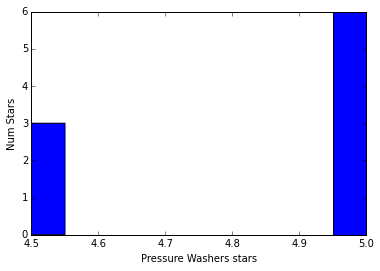

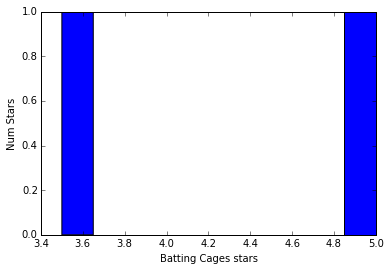

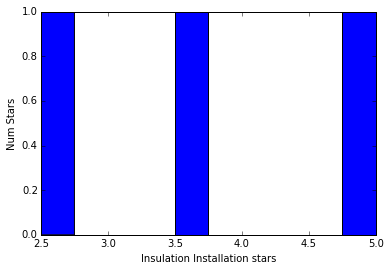

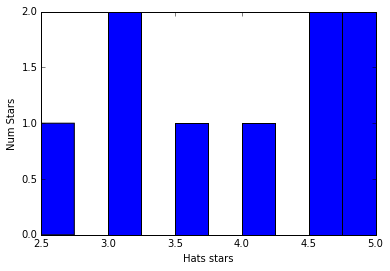

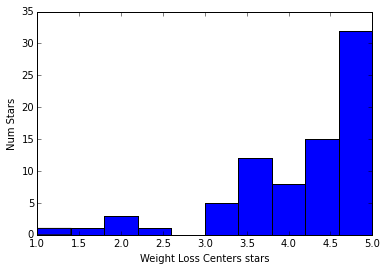

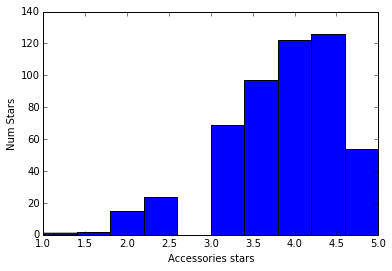

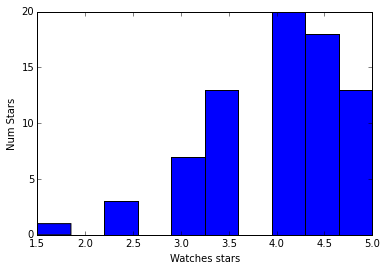

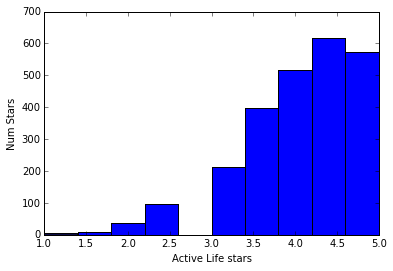

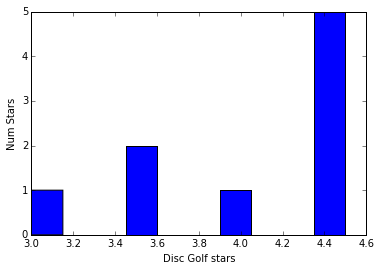

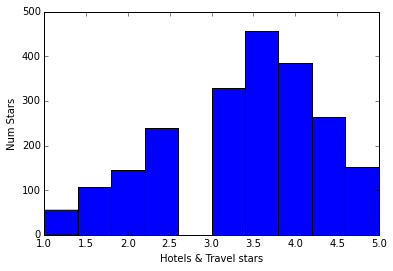

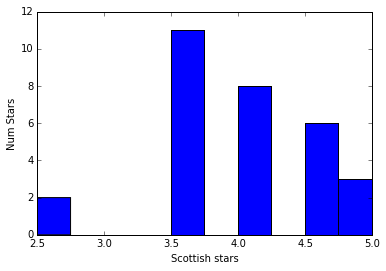

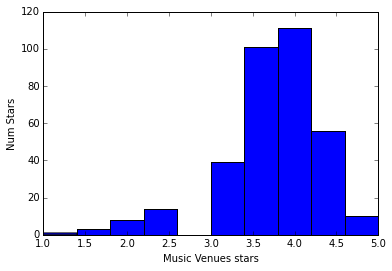

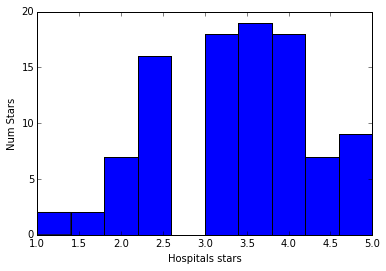

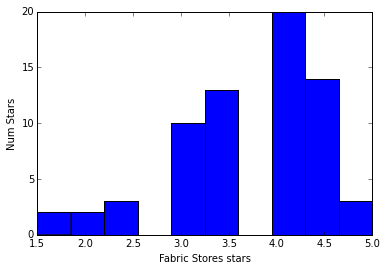

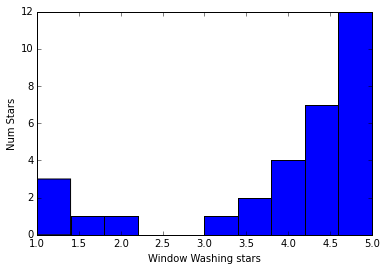

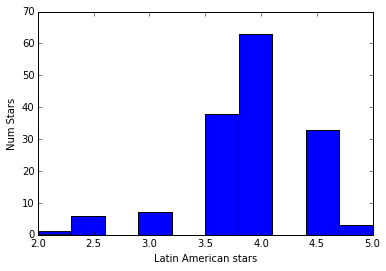

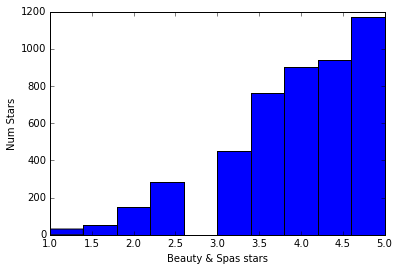

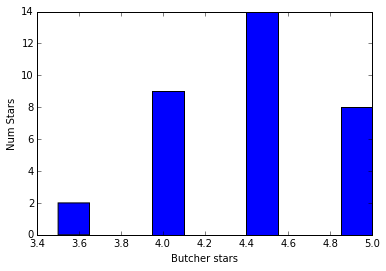

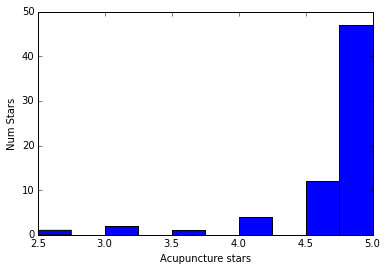

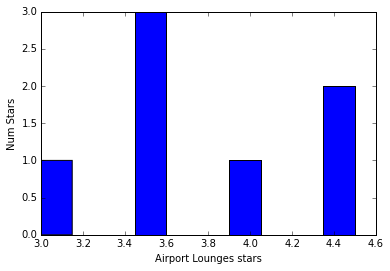

Category Wok only has 1 data point. That point is: 4.5


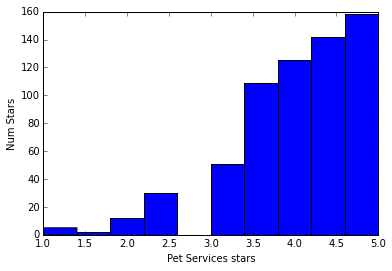

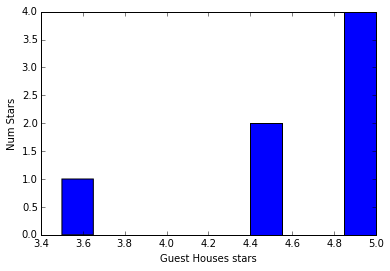

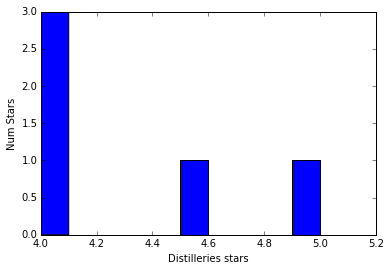

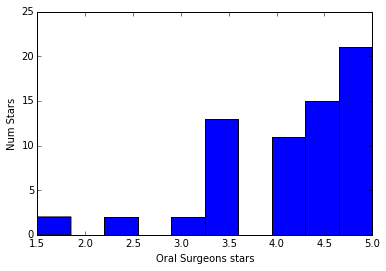

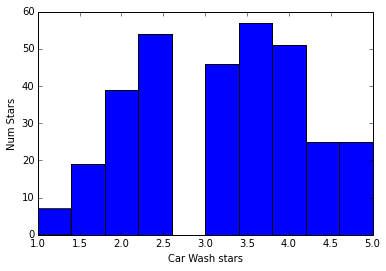

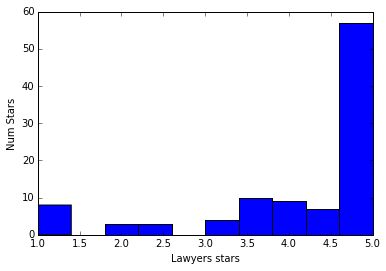

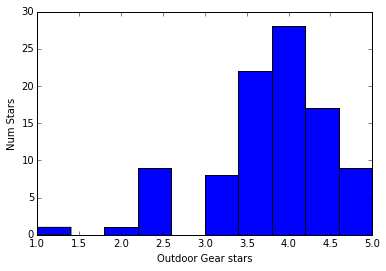

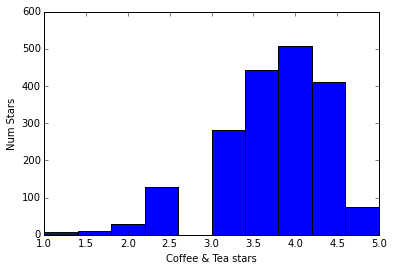

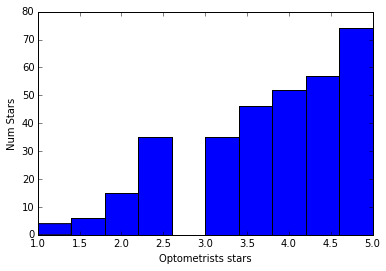

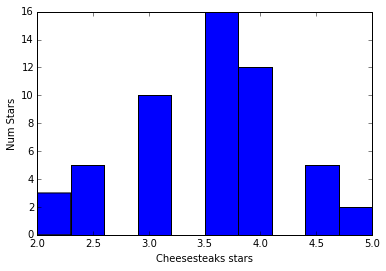

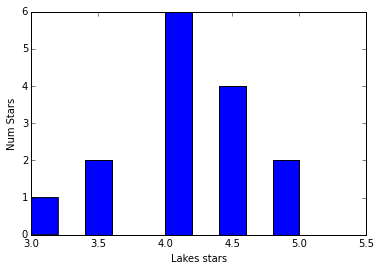

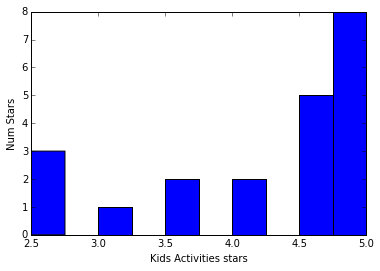

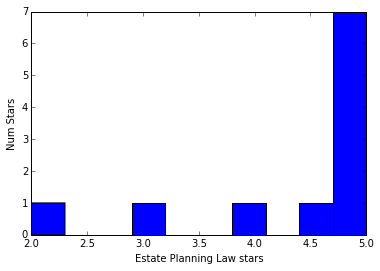

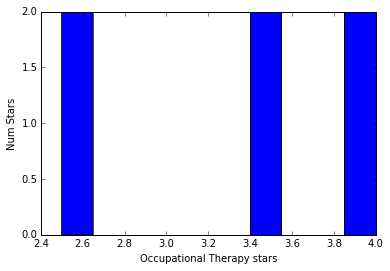

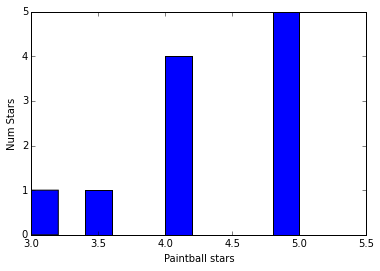

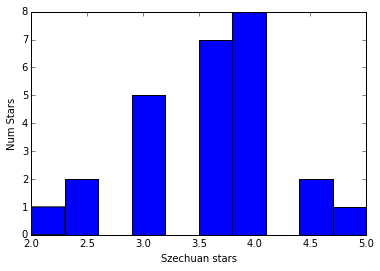

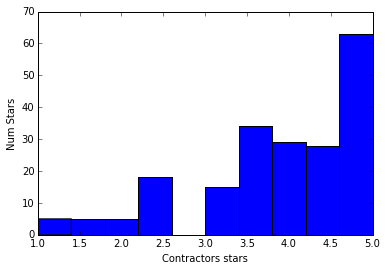

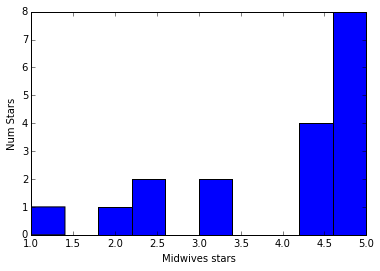

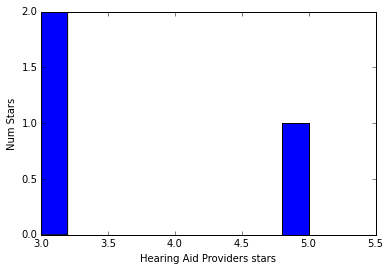

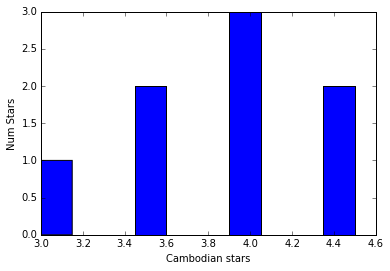

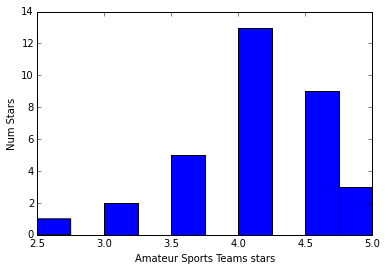

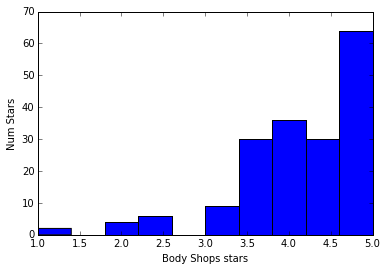

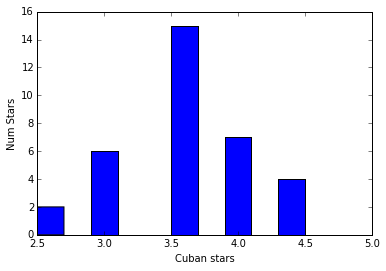

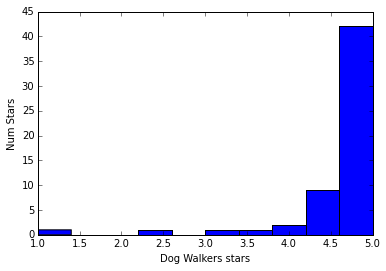

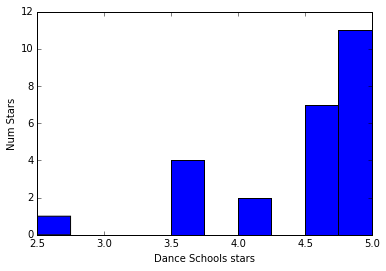

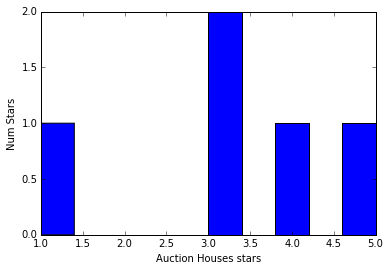

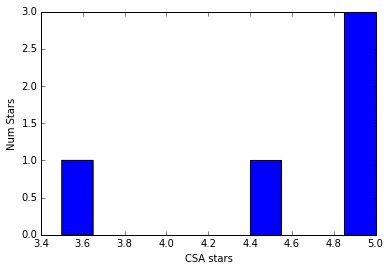

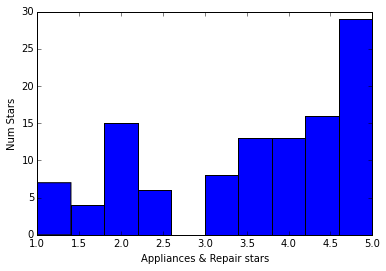

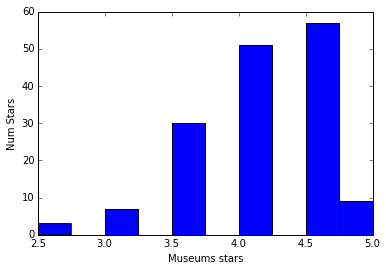

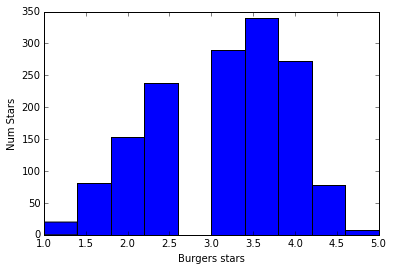

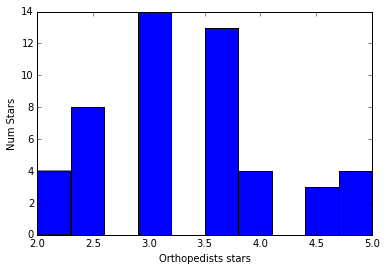

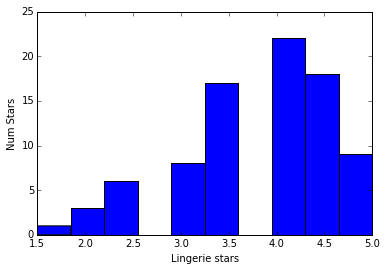

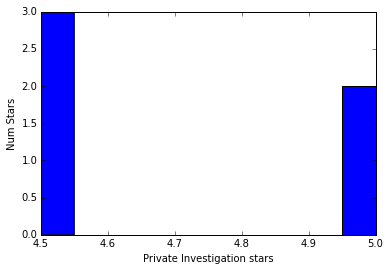

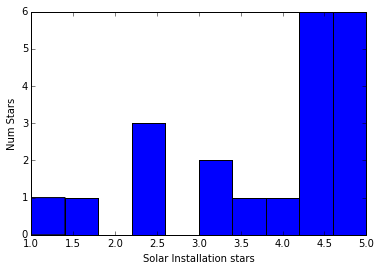

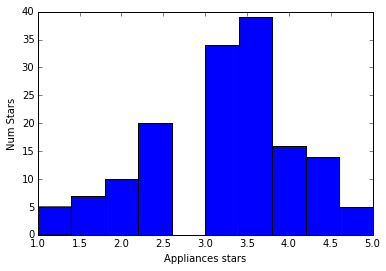

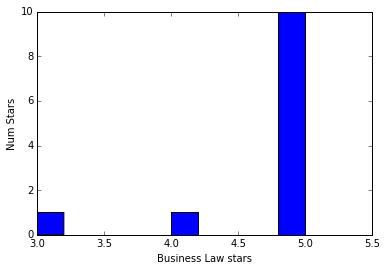

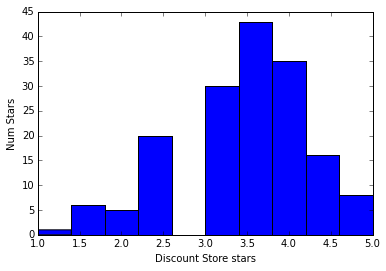

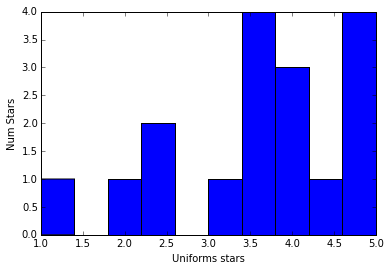

Category Furniture Repair only has 1 data point. That point is: 3.5
Category Bavarian only has 1 data point. That point is: 3.5


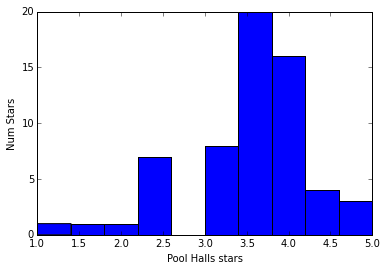

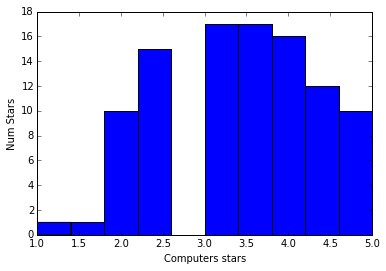

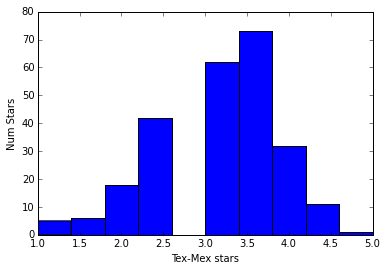

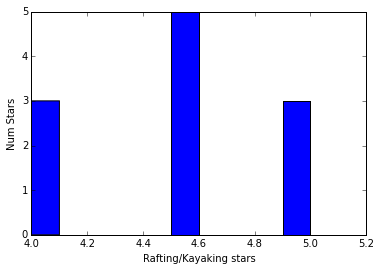

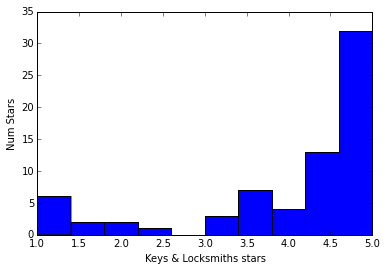

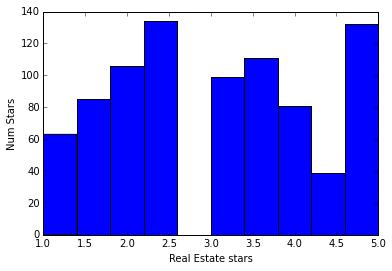

Category Hospice only has 1 data point. That point is: 4.0


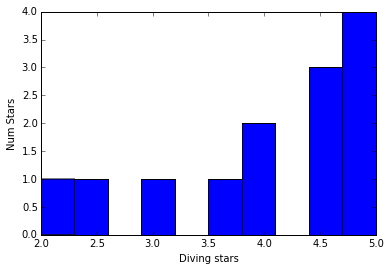

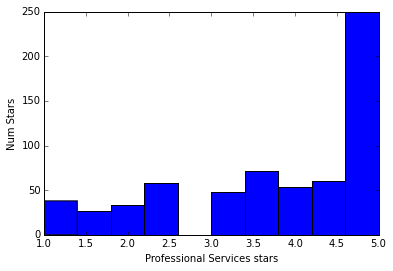

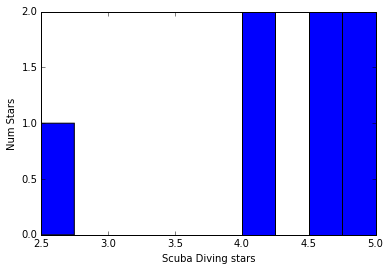

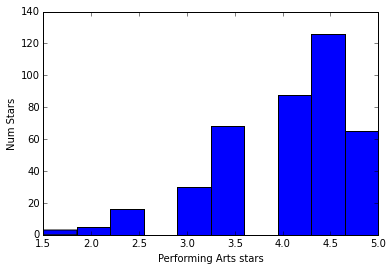

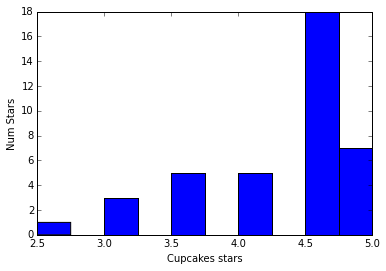

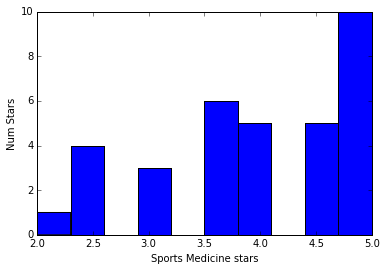

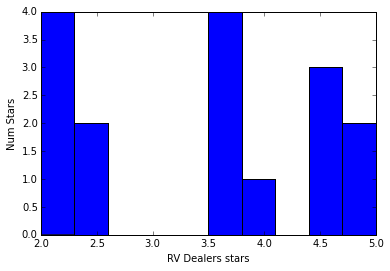

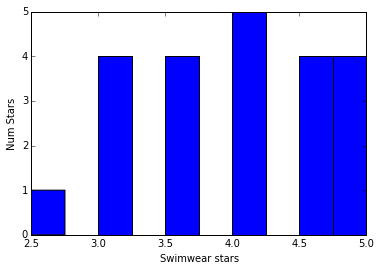

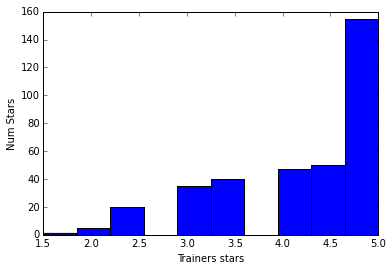

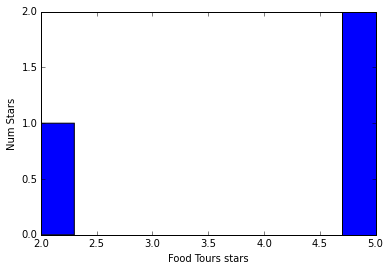

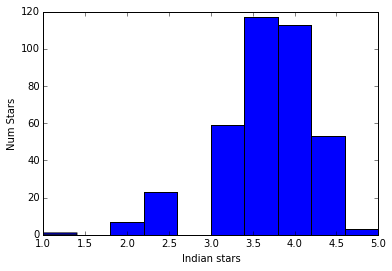

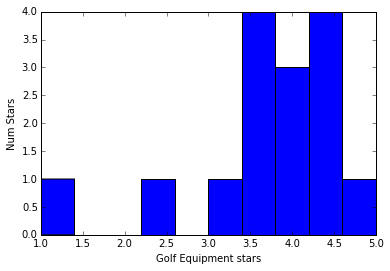

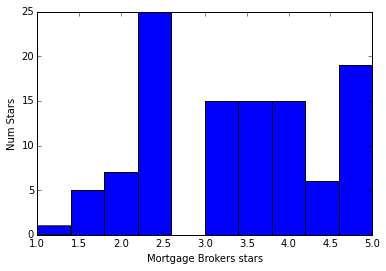

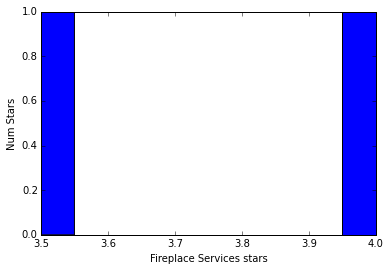

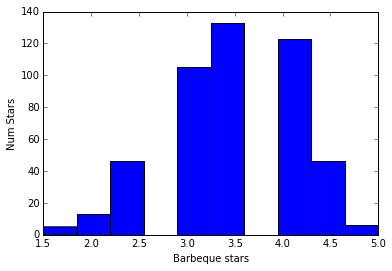

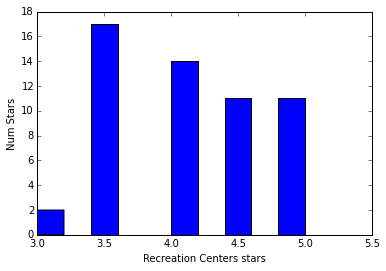

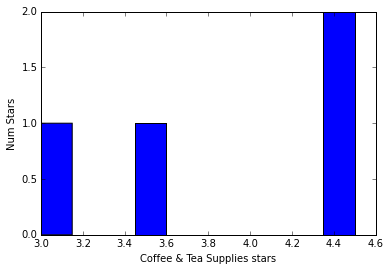

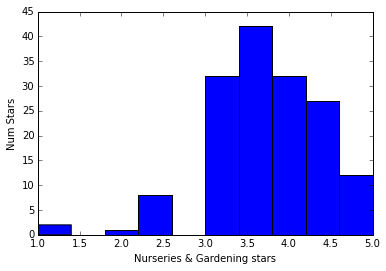

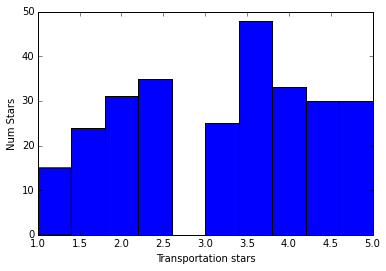

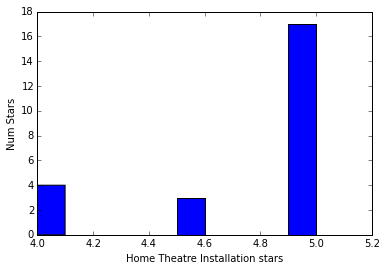

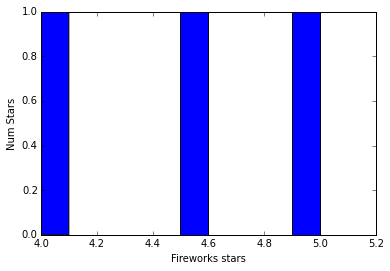

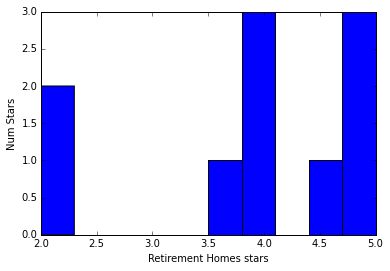

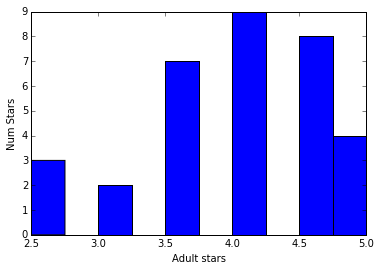

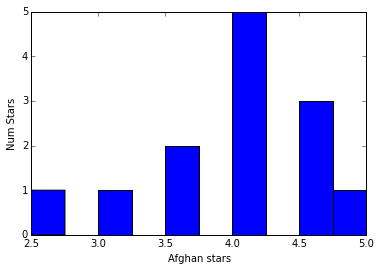

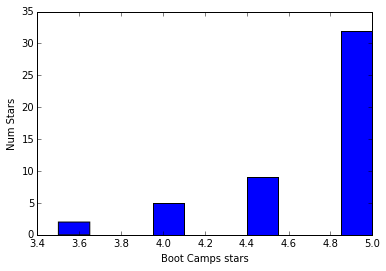

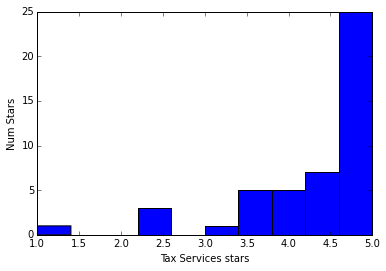

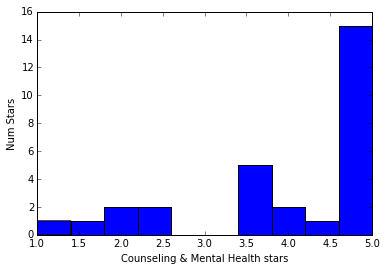

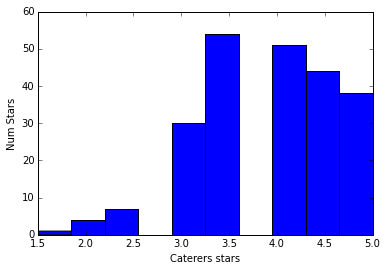

Category Sugaring only has 1 data point. That point is: 5.0


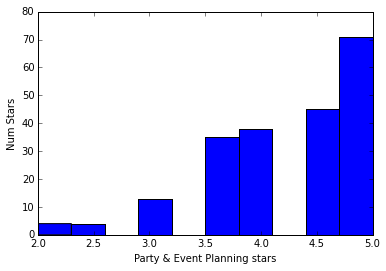

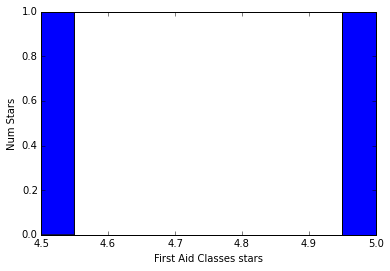

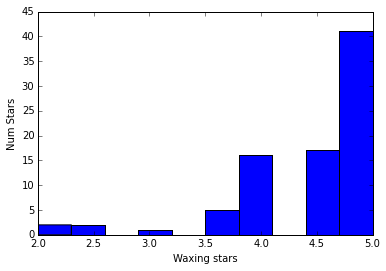

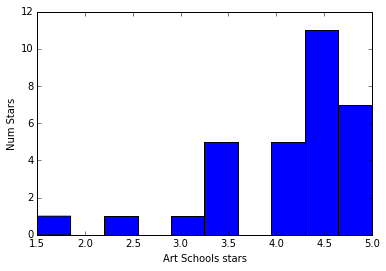

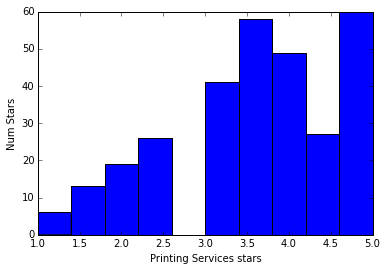

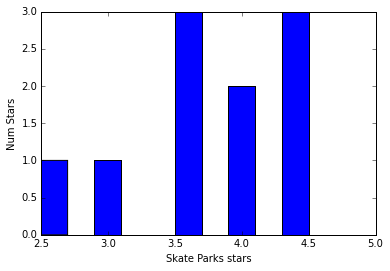

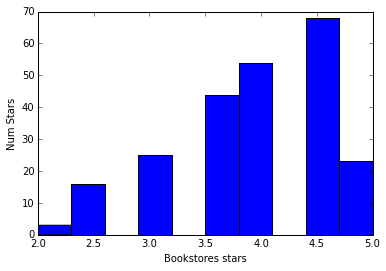

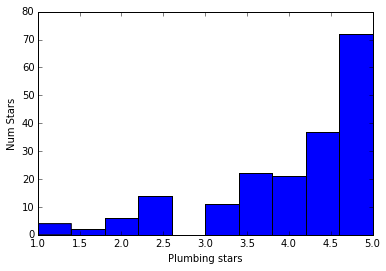

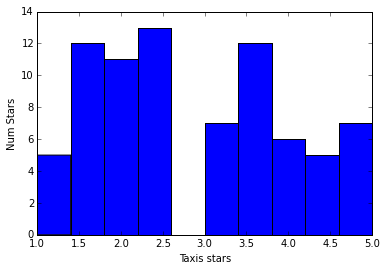

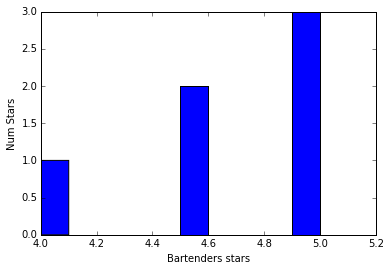

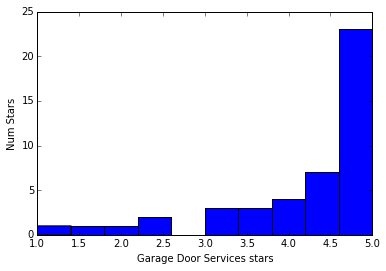

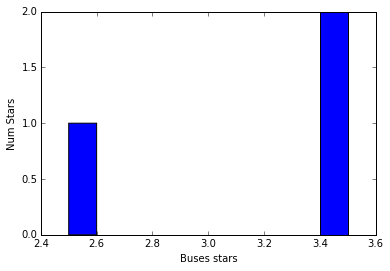

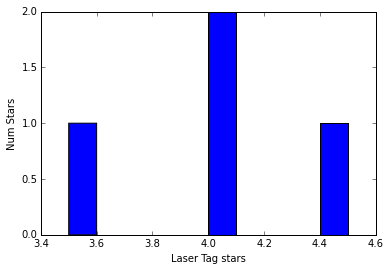

Category Fire Protection Services only has 1 data point. That point is: 4.5


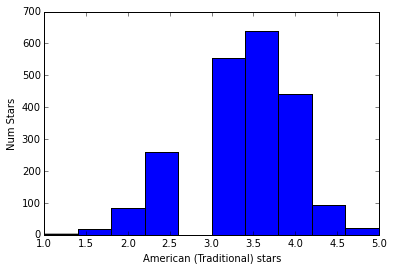

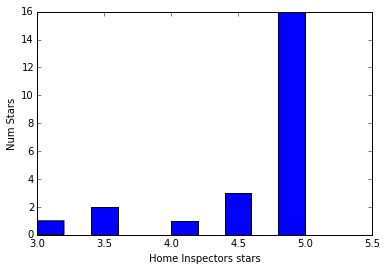

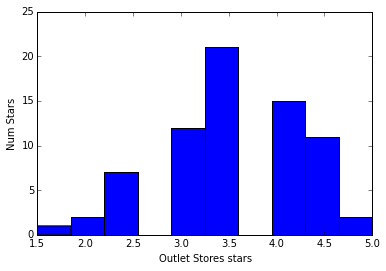

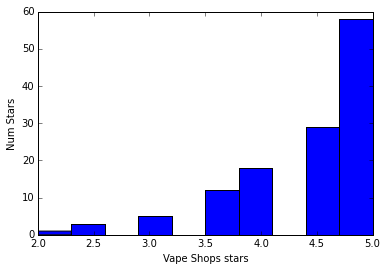

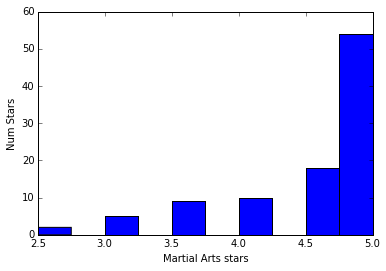

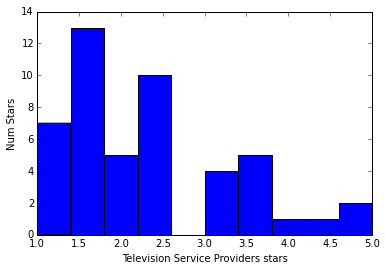

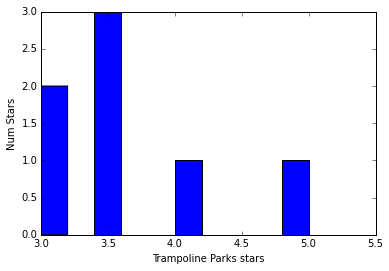

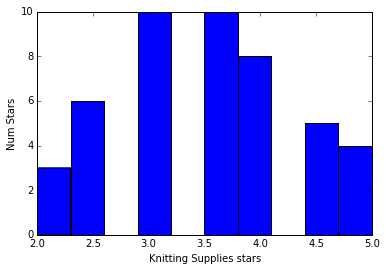

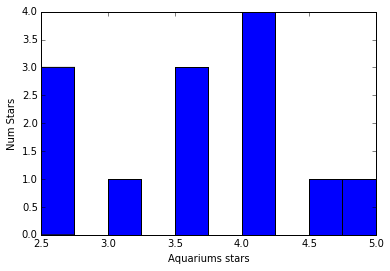

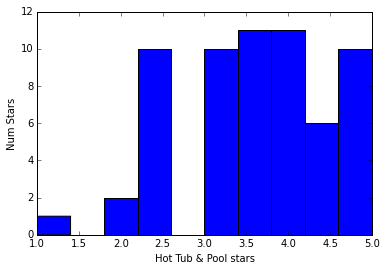

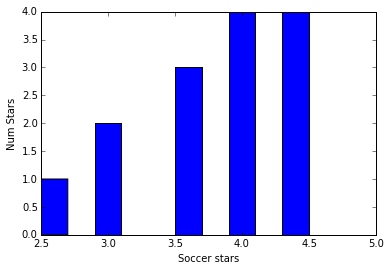

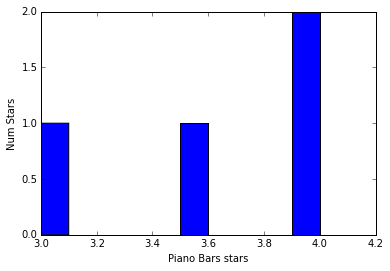

Category Religious Schools only has 1 data point. That point is: 5.0


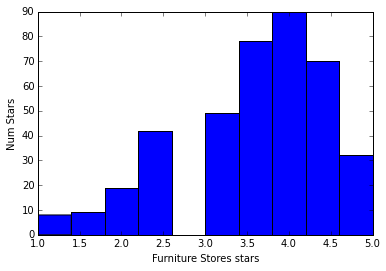

Category Ukrainian only has 1 data point. That point is: 4.0


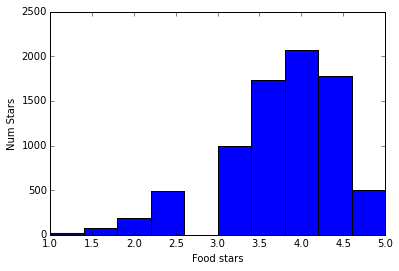

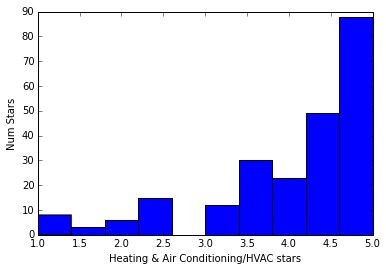

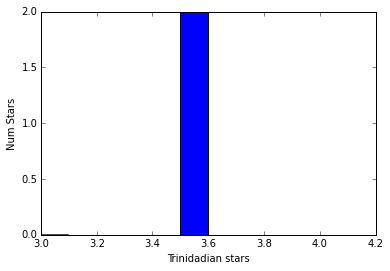

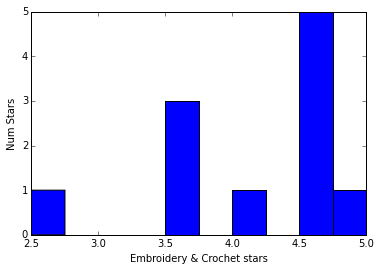

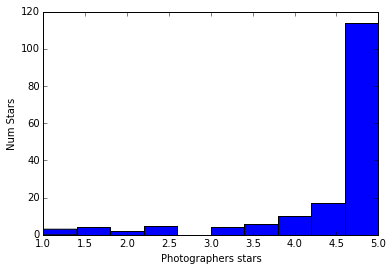

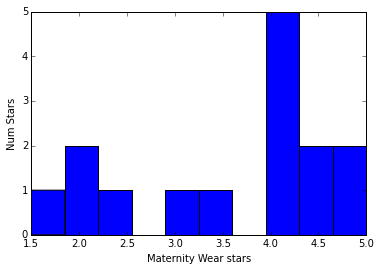

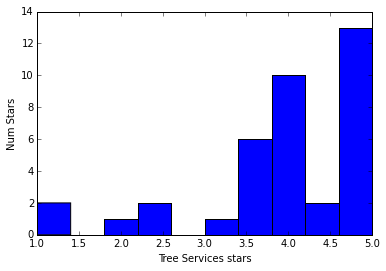

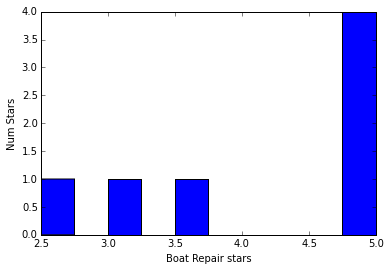

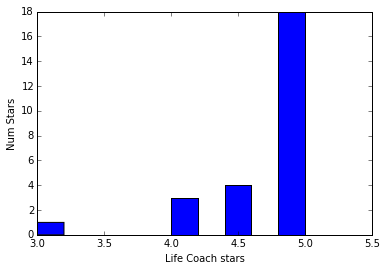

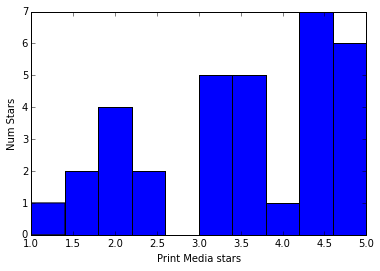

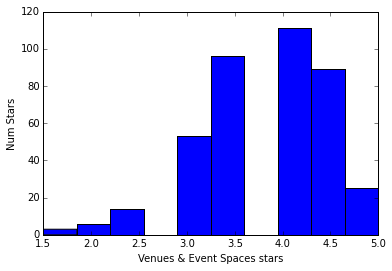

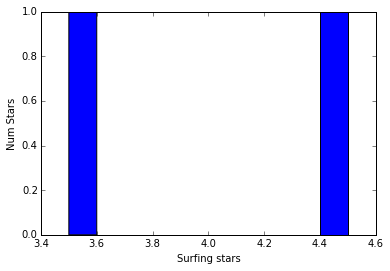

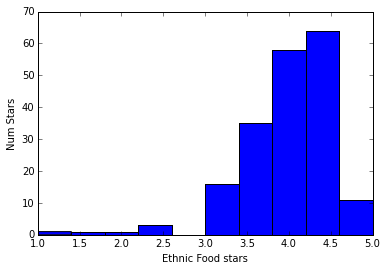

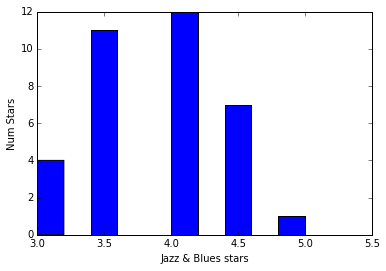

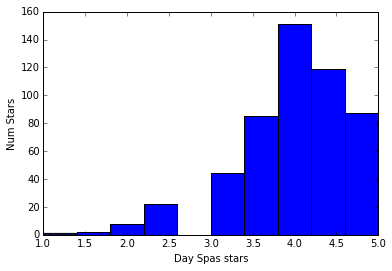

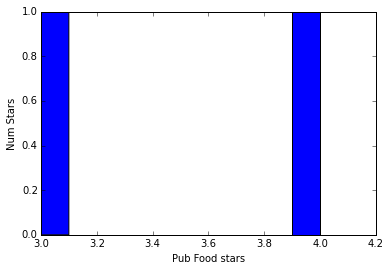

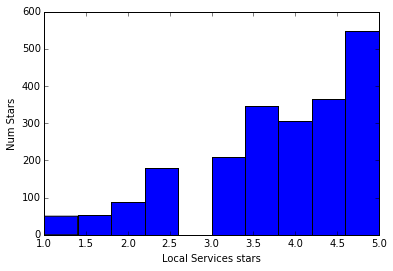

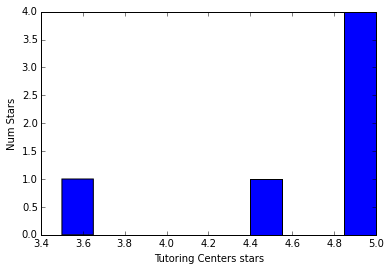

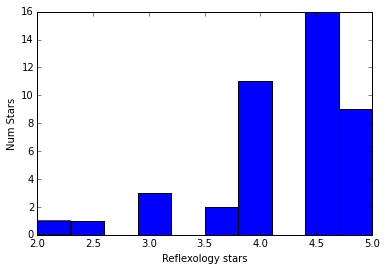

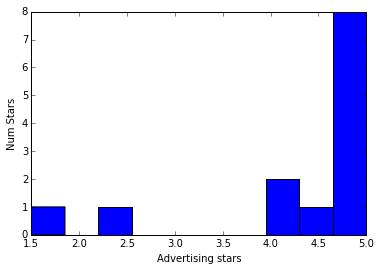

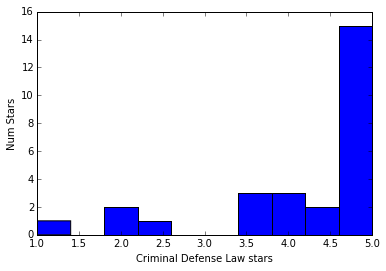

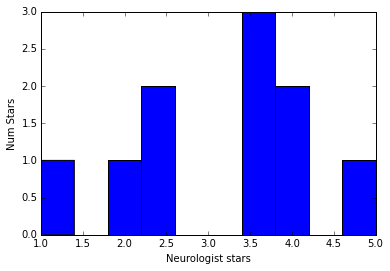

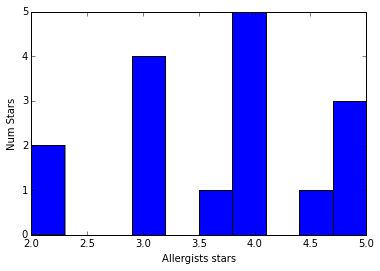

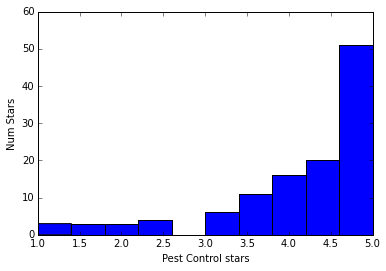

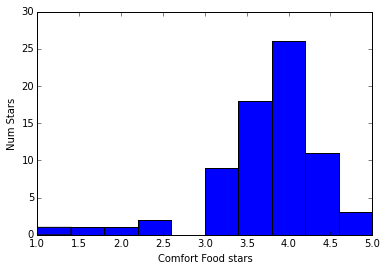

Category Surf Shop only has 1 data point. That point is: 4.5


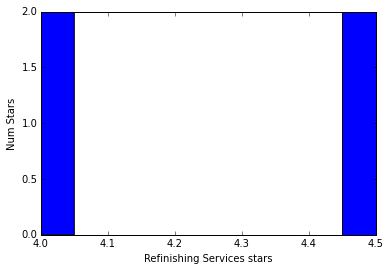

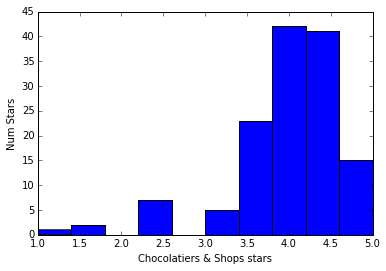

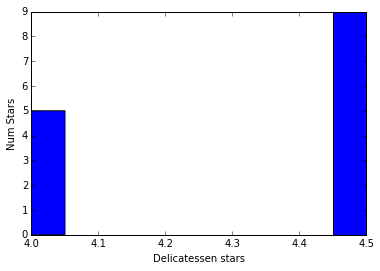

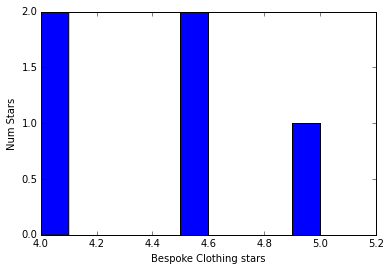

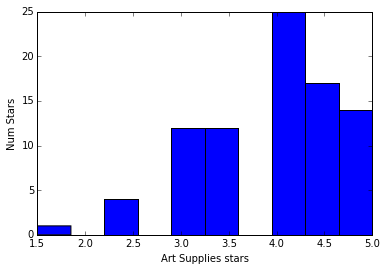

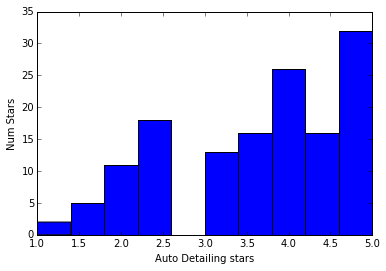

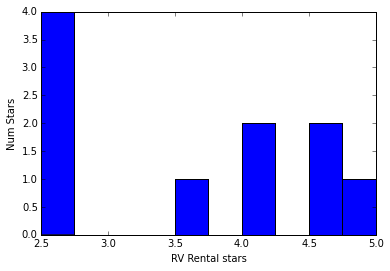

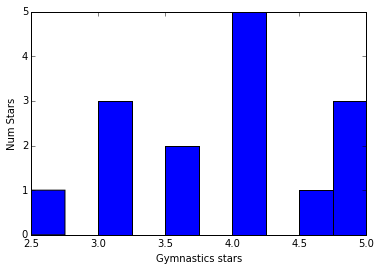

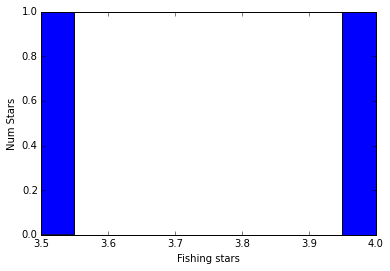

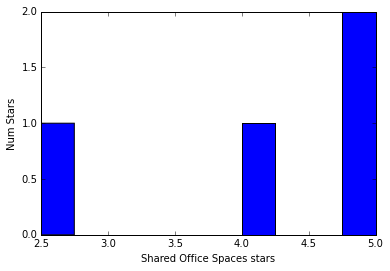

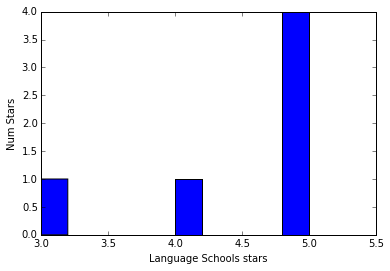

Category Cafeteria only has 1 data point. That point is: 3.5


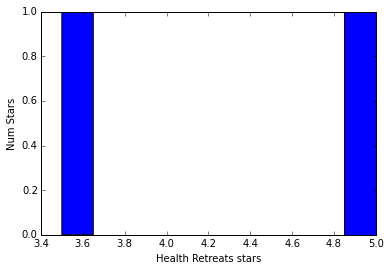

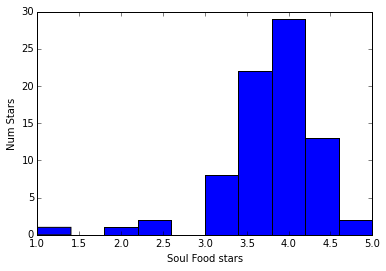

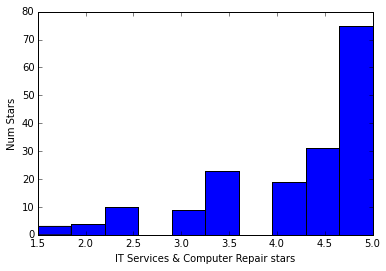

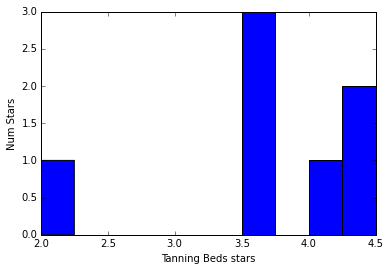

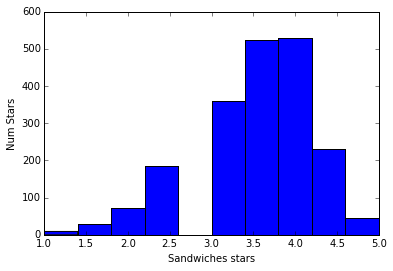

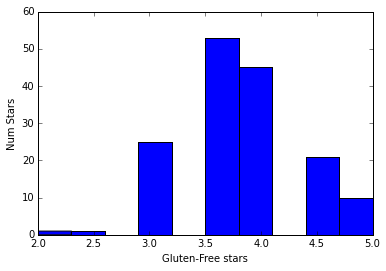

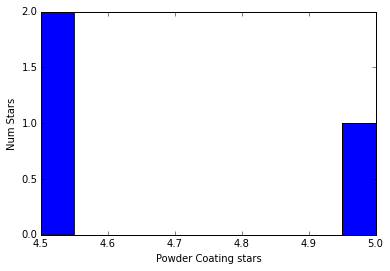

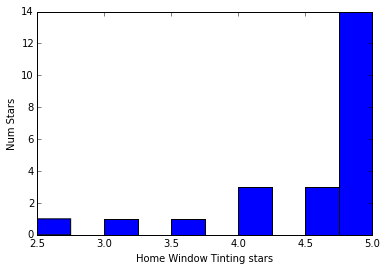

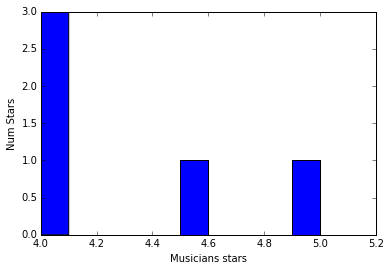

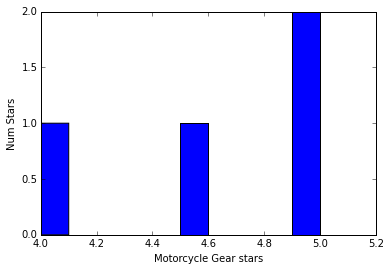

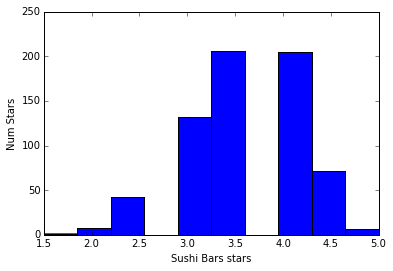

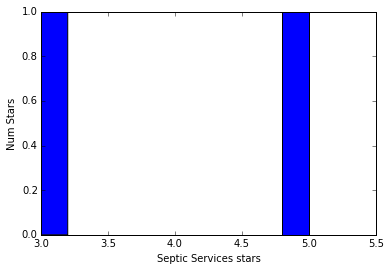

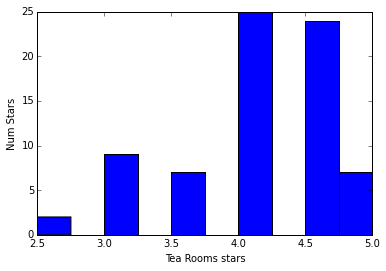

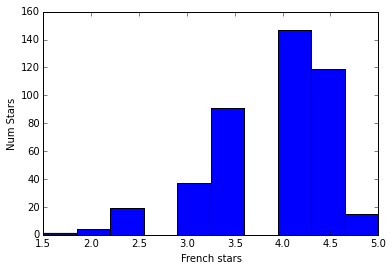

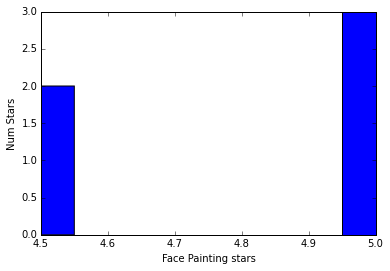

Category Haitian only has 1 data point. That point is: 4.0


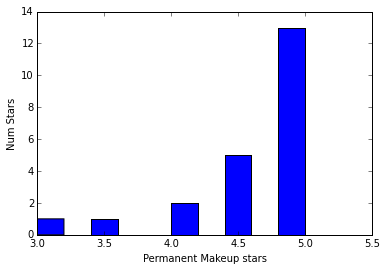

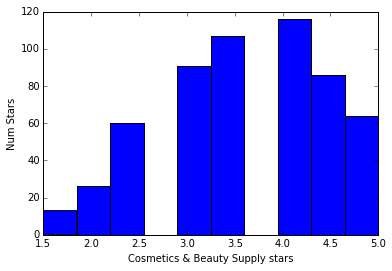

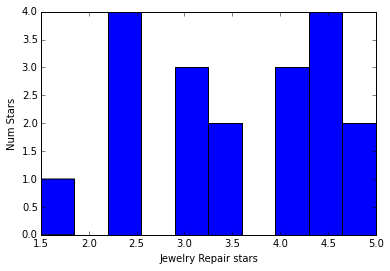

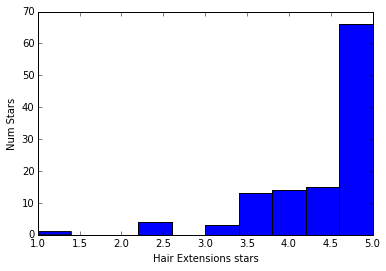

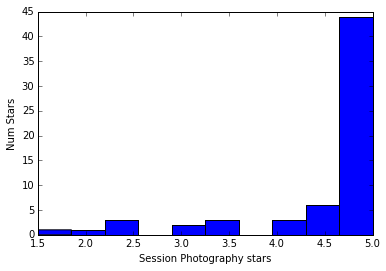

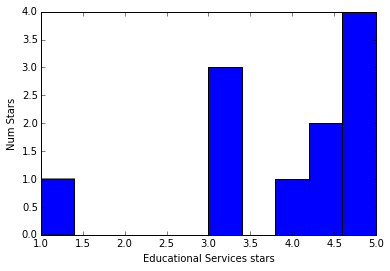

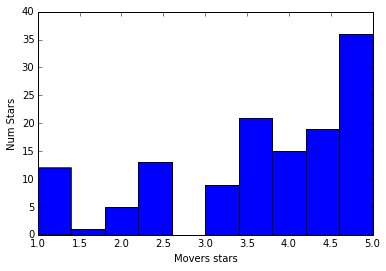

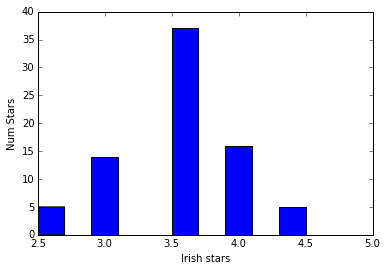

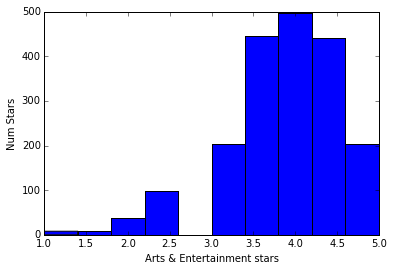

Category College Counseling only has 1 data point. That point is: 3.5


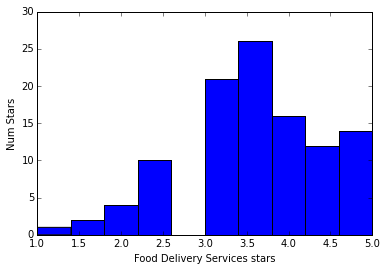

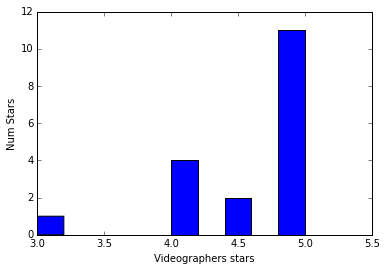

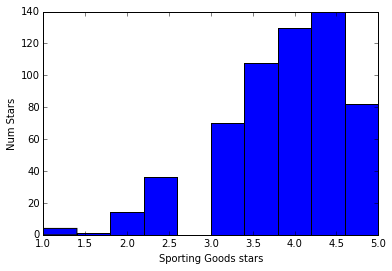

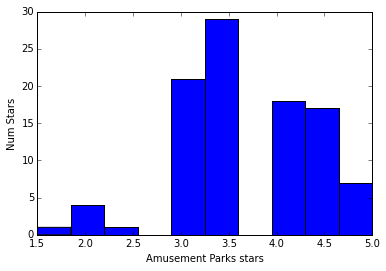

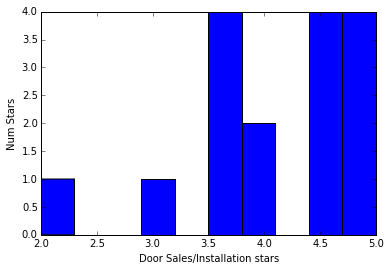

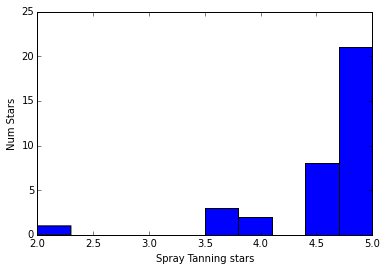

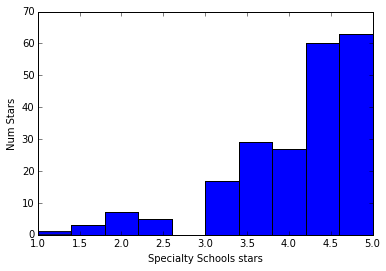

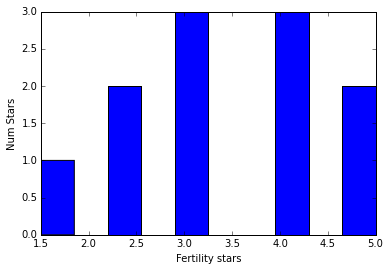

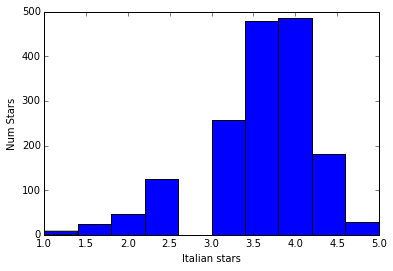

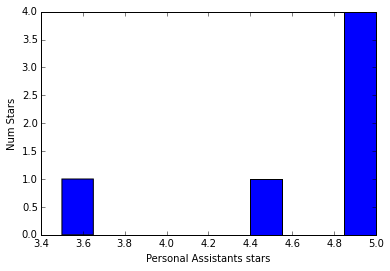

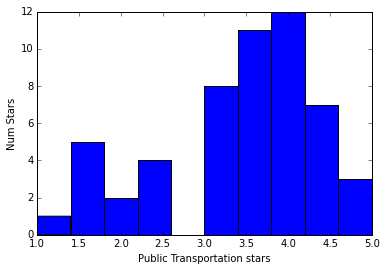

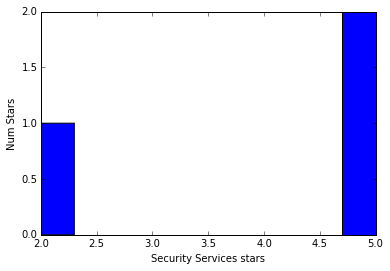

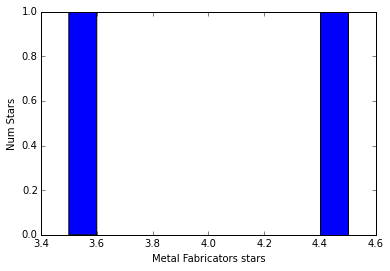

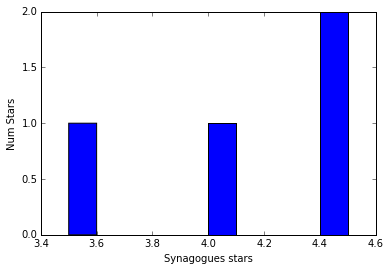

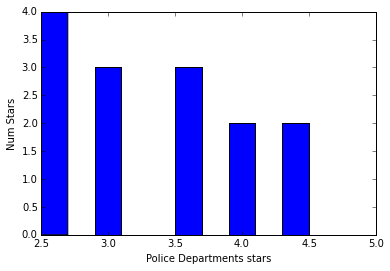

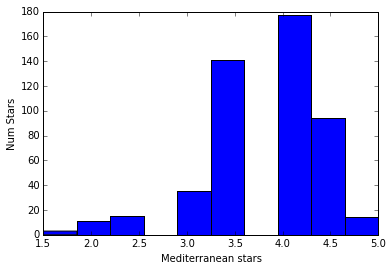

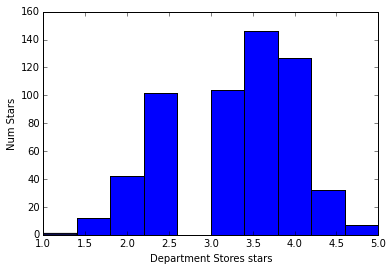

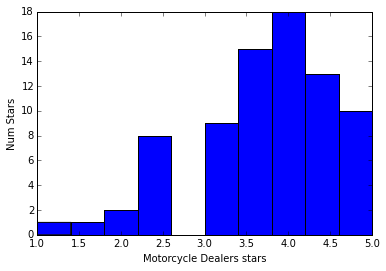

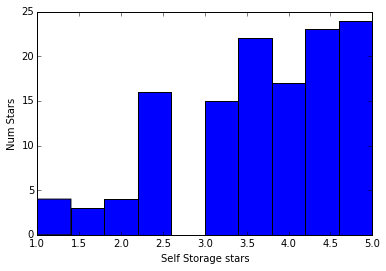

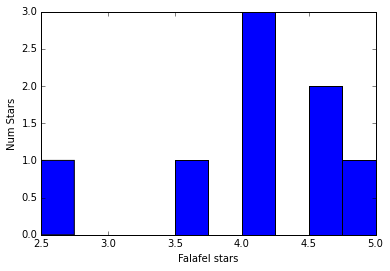

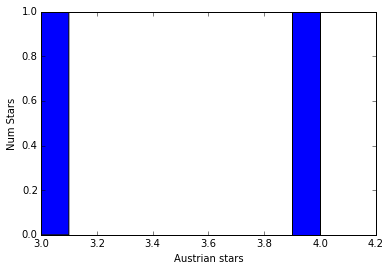

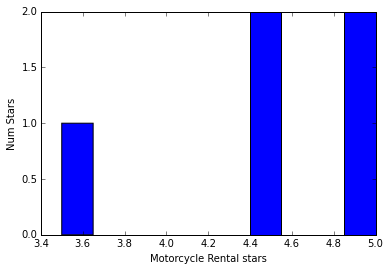

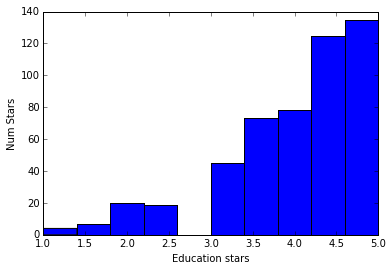

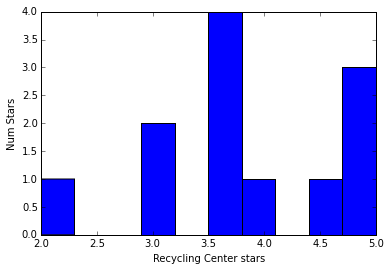

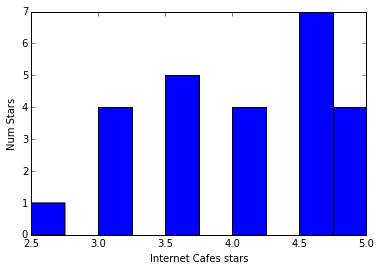

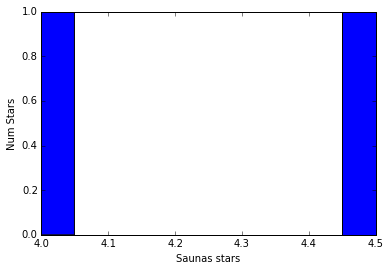

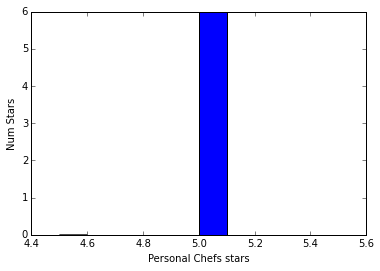

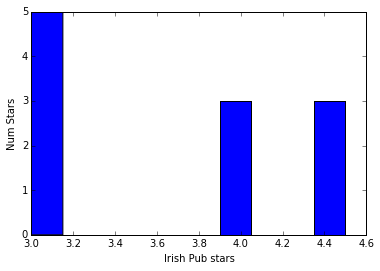

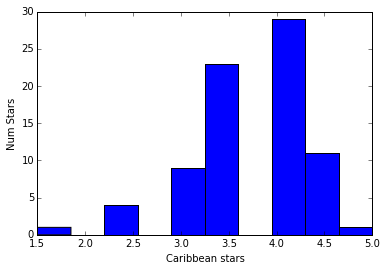

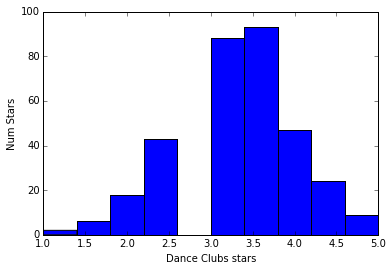

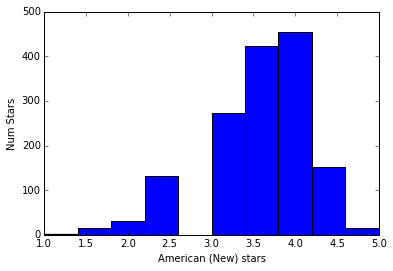

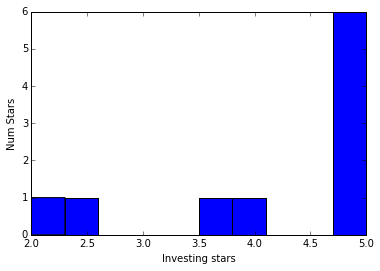

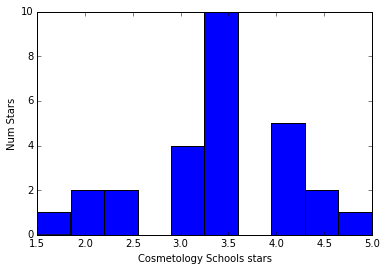

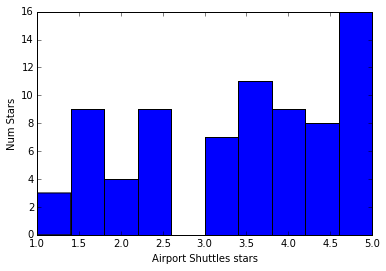

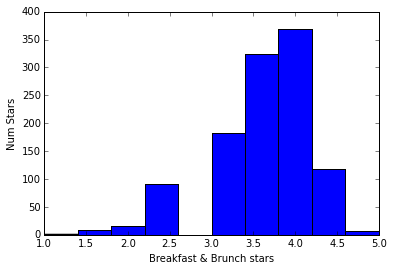

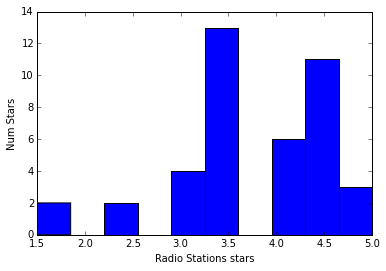

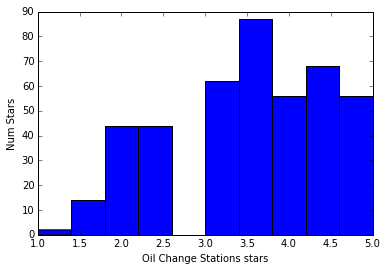

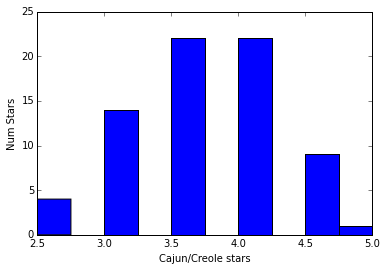

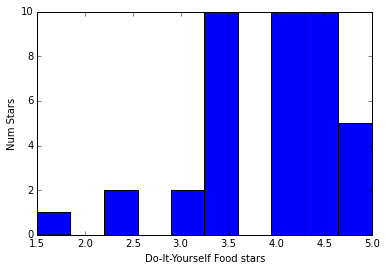

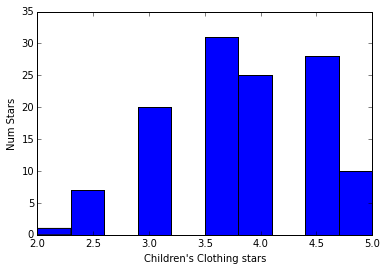

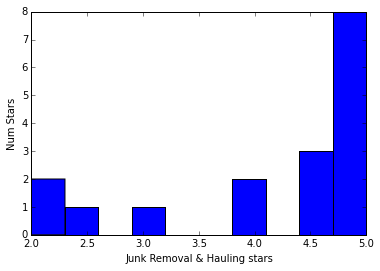

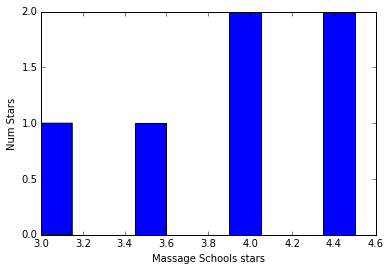

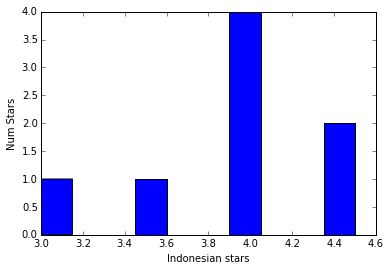

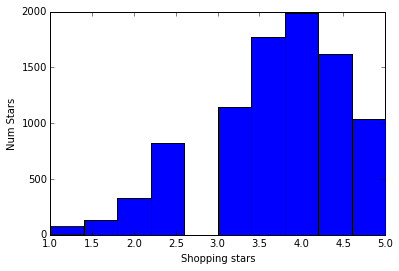

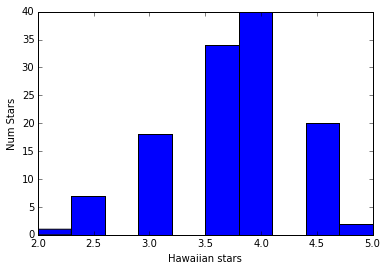

Category Izakaya only has 1 data point. That point is: 4.5
Category Valet Services only has 1 data point. That point is: 4.5


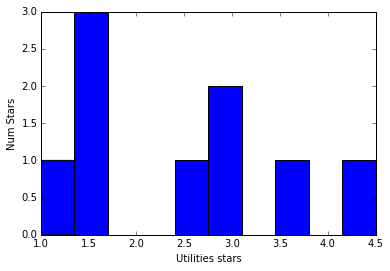

Category Iberian only has 1 data point. That point is: 4.5


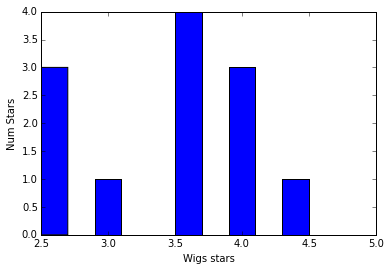

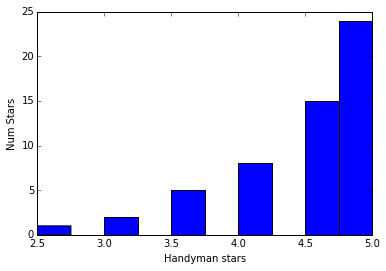

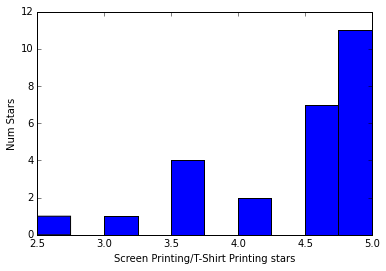

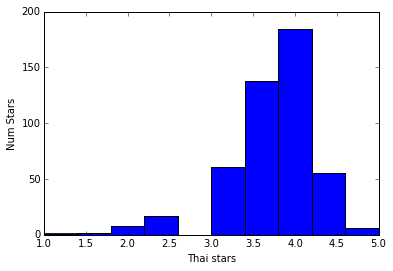

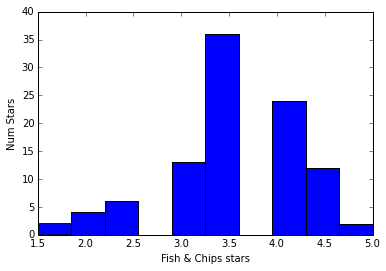

Category Pulmonologist only has 1 data point. That point is: 4.5
Category High Fidelity Audio Equipment only has 1 data point. That point is: 4.5


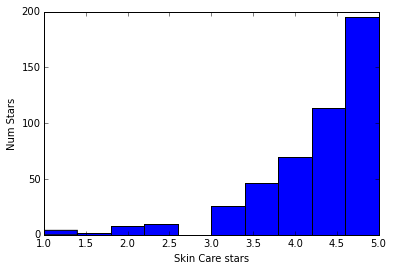

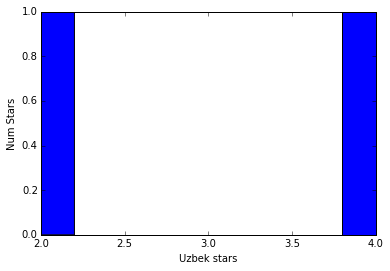

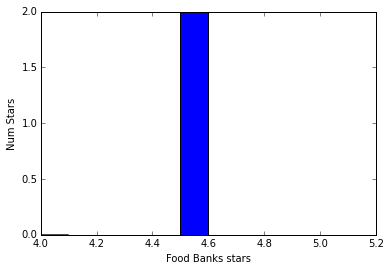

Category Public Plazas only has 1 data point. That point is: 4.0


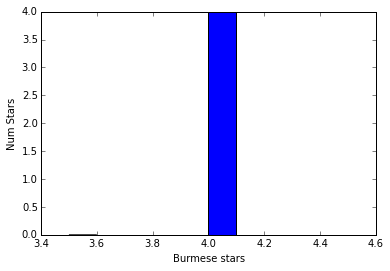

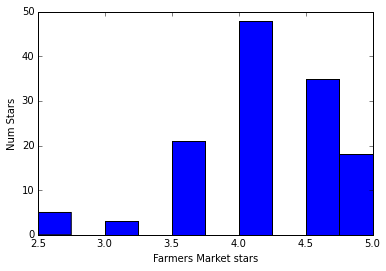

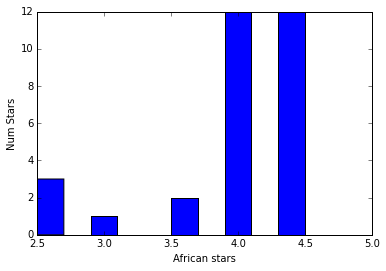

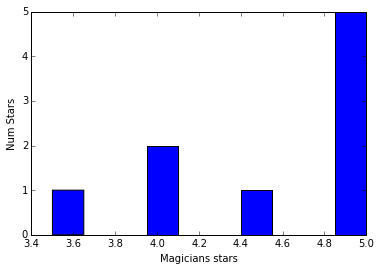

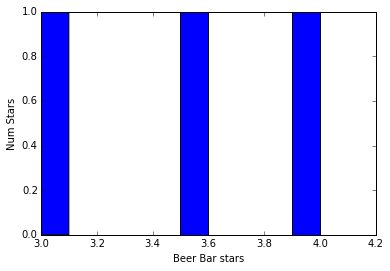

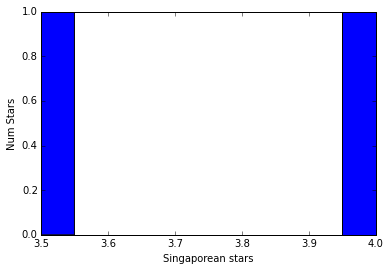

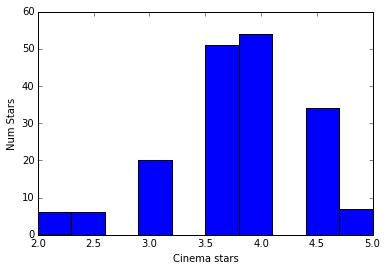

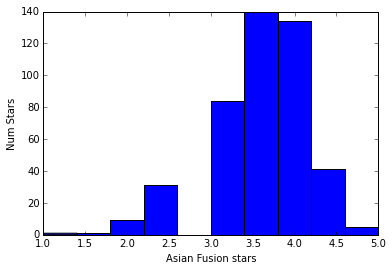

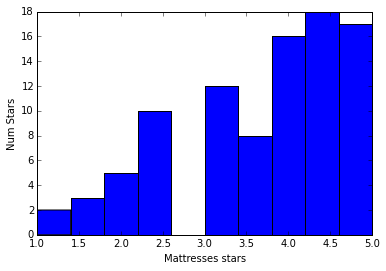

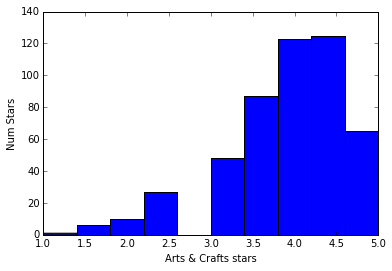

Category Gutter Services only has 1 data point. That point is: 5.0


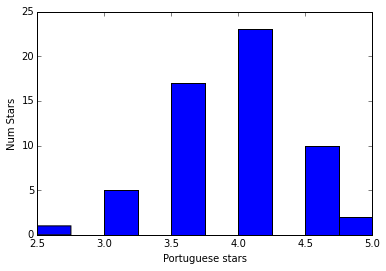

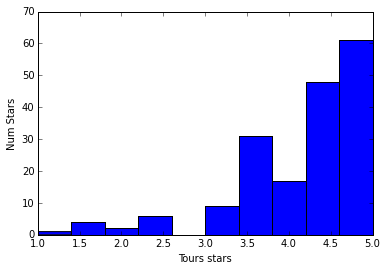

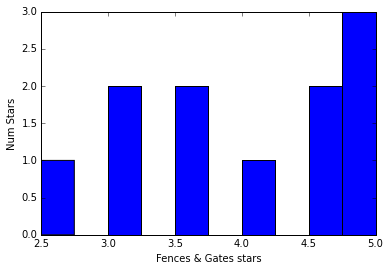

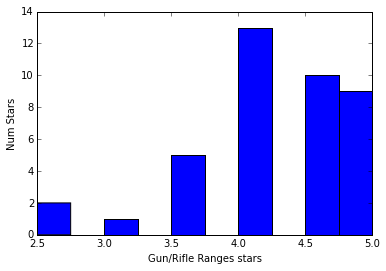

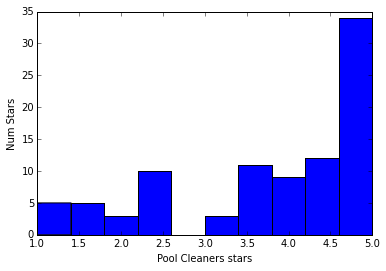

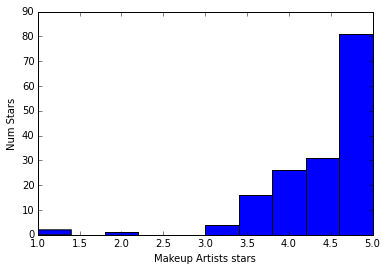

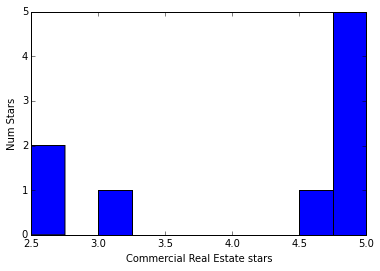

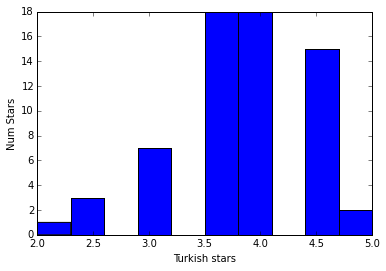

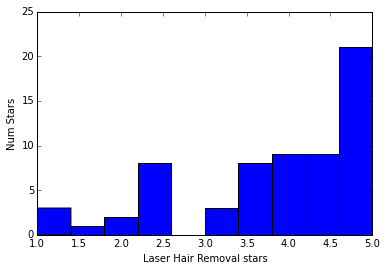

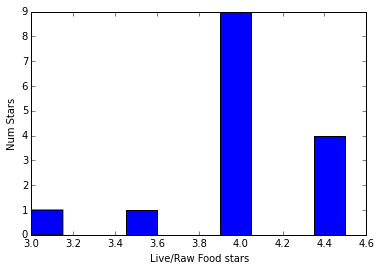

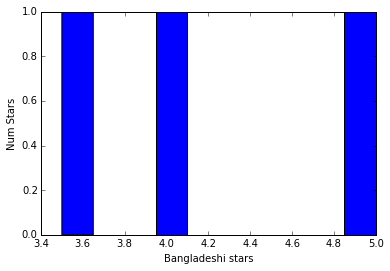

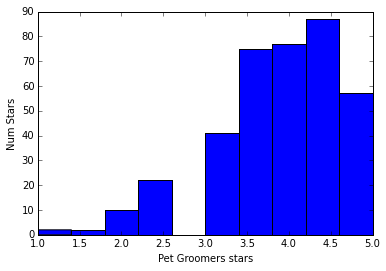

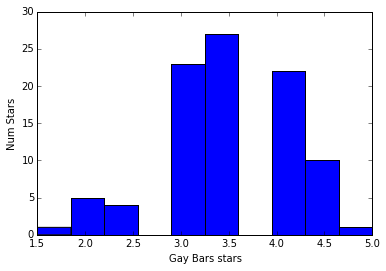

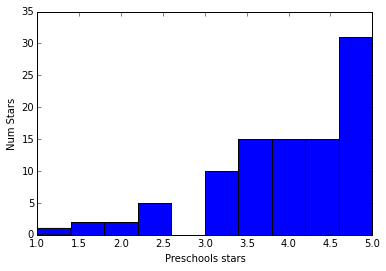

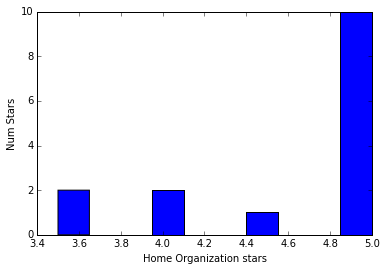

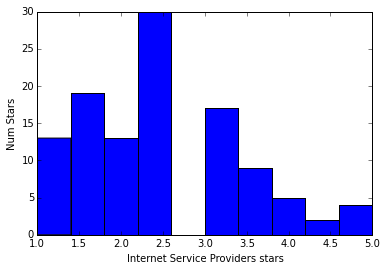

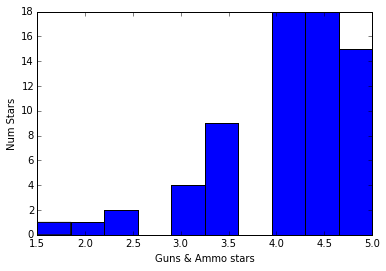

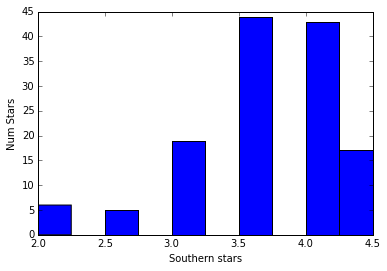

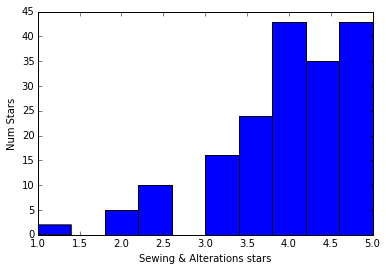

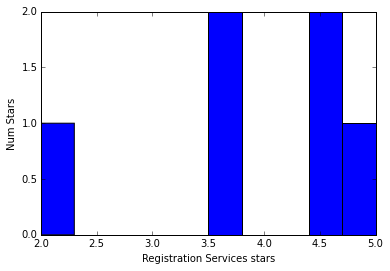

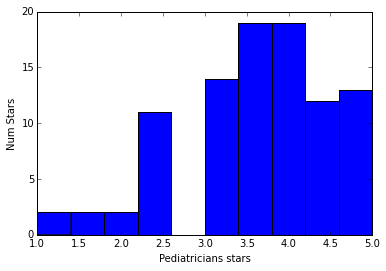

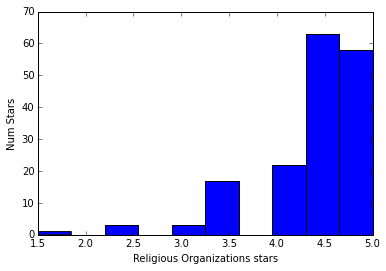

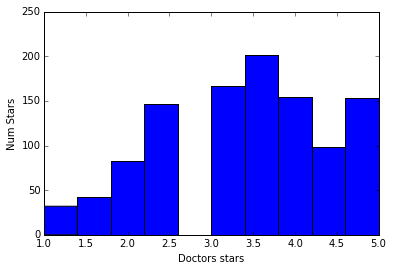

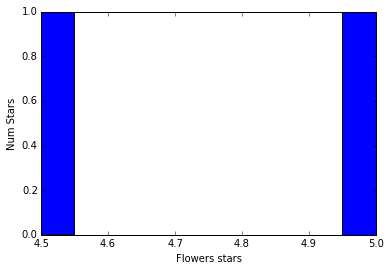

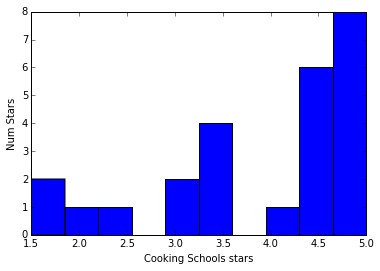

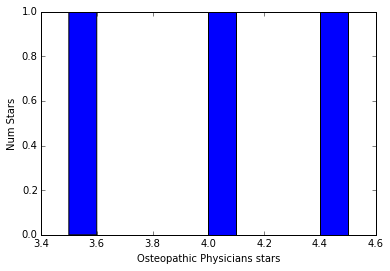

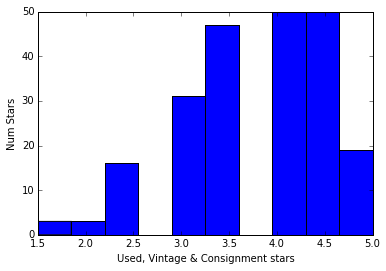

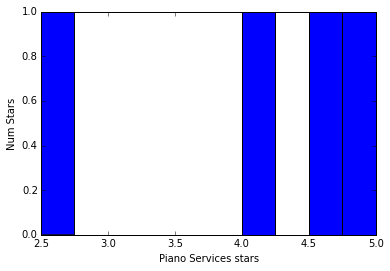

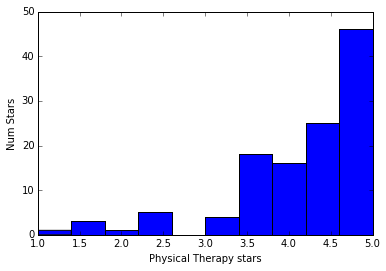

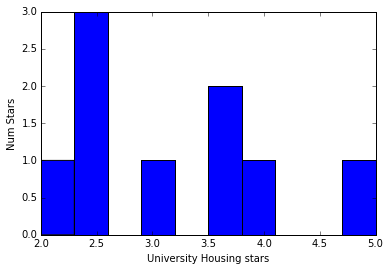

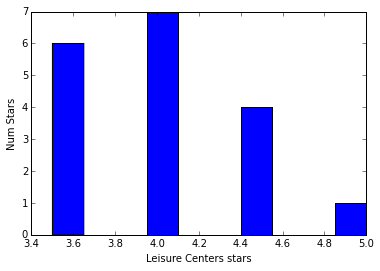

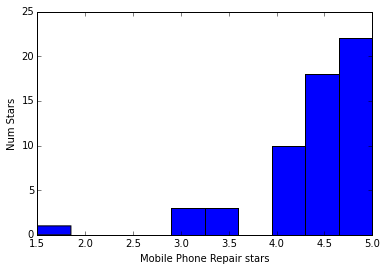

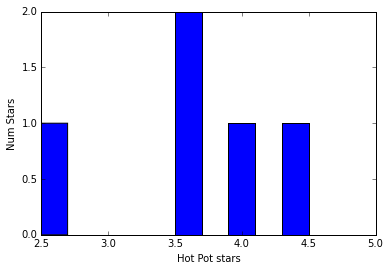

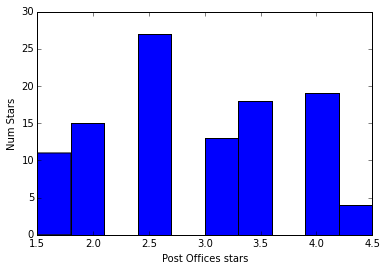

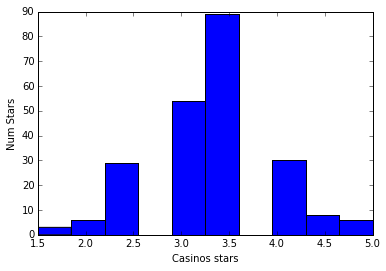

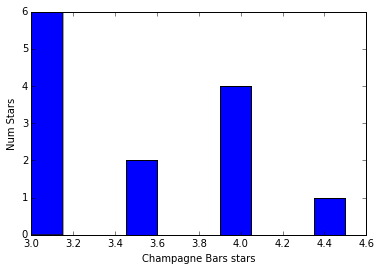

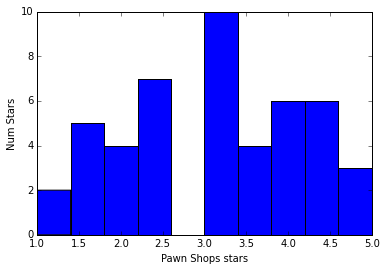

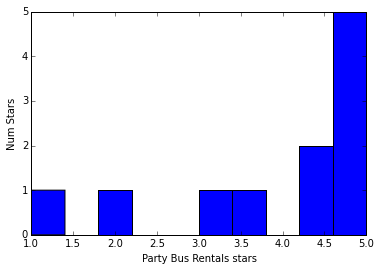

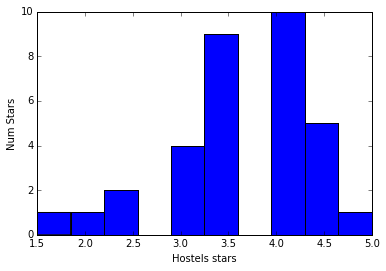

Category Castles only has 1 data point. That point is: 4.5


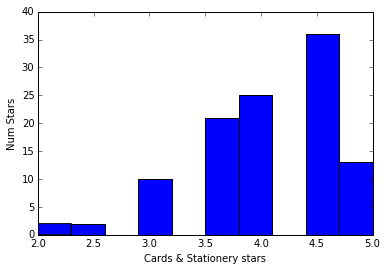

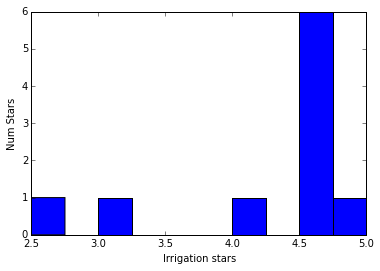

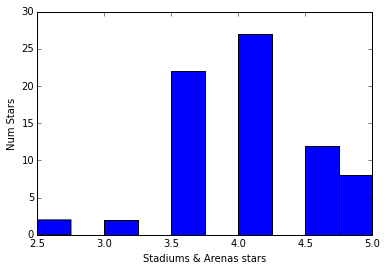

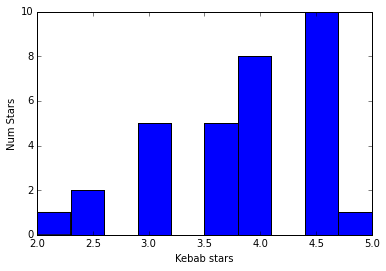

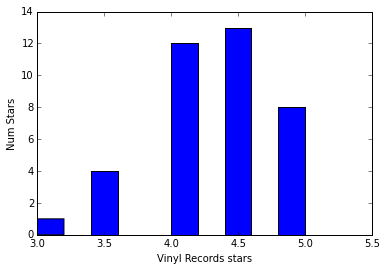

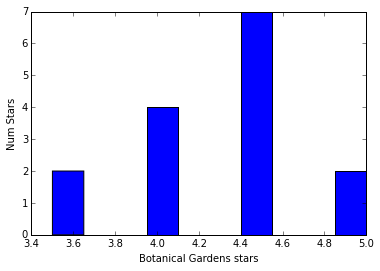

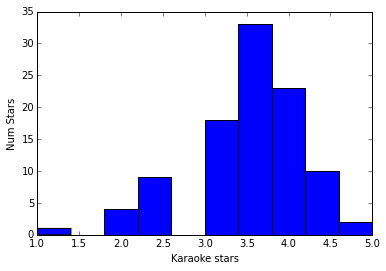

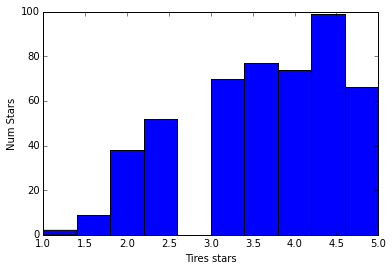

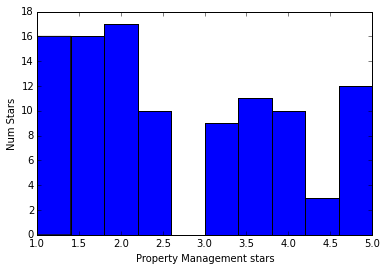

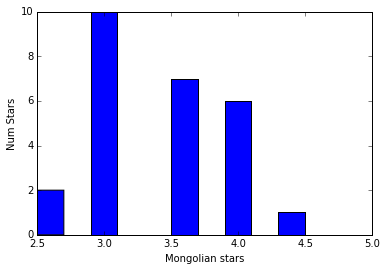

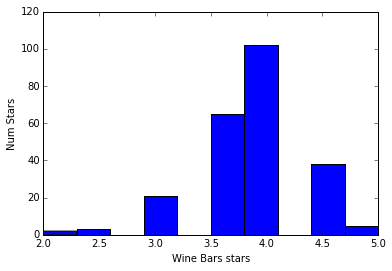

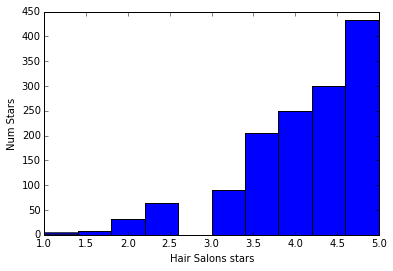

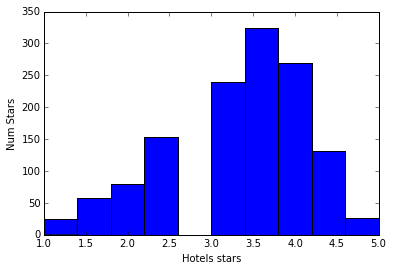

Category Golf Equipment Shops only has 1 data point. That point is: 4.5


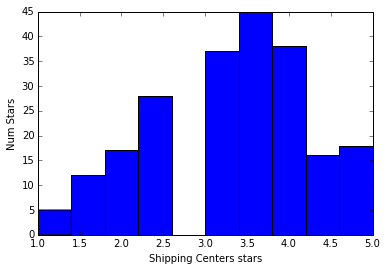

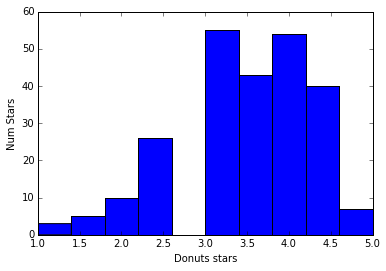

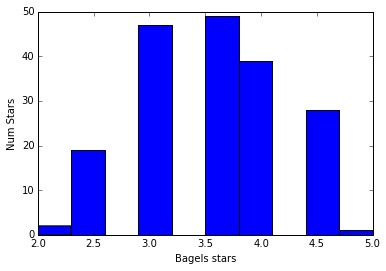

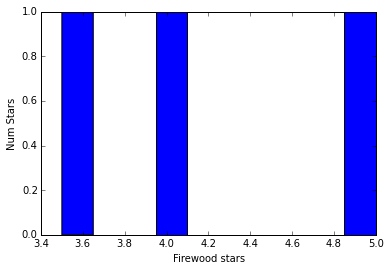

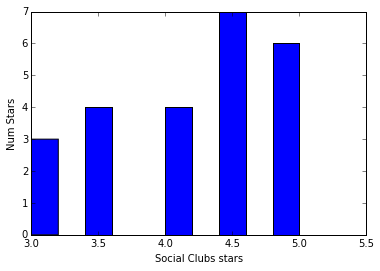

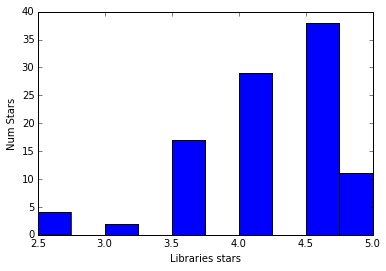

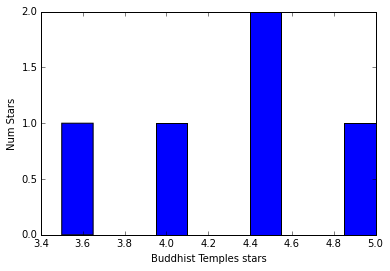

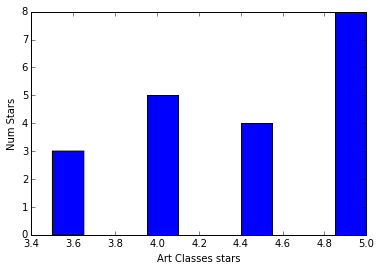

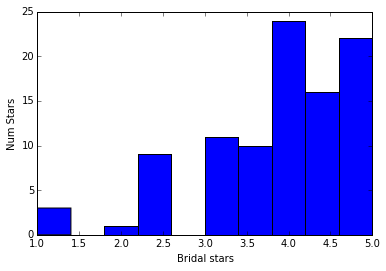

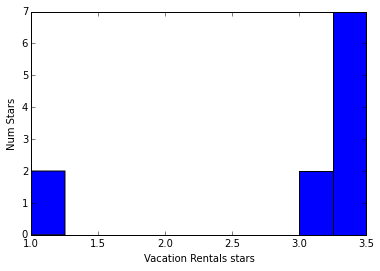

Category Walk-in Clinics only has 1 data point. That point is: 3.5


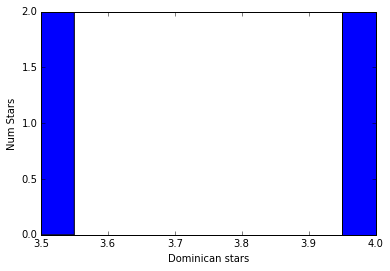

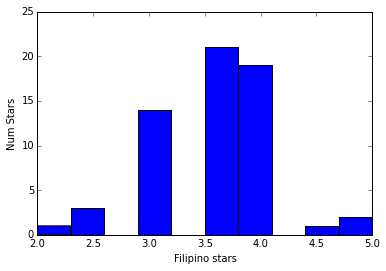

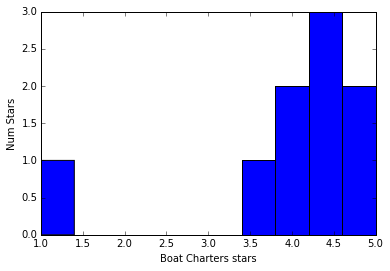

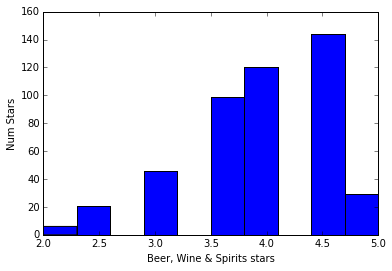

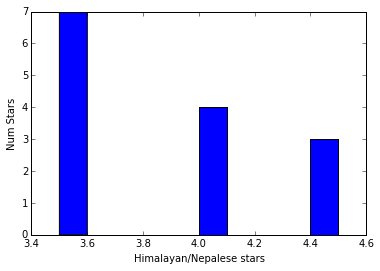

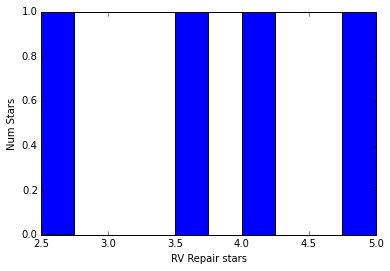

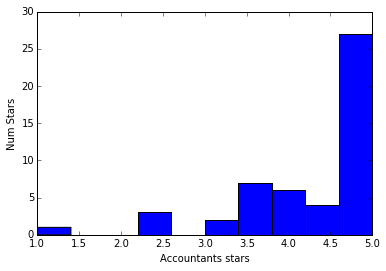

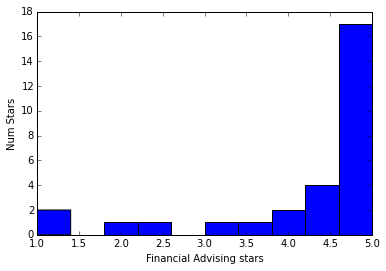

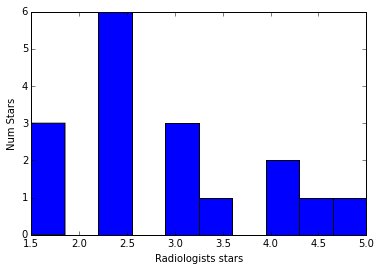

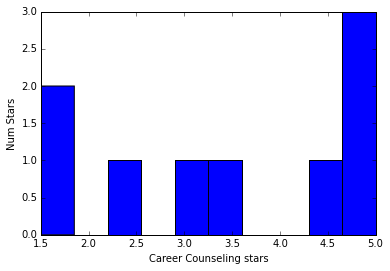

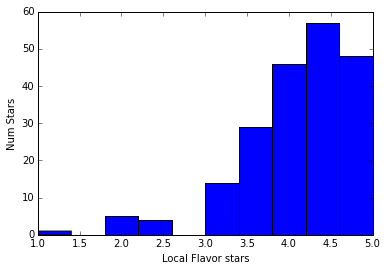

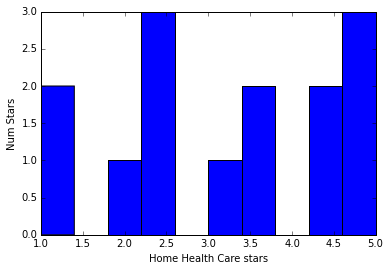

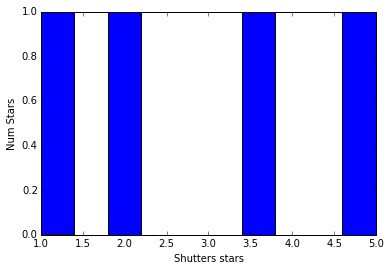

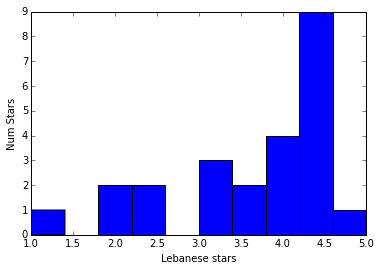

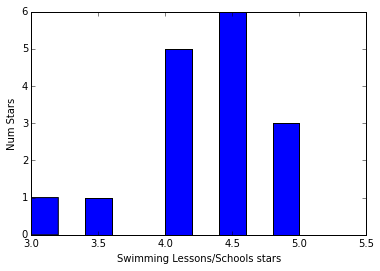

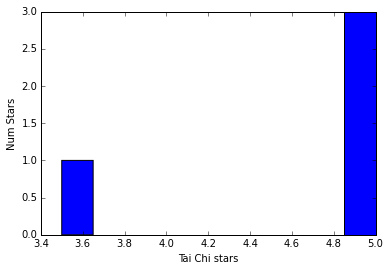

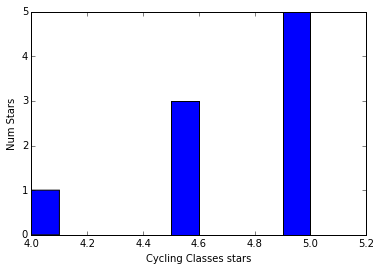

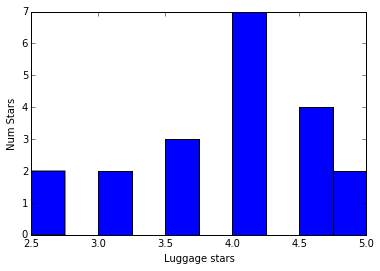

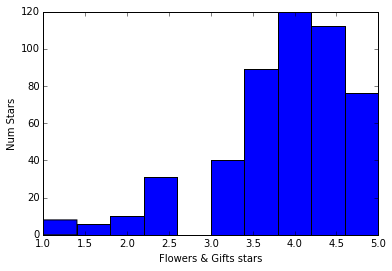

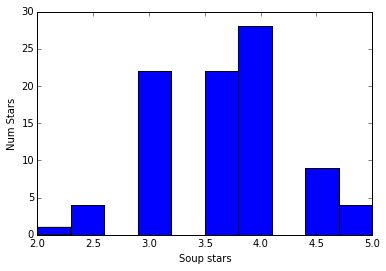

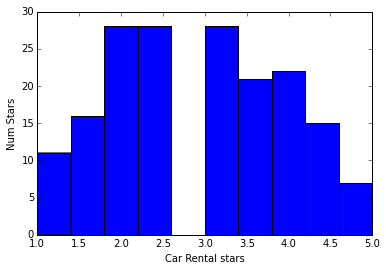

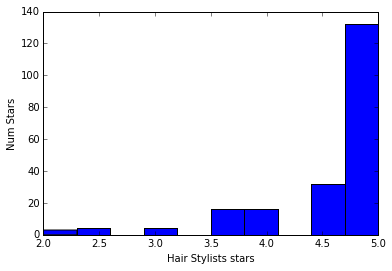

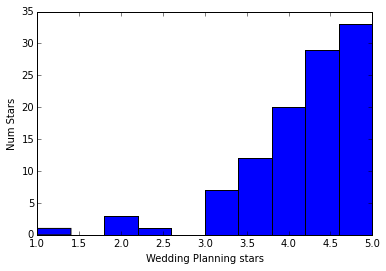

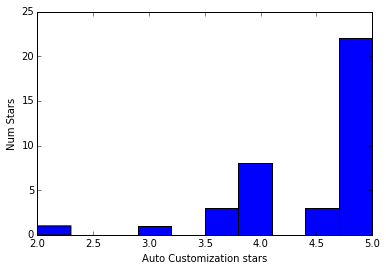

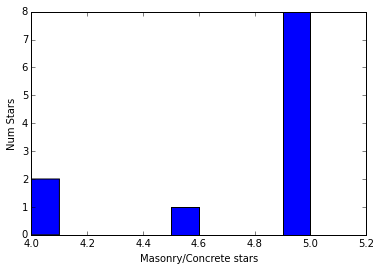

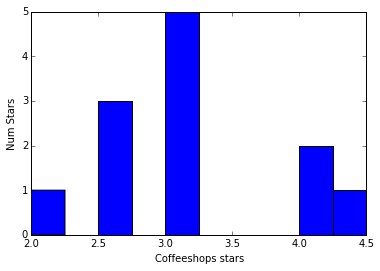

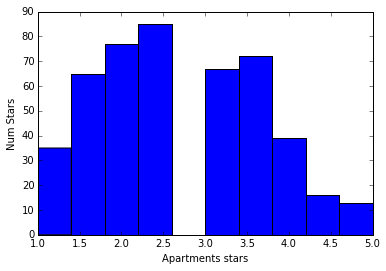

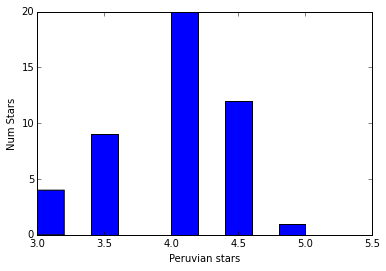

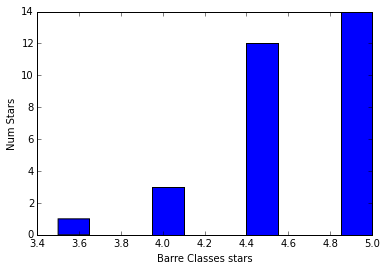

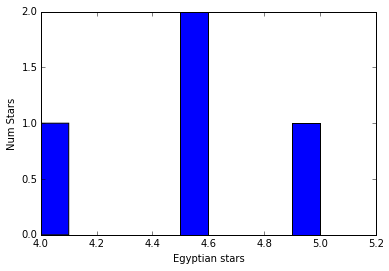

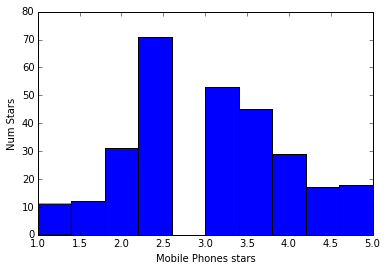

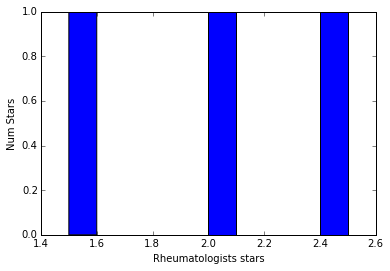

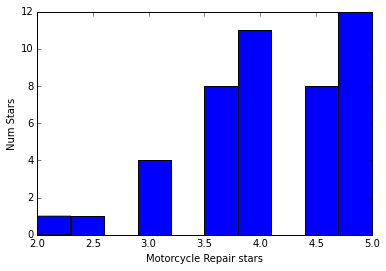

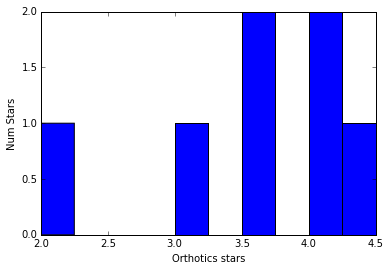

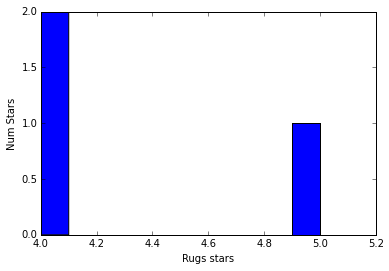

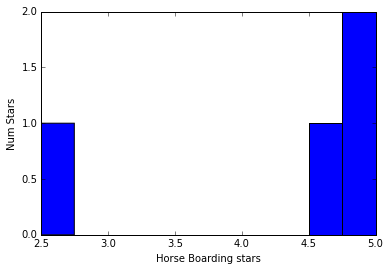

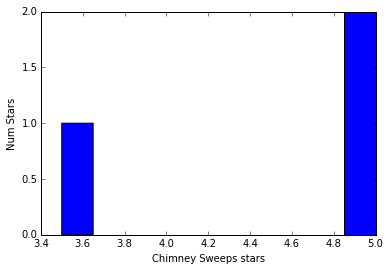

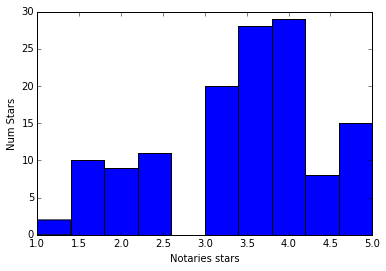

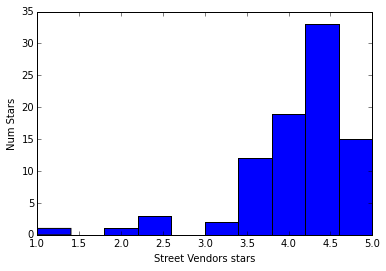

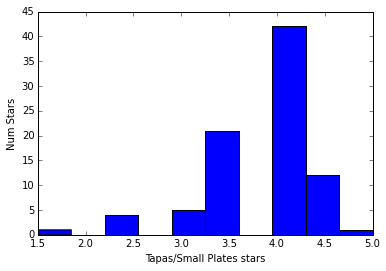

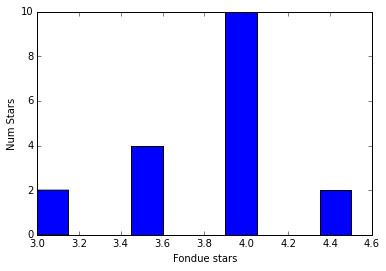

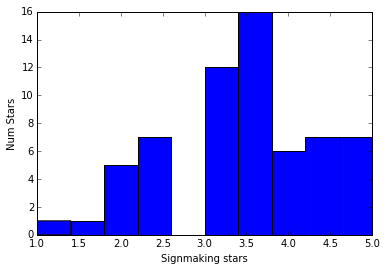

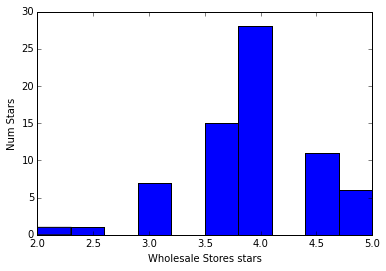

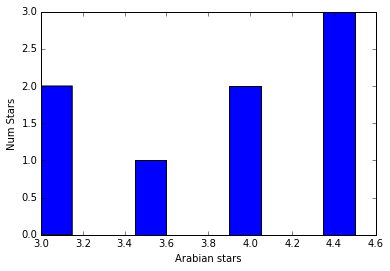

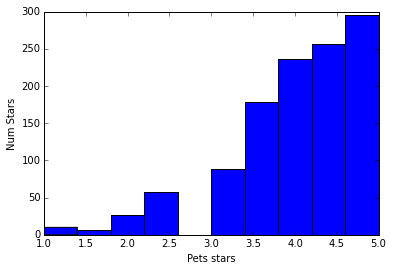

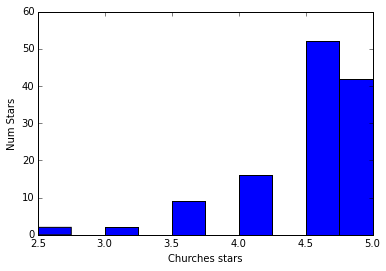

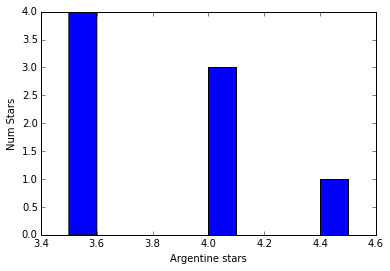

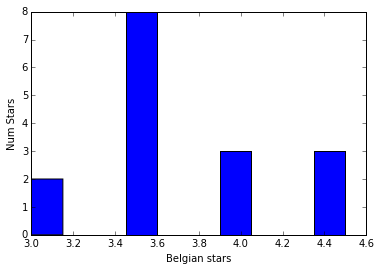

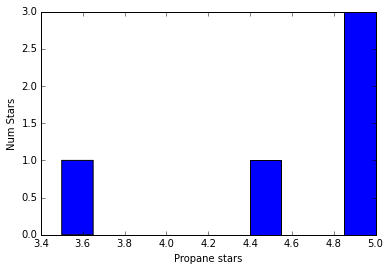

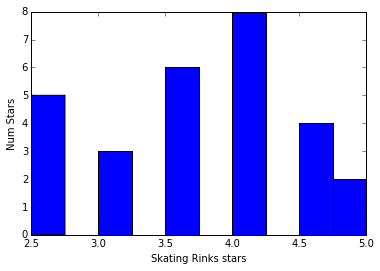

Category Day Camps only has 1 data point. That point is: 3.5


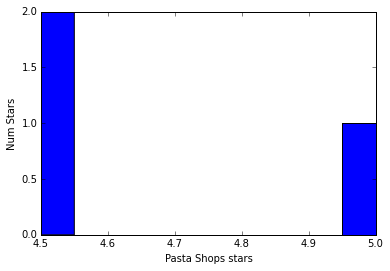

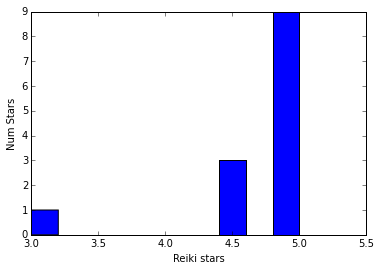

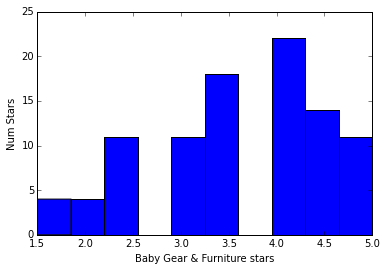

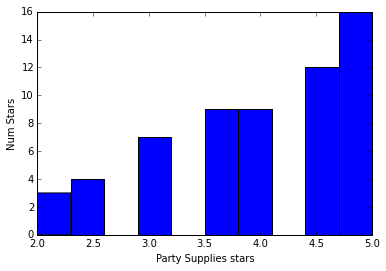

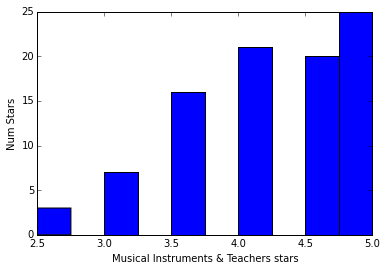

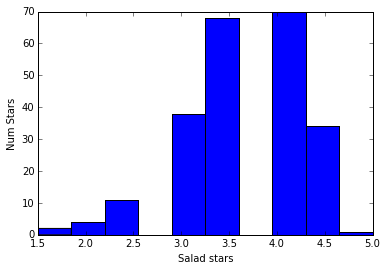

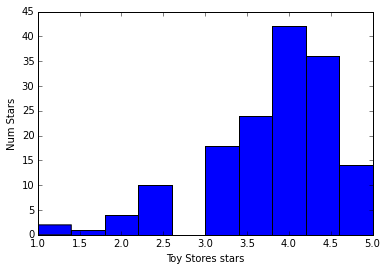

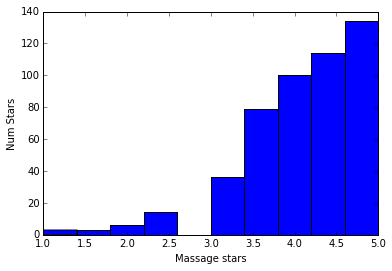

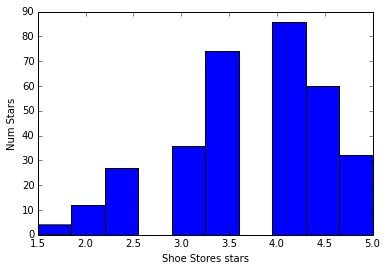

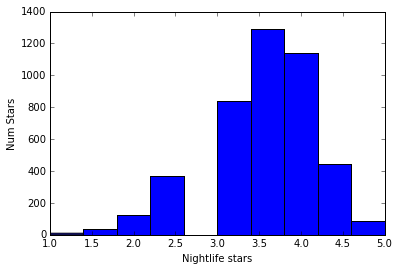

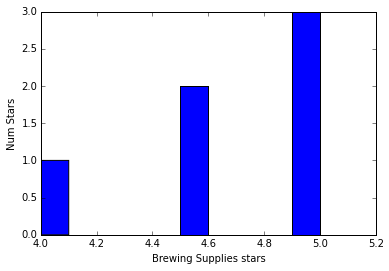

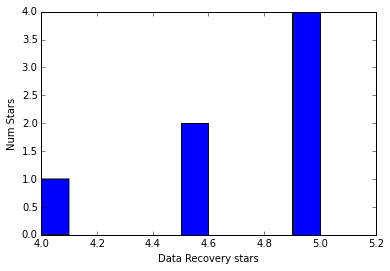

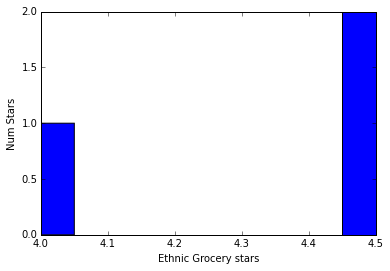

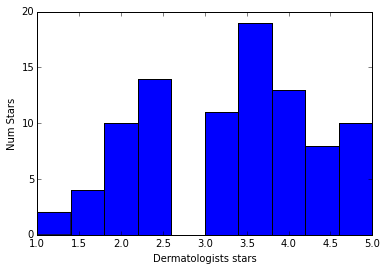

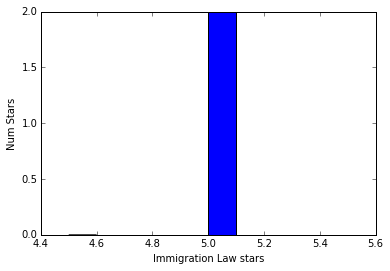

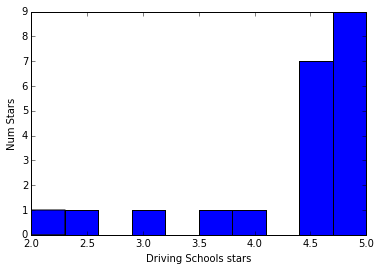

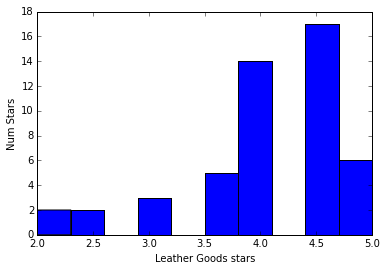

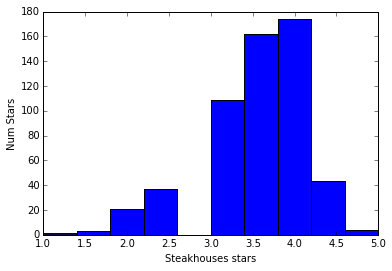

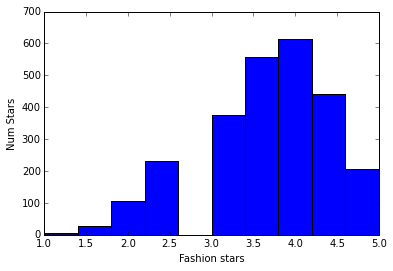

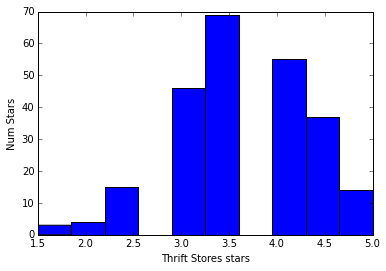

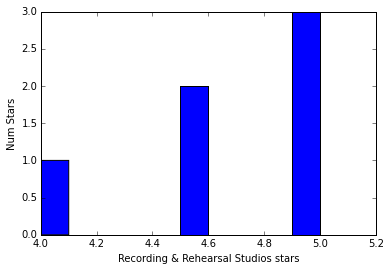

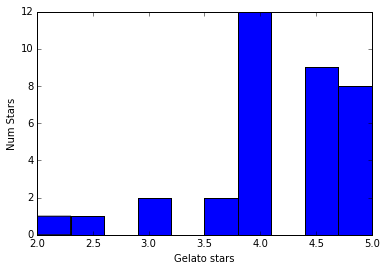

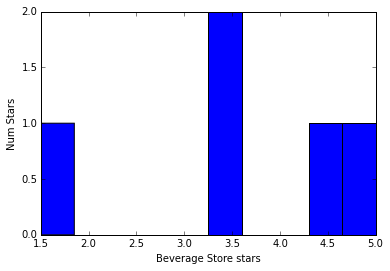

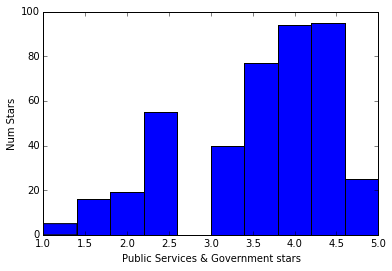

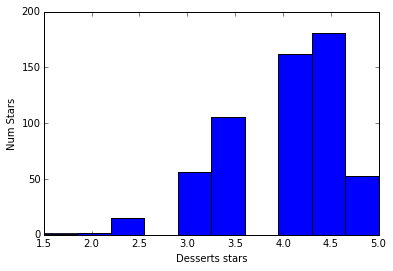

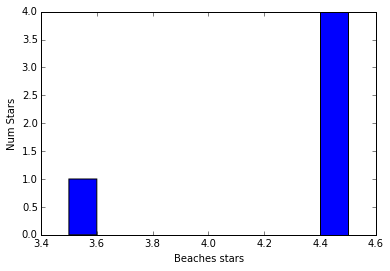

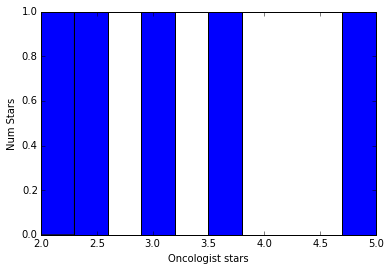

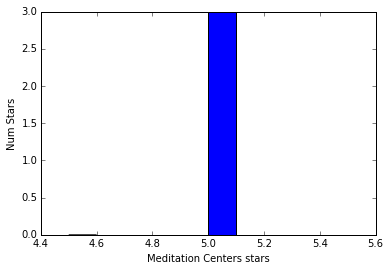

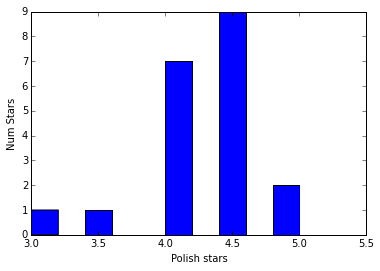

Category Mosques only has 1 data point. That point is: 3.5


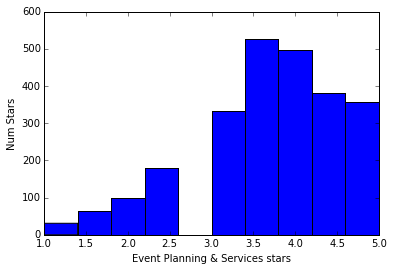

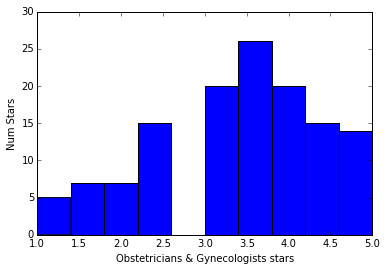

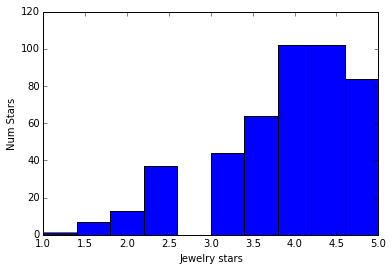

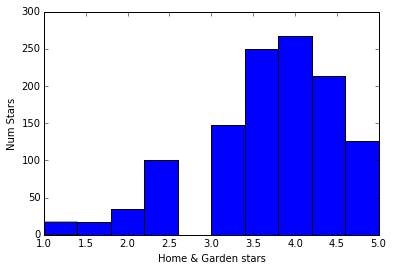

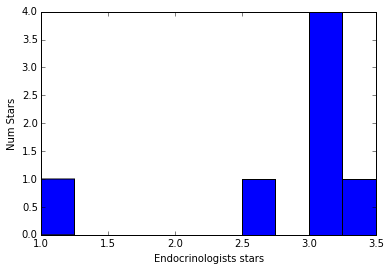

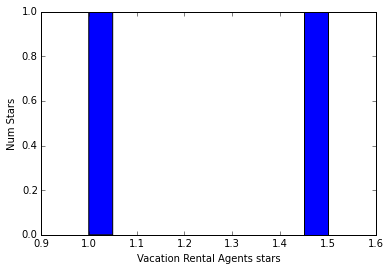

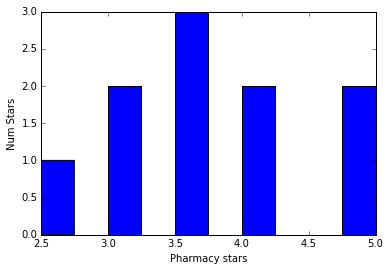

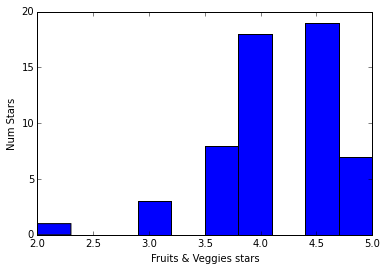

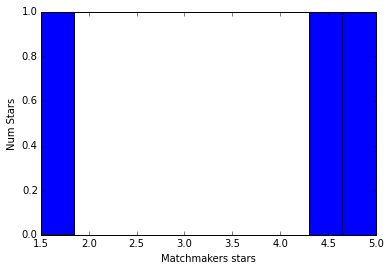

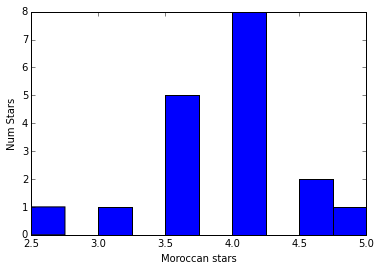

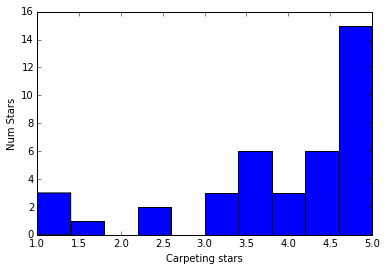

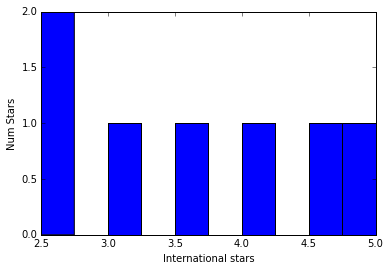

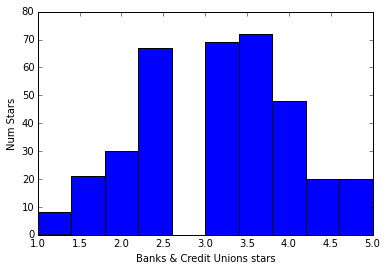

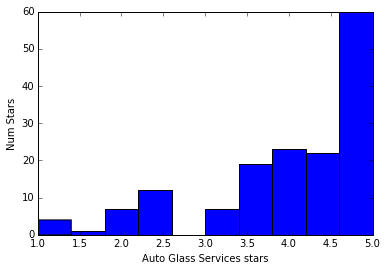

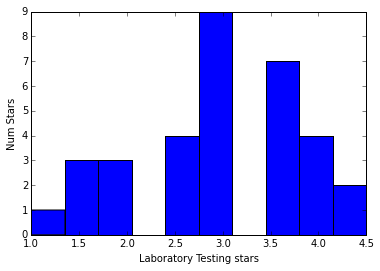

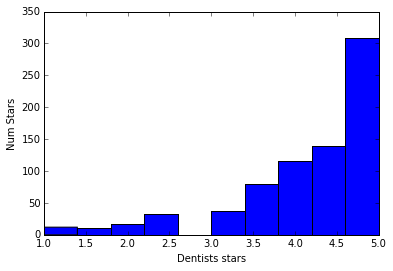

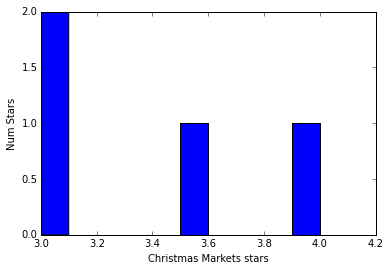

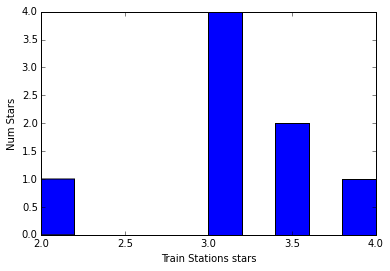

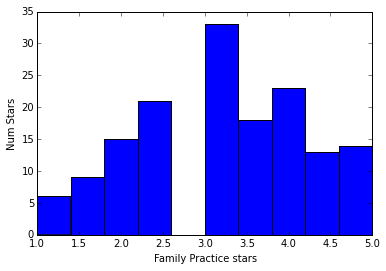

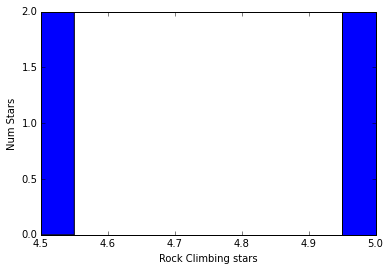

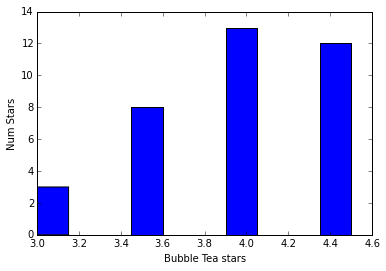

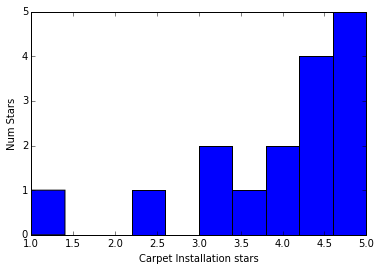

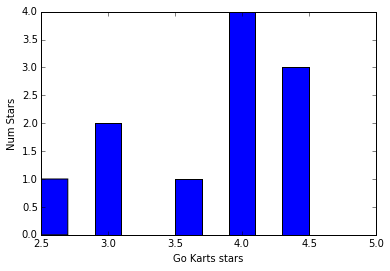

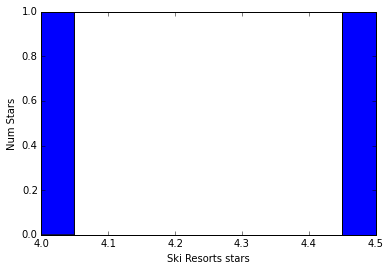

Category Eastern European only has 1 data point. That point is: 4.5


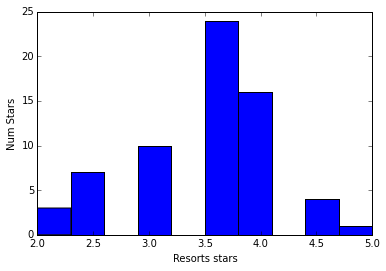

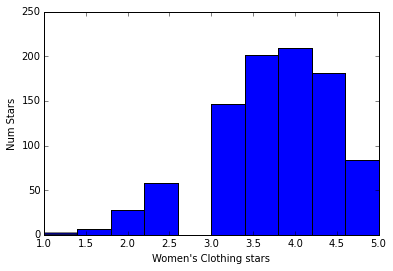

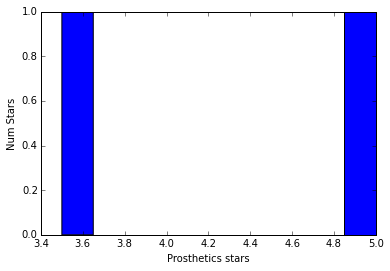

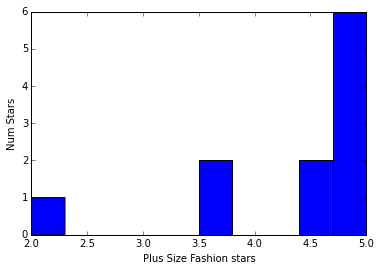

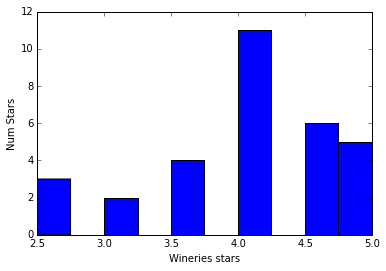

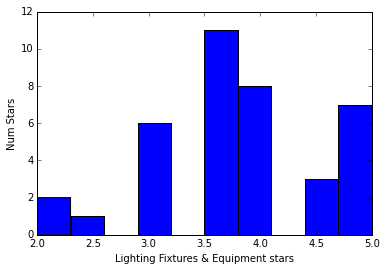

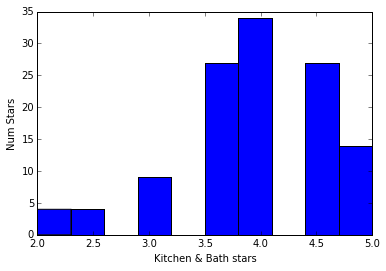

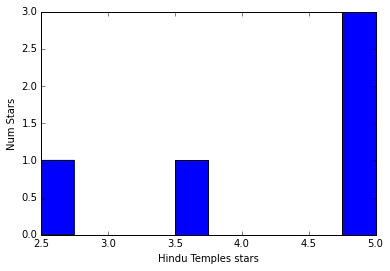

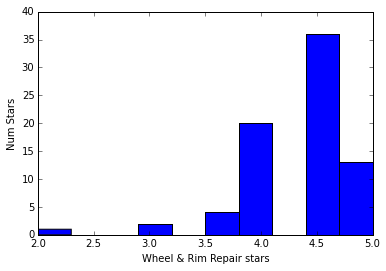

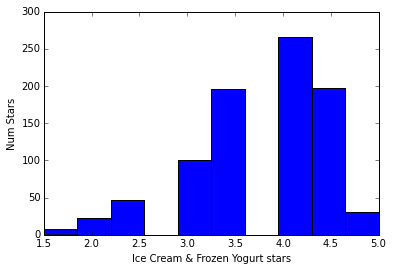

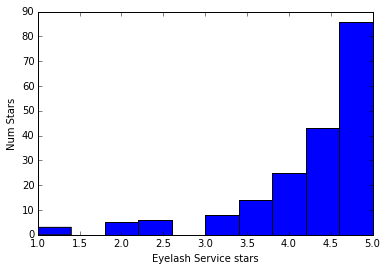

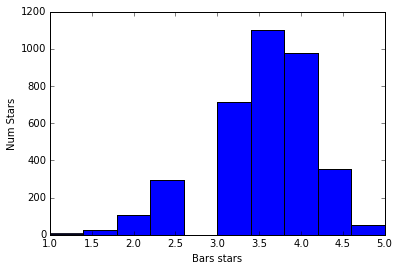

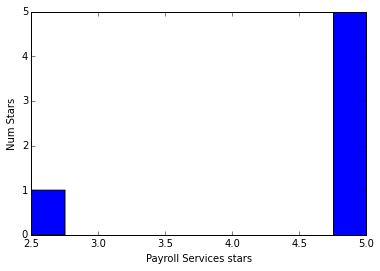

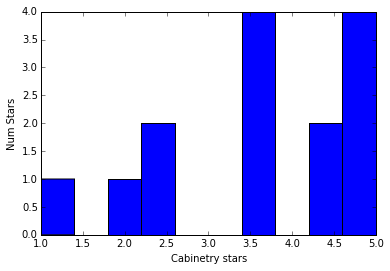

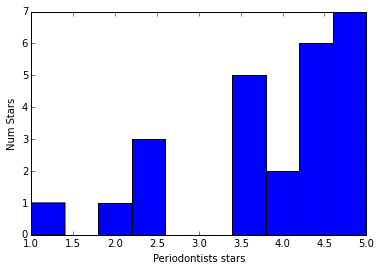

Category Pop-up Shops only has 1 data point. That point is: 4.5


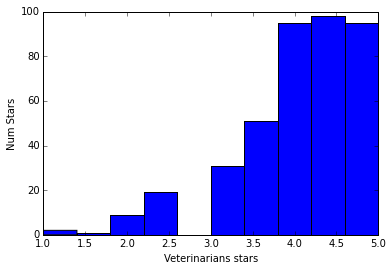

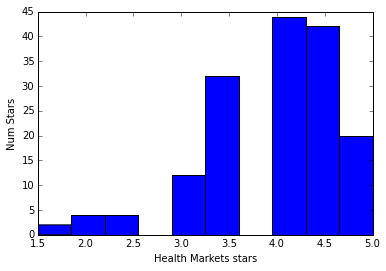

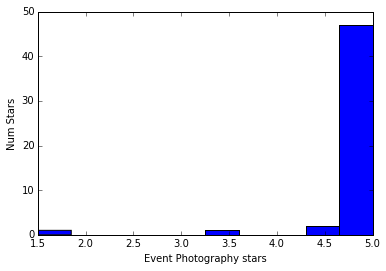

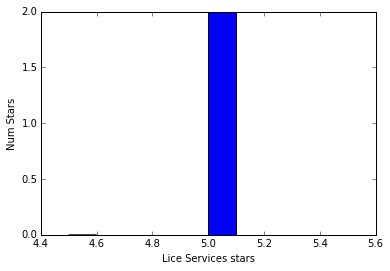

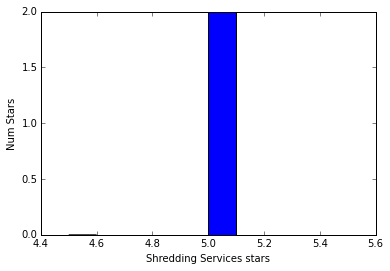

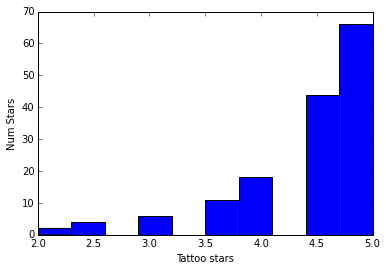

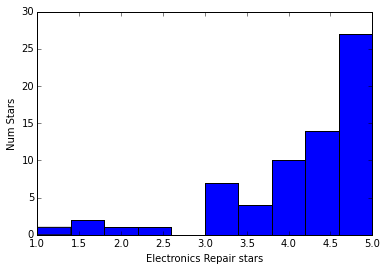

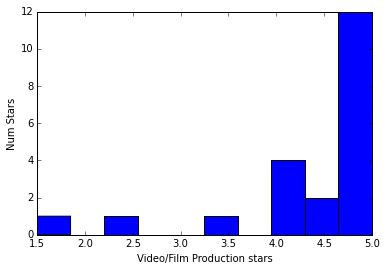

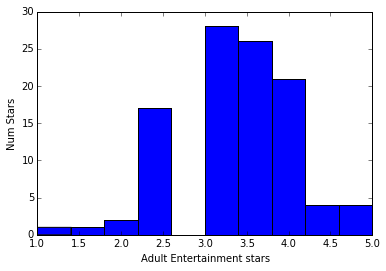

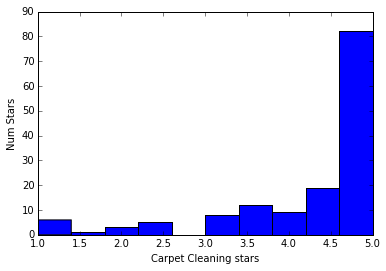

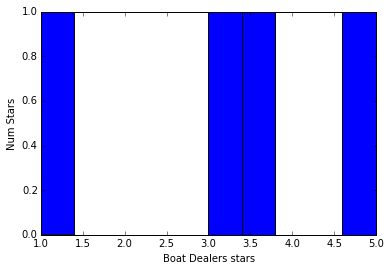

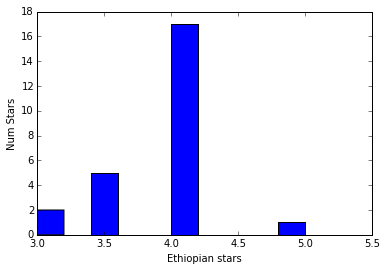

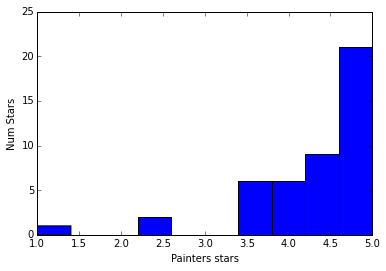

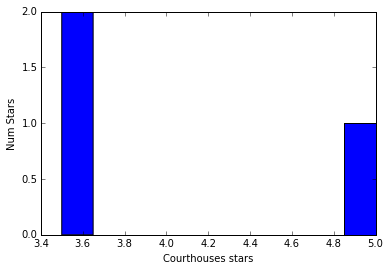

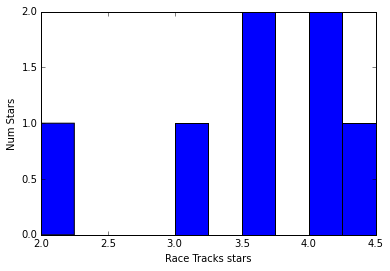

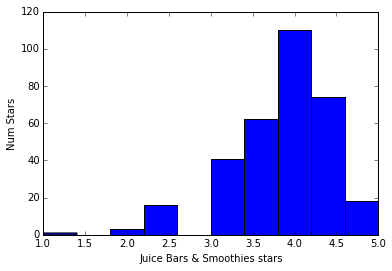

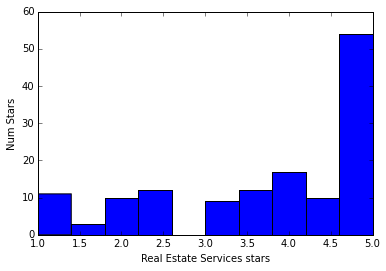

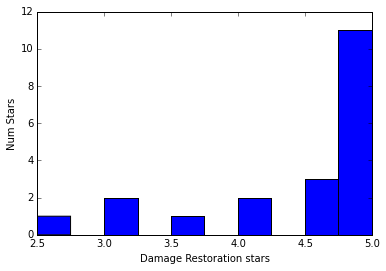

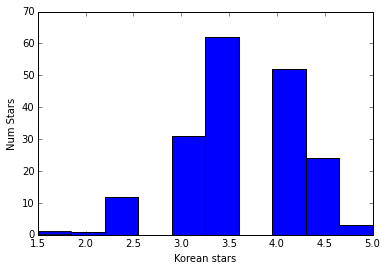

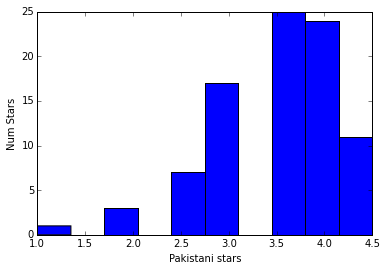

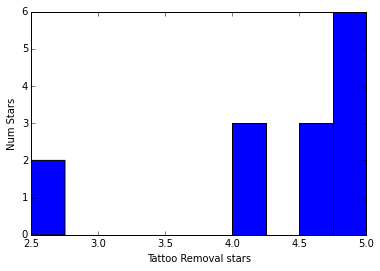

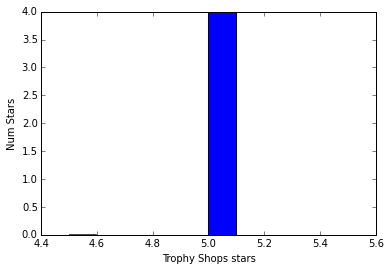

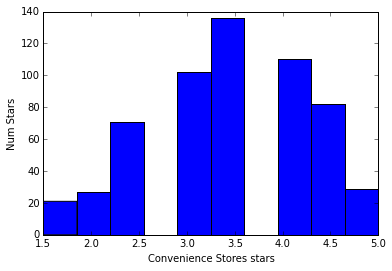

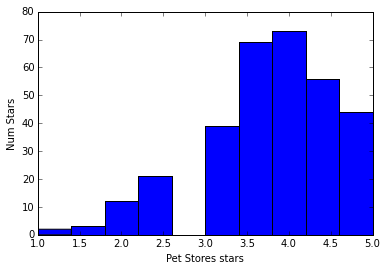

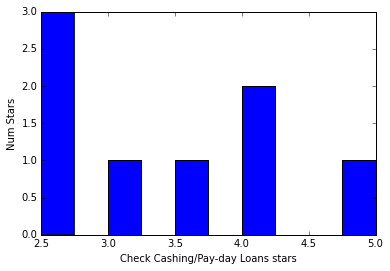

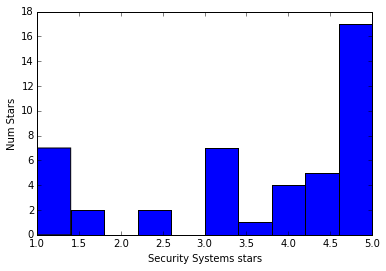

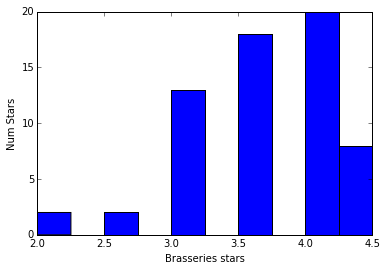

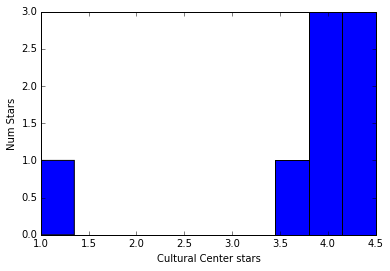

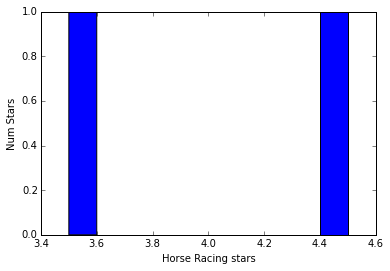

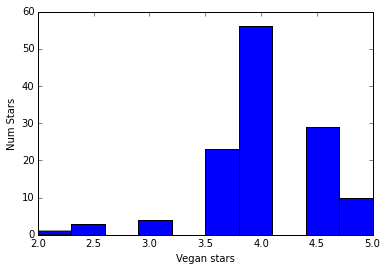

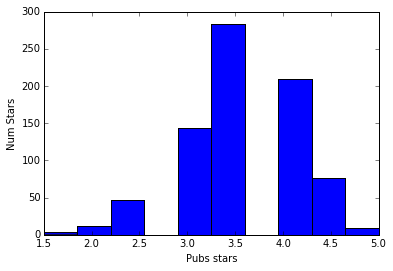

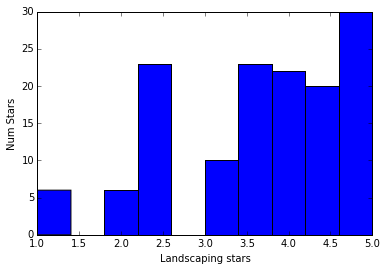

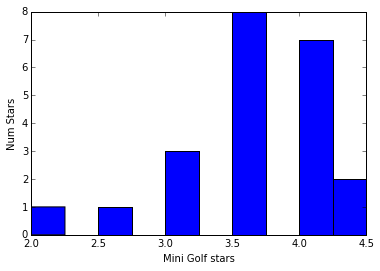

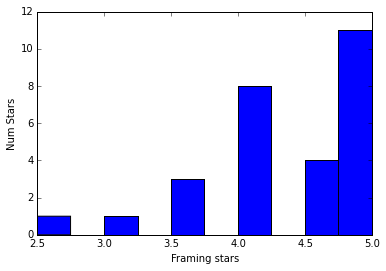

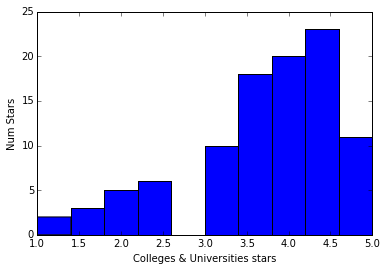

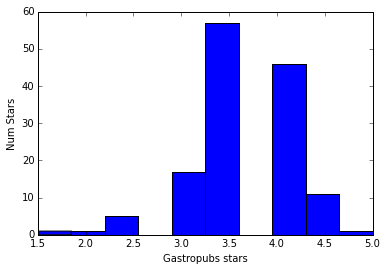

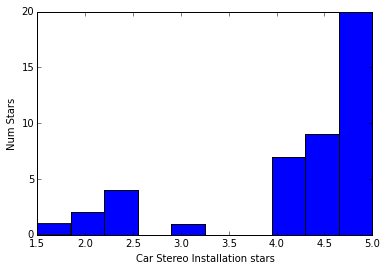

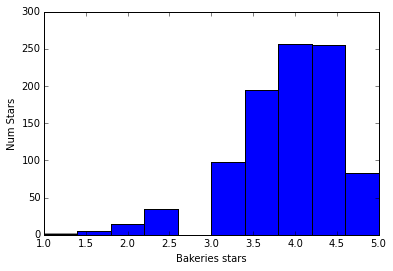

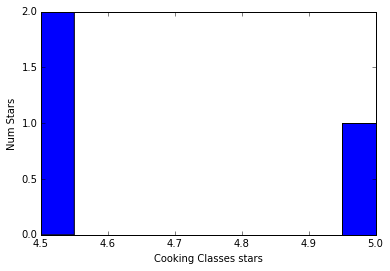

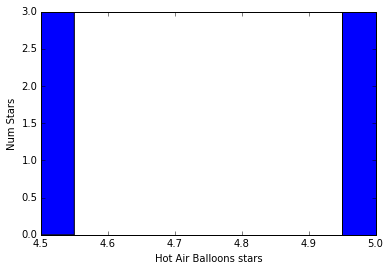

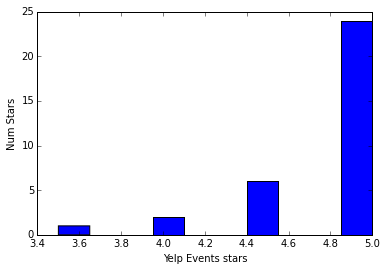

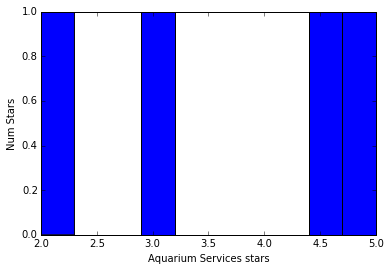

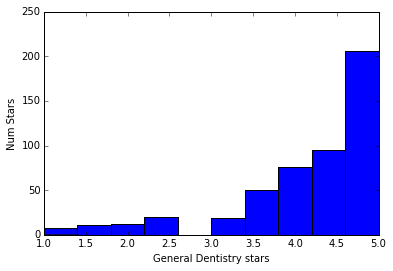

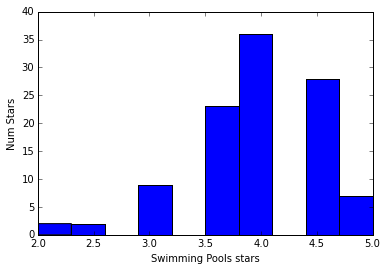

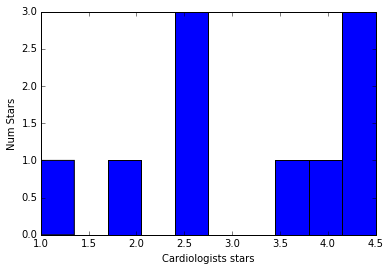

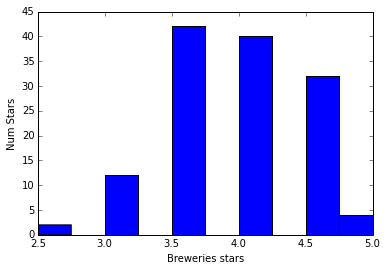

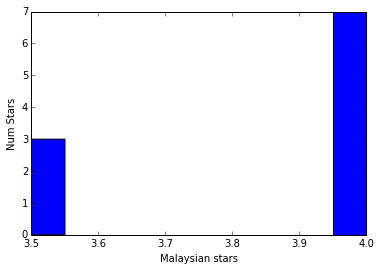

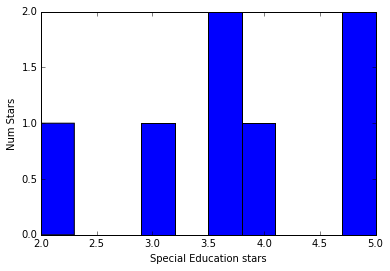

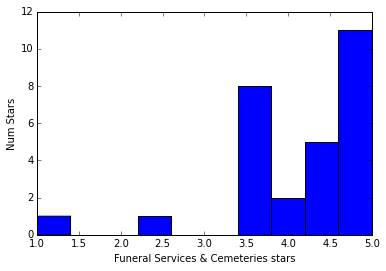

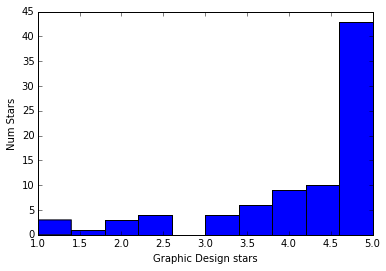

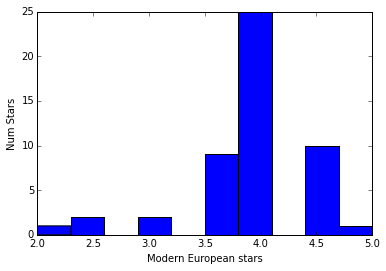

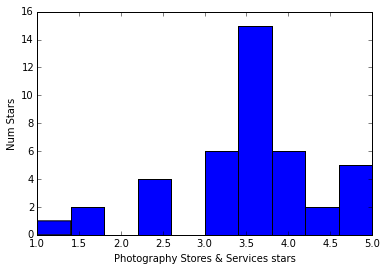

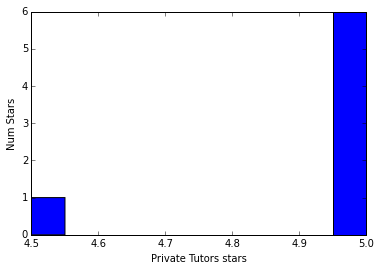

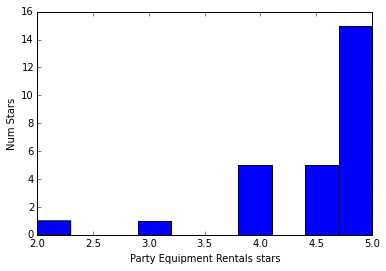

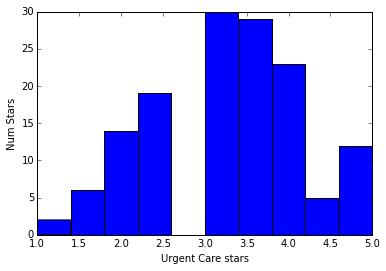

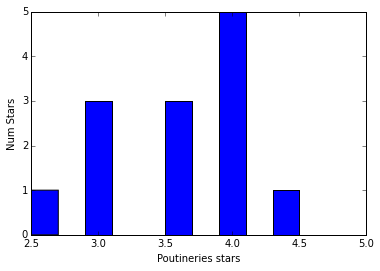

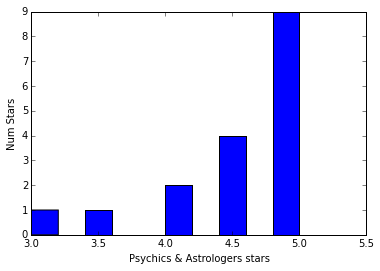

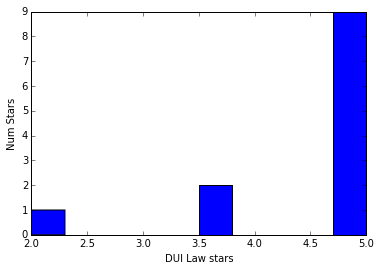

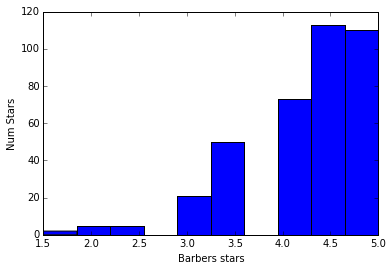

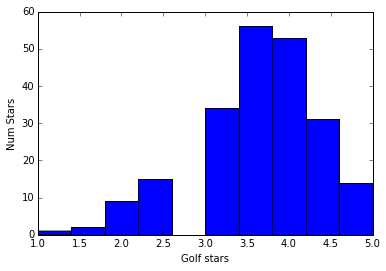

Category Czech only has 1 data point. That point is: 4.5


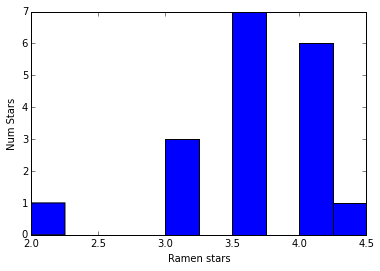

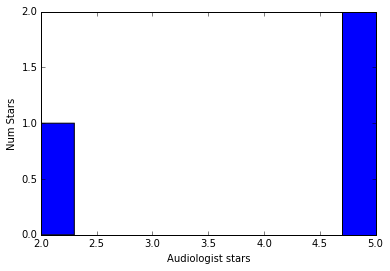

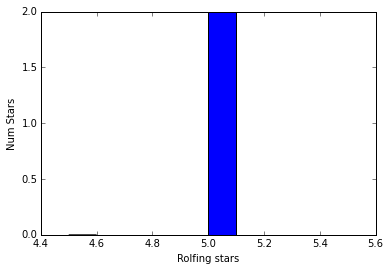

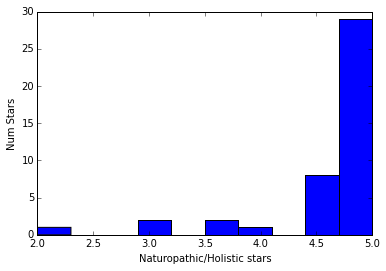

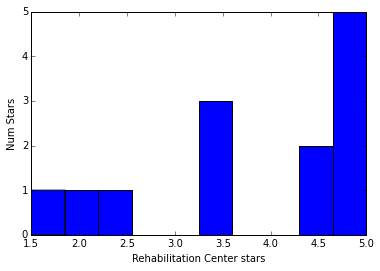

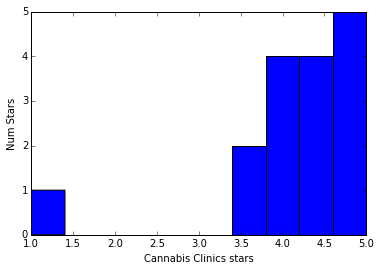

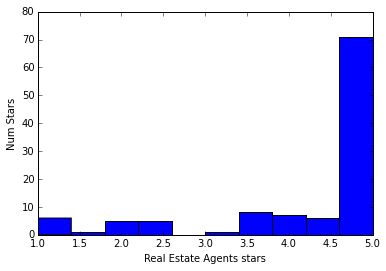

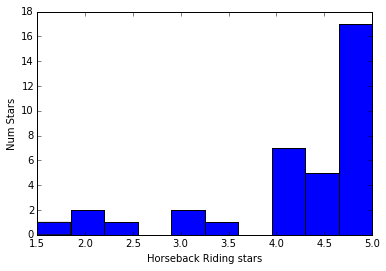

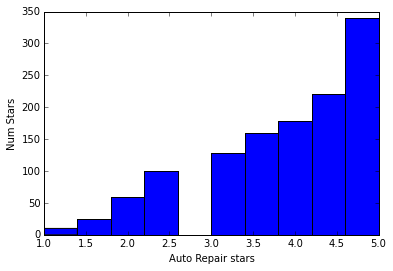

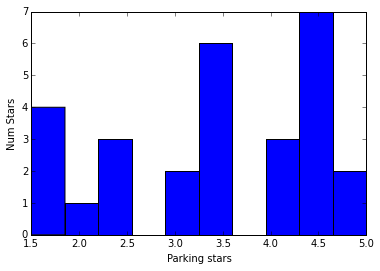

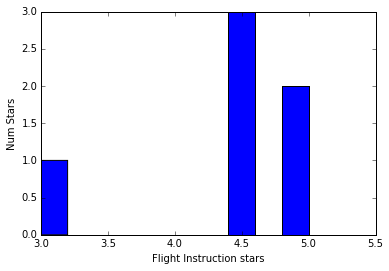

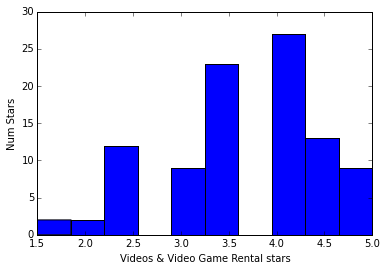

Category Hang Gliding only has 1 data point. That point is: 5.0


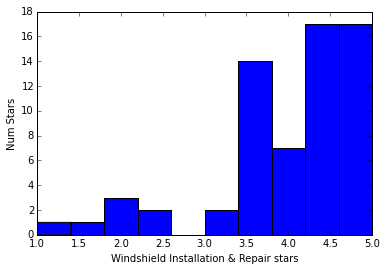

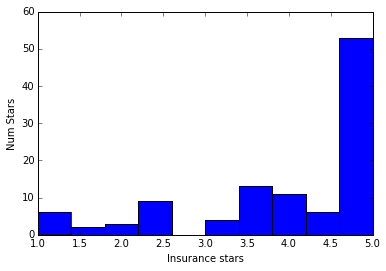

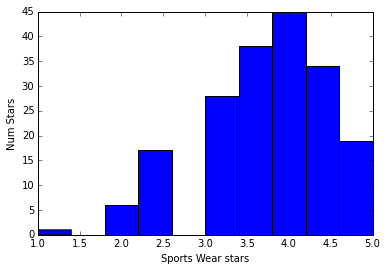

Category Psychologists only has 1 data point. That point is: 5.0


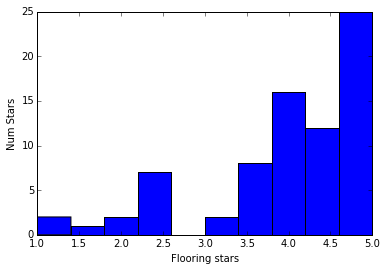

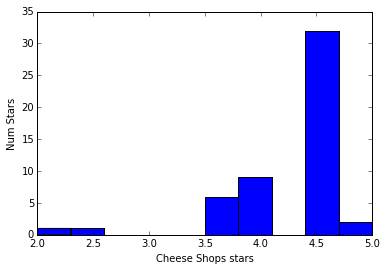

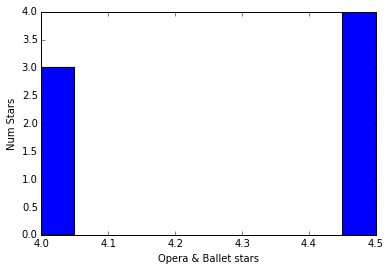

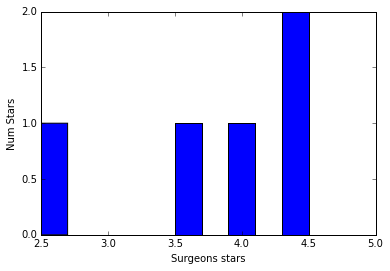

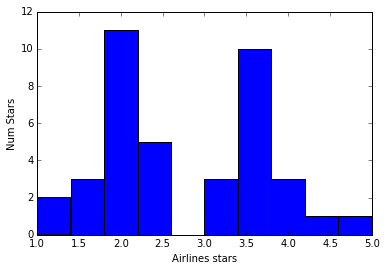

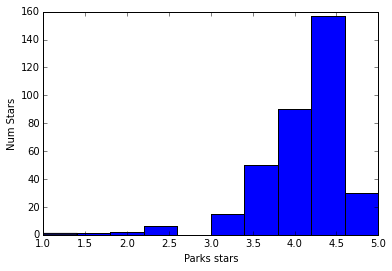

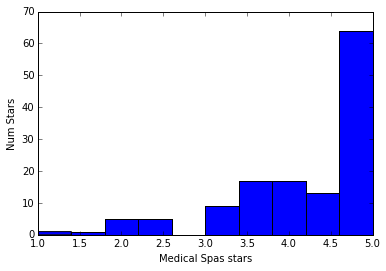

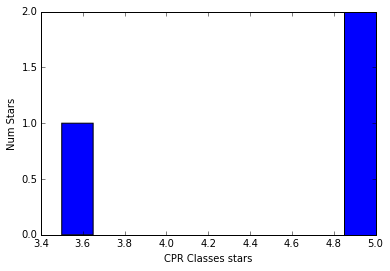

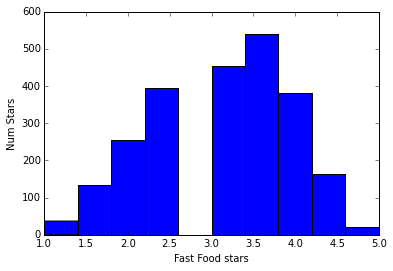

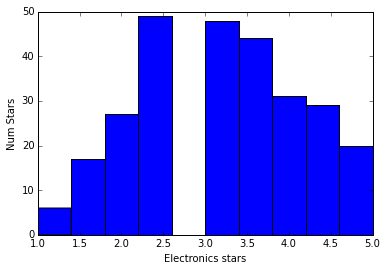

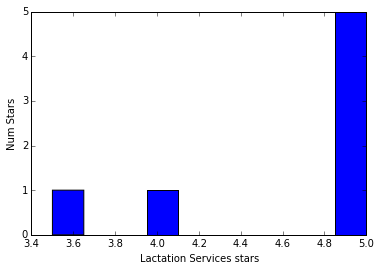

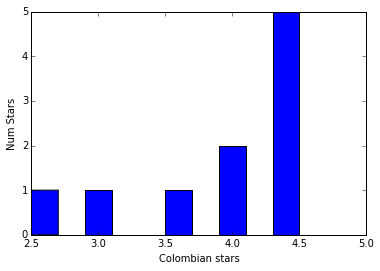

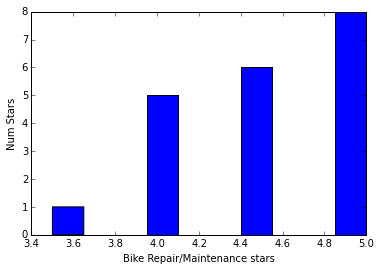

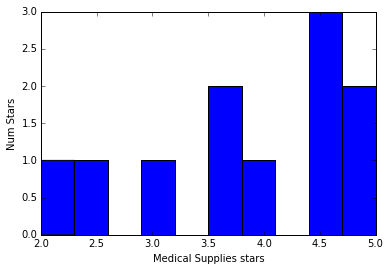

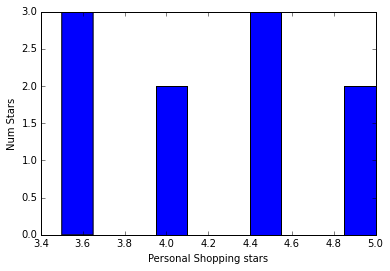

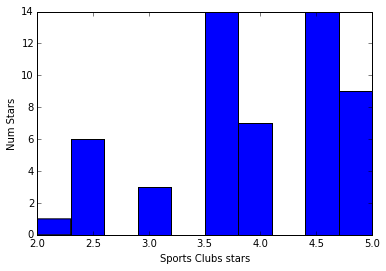

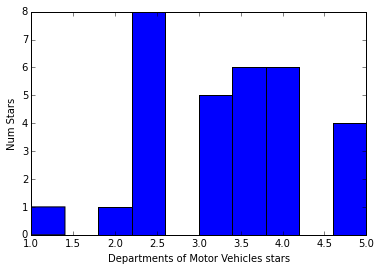

Category Street Art only has 1 data point. That point is: 4.5


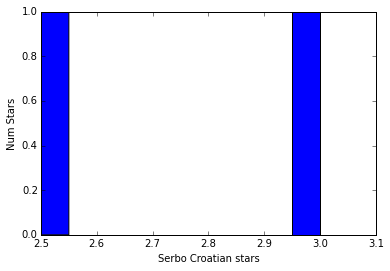

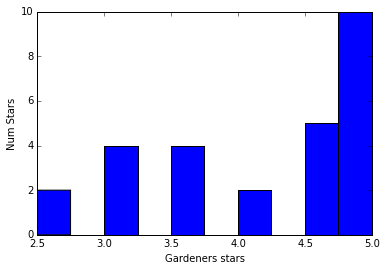

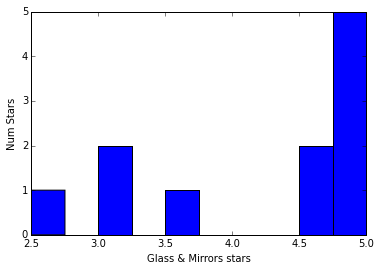

Category Home Staging only has 1 data point. That point is: 4.0


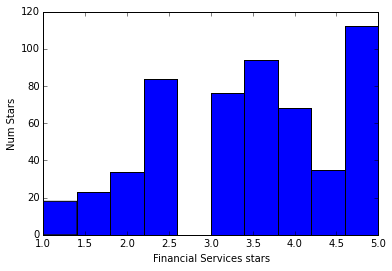

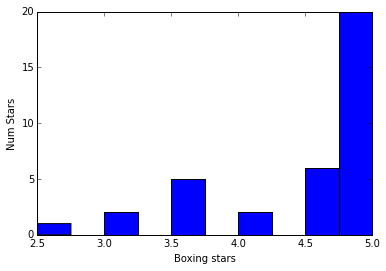

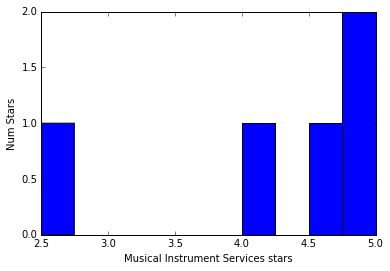

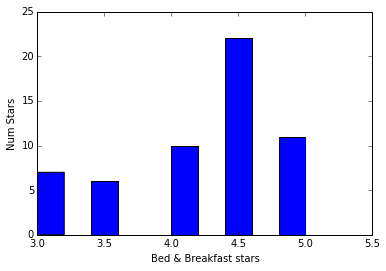

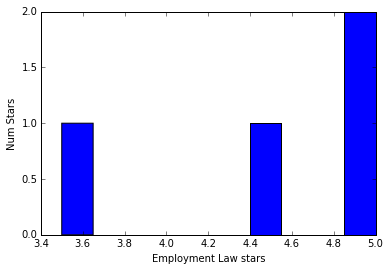

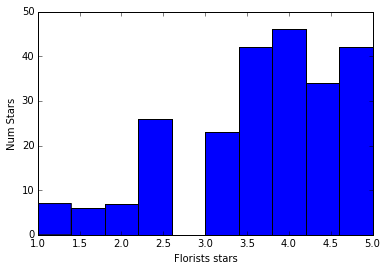

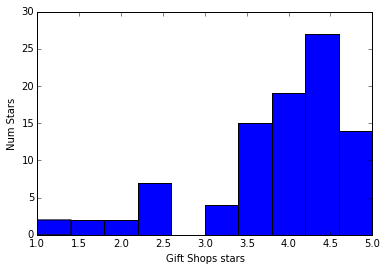

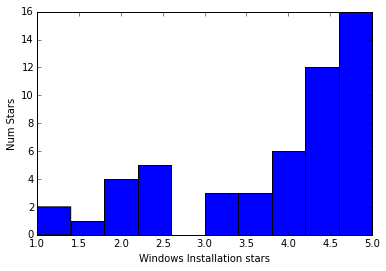

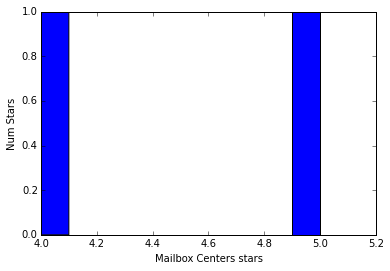

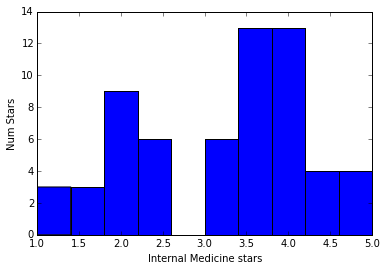

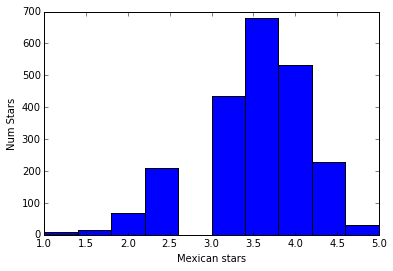

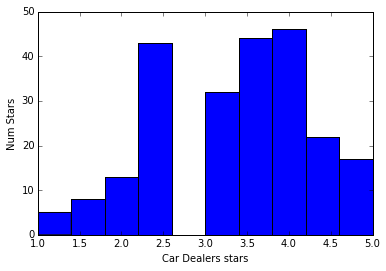

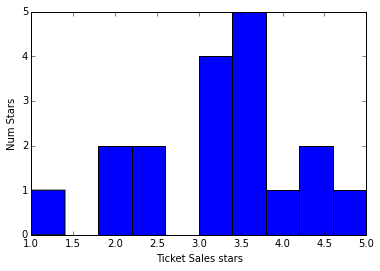

Category Medical Transportation only has 1 data point. That point is: 2.0


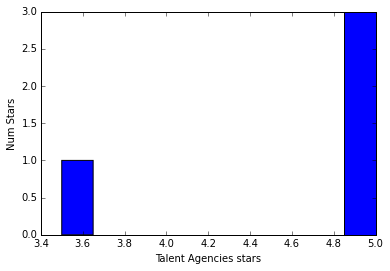

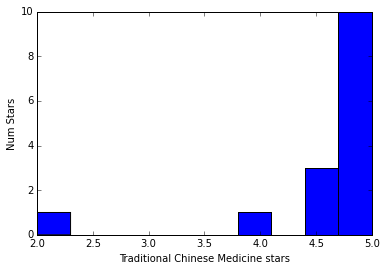

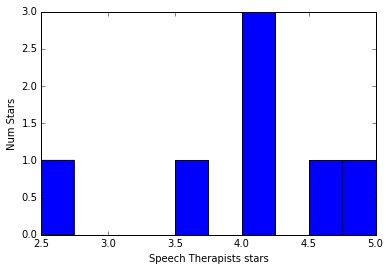

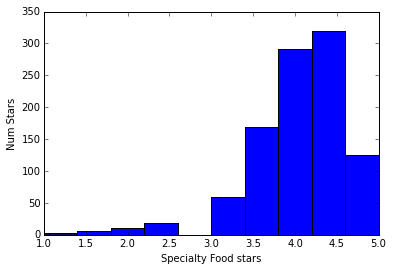

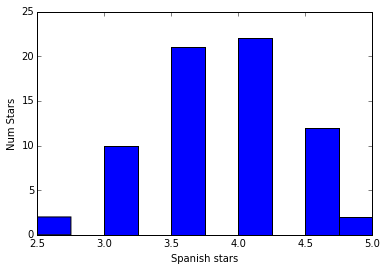

Category Cabaret only has 1 data point. That point is: 4.5


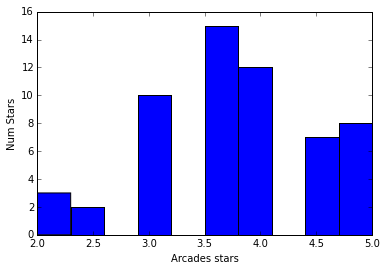

In [35]:
import matplotlib.pyplot as plt
for category in category_dist.keys():
    distribution = category_dist[category]
    if len(distribution) > 1:
        plt.hist(distribution)
        plt.xlabel('{0} stars'.format(category))
        plt.ylabel('Num Stars')
        plt.show()
    else:
        print("Category {0} only has 1 data point. That point is: {1}".format(category,distribution[0]))